In [3]:
import pypsa
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import warnings

from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:
n = pypsa.Network("networks/elec_s_80_ec_lcopt_Co2L-24H_2011_15.nc")

INFO:pypsa.io:Imported network elec_s_80_ec_lcopt_Co2L-24H_2011_15.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


# Basic Information

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x19326689810>,
 <matplotlib.collections.LineCollection at 0x193251dcc50>)

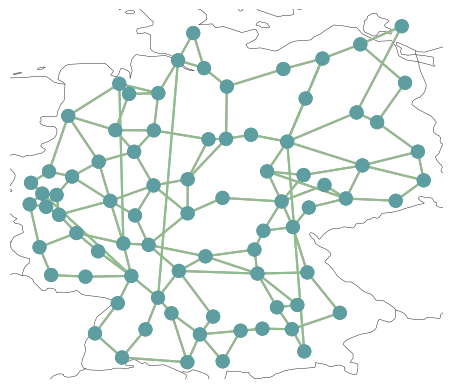

In [47]:
n.plot()

In [76]:
n.buses['x']['DE0 0']

11.965484499999999

In [29]:
n.buses['y']['DE0 0']

51.467240000000004

In [11]:
n.statistics()

Optimal Capacity  Installed Capacity  \
Generator   Combined-Cycle Gas      0.000000e+00            0.000000   
            Offshore Wind (AC)      2.321095e+03         2321.095188   
            Offshore Wind (DC)      5.465905e+03         5465.904812   
            Onshore Wind            5.441367e+04        54413.669761   
            Open-Cycle Gas          2.288854e+04        22888.536500   
            Solar                   5.366900e+04        53669.000000   
            biomass                 8.011736e+03         8011.736326   
            coal                    8.158220e+03         8158.220129   
            geothermal              0.000000e+00            0.000000   
            lignite                 2.099917e+04        20999.170197   
            nuclear                 4.066000e+03         4066.000000   
            oil                     8.563000e+02          856.300000   
Line        AC                      5.867786e+05       585398.531942   
Link        DC                      2.004085e-08            0.000000   
            H2 electrolysis         1.714171e-07            0.000000   
            H2 fuel cell            9.910162e-08            0.000000   
            H2 pipeline             1.039851e-05            0.000000   
Load        -                       0.000000e+00            0.000000   
StorageUnit Battery Storage         4.130384e-07            0.000000   
Store       Hydrogen Storage        9.361310e-05            0.000000   

                                Capacity Factor      Dispatch  Transmission  \
Generator   Combined-Cycle Gas              NaN  0.000000e+00  0.000000e+00   
            Offshore Wind (AC)     4.797788e-01  9.755244e+06  0.000000e+00   
            Offshore Wind (DC)     5.859729e-01  2.805716e+07  0.000000e+00   
            Onshore Wind           2.405445e-01  1.146588e+08  0.000000e+00   
            Open-Cycle Gas         1.131398e-01  2.268493e+07  0.000000e+00   
            Solar                  1.168105e-01  5.491733e+07  0.000000e+00   
            biomass                6.931416e-01  4.864663e+07  0.000000e+00   
            coal                   4.771560e-01  3.410044e+07  0.000000e+00   
            geothermal                      NaN  0.000000e+00  0.000000e+00   
            lignite                9.291642e-01  1.709223e+08  0.000000e+00   
            nuclear                7.135704e-01  2.541607e+07  0.000000e+00   
            oil                    9.206992e-13  6.906338e-06  0.000000e+00   
Line        AC                     2.290976e-01 -7.950596e-03 -4.373574e+07   
Link        DC                     3.709810e-01  0.000000e+00  6.839982e-06   
            H2 electrolysis        3.349090e-01 -1.902486e-04  0.000000e+00   
            H2 fuel cell           3.610091e-01 -1.567015e-04  0.000000e+00   
            H2 pipeline            1.138507e-02  0.000000e+00 -4.412383e-04   
Load        -                               NaN -5.091589e+08  0.000000e+00   
StorageUnit Battery Storage        5.721206e-02 -6.806377e-05  0.000000e+00   
Store       Hydrogen Storage       4.999407e-01  0.000000e+00  0.000000e+00   

                                  Withdrawal        Supply    Curtailment  \
Generator   Combined-Cycle Gas  0.000000e+00  0.000000e+00       0.000000   
            Offshore Wind (AC)  0.000000e+00  9.755244e+06    7022.590946   
            Offshore Wind (DC)  0.000000e+00  2.805716e+07       0.005812   
            Onshore Wind        0.000000e+00  1.146588e+08  639451.496400   
            Open-Cycle Gas      0.000000e+00  2.268493e+07       0.000000   
            Solar               0.000000e+00  5.491733e+07       0.017642   
            biomass             0.000000e+00  4.864663e+07       0.000000   
            coal                0.000000e+00  3.410044e+07       0.000000   
            geothermal          0.000000e+00  0.000000e+00       0.000000   
            lignite             0.000000e+00  1.709223e+08       0.000000   
            

In [82]:
n.generators_t.p_max_pu

Generator,DE0 0 onwind,DE0 0 solar,DE0 1 onwind,DE0 1 solar,DE0 10 onwind,DE0 10 solar,DE0 11 onwind,DE0 11 solar,DE0 12 onwind,DE0 12 solar,...,DE0 78 onwind,DE0 78 solar,DE0 79 onwind,DE0 79 solar,DE0 8 offwind-ac,DE0 8 offwind-dc,DE0 8 onwind,DE0 8 solar,DE0 9 onwind,DE0 9 solar
snapshot,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.604705,0.017514,0.533223,0.000000,0.464262,0.000000,0.413224,0.026714,0.641138,0.000000,...,0.659866,0.012564,0.472972,0.021949,0.756313,0.759587,0.558973,0.000000,0.627949,0.000000
2013-01-02,0.463679,0.041891,0.244311,0.024079,0.164894,0.032059,0.427304,0.045665,0.548294,0.045803,...,0.371021,0.045642,0.043747,0.077900,0.885447,0.883859,0.456957,0.066616,0.297339,0.048200
2013-01-03,0.779667,0.000000,0.525331,0.000000,0.430556,0.000000,0.808093,0.000000,0.771924,0.000000,...,0.604751,0.000000,0.259567,0.012022,0.875906,0.869817,0.634102,0.000000,0.572401,0.000000
2013-01-04,0.637585,0.000000,0.479619,0.000000,0.268284,0.000000,0.820629,0.000000,0.703246,0.000000,...,0.321875,0.000000,0.123779,0.000000,0.885450,0.884214,0.500937,0.000000,0.341081,0.000000
2013-01-05,0.312535,0.000000,0.312482,0.000000,0.223732,0.000000,0.468573,0.000000,0.390174,0.000000,...,0.129116,0.010520,0.101058,0.000000,0.621941,0.494049,0.223461,0.000000,0.156958,0.011363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,0.572884,0.080810,0.809197,0.029164,0.482384,0.075923,0.368447,0.052241,0.731741,0.059857,...,0.935202,0.025563,0.381728,0.115816,0.885495,0.852932,0.860954,0.000000,0.910921,0.023235
2013-12-28,0.567273,0.021217,0.426657,0.000000,0.528643,0.000000,0.443657,0.022297,0.408431,0.000000,...,0.338125,0.000000,0.422939,0.045027,0.884167,0.885500,0.295507,0.014614,0.361105,0.000000
2013-12-29,0.363435,0.062247,0.269727,0.018111,0.272678,0.043428,0.313425,0.040676,0.352562,0.034696,...,0.371399,0.048866,0.215075,0.067986,0.882074,0.878936,0.471175,0.041762,0.301444,0.031600


In [48]:
n.snapshots

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='snapshot', length=1826, freq=None)

# Helper Functions

In [5]:
def plot_feature_array(array):
    f = np.array(array).T
    for i, y in enumerate(f):
        plt.plot(np.arange(len(y)), y, label=f'feature {i+1}')
    plt.legend()
    plt.show()

In [6]:
def plot_coefficients(coef_dict: dict, width = 0.2):
    x = np.arange(len(coef_dict))
    fig, ax = plt.subplots()
    ax.set_xticks(x)
    ax.set_xticklabels(coef_dict.keys())
    for i, key in enumerate(coef_dict):
        coefs = coef_dict[key]
        ax.bar(x+(i-(len(coefs)-1)/2)/(1.5*len(coefs)), coefs, width)

In [7]:
def get_result_array(netw_splits, key):
    result_array = []
    for netw in netw_splits:
        result = np.mean(netw.statistics()[key])
        result_array.append(result)
    return stats.zscore(result_array)

# Network Split

In [8]:
def split_list(list, n):
    k, m = divmod(len(list), n)
    return [list[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n)]

In [9]:
snapshots = n.snapshots
snapshot_splits = split_list(list=snapshots, n=30)
netw_splits = []
for snapshot_split in snapshot_splits:
    netw_copy = n.copy()
    netw_copy.set_snapshots(snapshots=snapshot_split)
    netw_copy.optimize(snapshot_split, solver_name="gurobi")
    netw_splits.append(netw_copy)

INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.68it/s]
INFO:linopy.io: Writing time: 2.54s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hboddjw4.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-hboddjw4.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x75c5c87c


INFO:gurobipy:Model fingerprint: 0x75c5c87c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37270 columns


INFO:gurobipy:Presolve removed 134700 rows and 37270 columns


Presolve time: 0.66s


INFO:gurobipy:Presolve time: 0.66s


Presolved: 79301 rows, 63685 columns, 302445 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63685 columns, 302445 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.62s


INFO:gurobipy:Ordering time: 1.62s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23556725e+15 -4.63837175e+13  9.02e+10 8.36e+04  2.63e+12     3s


INFO:gurobipy:   0   2.23556725e+15 -4.63837175e+13  9.02e+10 8.36e+04  2.63e+12     3s


   1   3.11765608e+15 -1.64639467e+14  6.00e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.11765608e+15 -1.64639467e+14  6.00e+10 2.21e+04  1.07e+12     4s


   2   3.30710602e+15 -3.01106074e+14  1.97e+10 2.08e+03  2.94e+11     4s


INFO:gurobipy:   2   3.30710602e+15 -3.01106074e+14  1.97e+10 2.08e+03  2.94e+11     4s


   3   6.26716127e+14 -2.99253704e+14  5.42e+08 4.02e+01  1.36e+10     4s


INFO:gurobipy:   3   6.26716127e+14 -2.99253704e+14  5.42e+08 4.02e+01  1.36e+10     4s


   4   2.07750000e+14 -6.24917485e+13  1.25e+08 2.01e+01  3.31e+09     5s


INFO:gurobipy:   4   2.07750000e+14 -6.24917485e+13  1.25e+08 2.01e+01  3.31e+09     5s


   5   5.85846097e+13 -1.43326485e+13  6.50e+06 2.70e+01  6.48e+08     5s


INFO:gurobipy:   5   5.85846097e+13 -1.43326485e+13  6.50e+06 2.70e+01  6.48e+08     5s


   6   2.74279240e+12 -6.76385682e+12  1.58e+03 9.04e+00  7.26e+07     6s


INFO:gurobipy:   6   2.74279240e+12 -6.76385682e+12  1.58e+03 9.04e+00  7.26e+07     6s


   7   8.12837538e+11 -1.48058817e+12  4.09e+02 1.46e+00  1.73e+07     7s


INFO:gurobipy:   7   8.12837538e+11 -1.48058817e+12  4.09e+02 1.46e+00  1.73e+07     7s


   8   2.26074718e+11 -2.29802929e+11  1.75e+02 1.86e-01  3.39e+06     7s


INFO:gurobipy:   8   2.26074718e+11 -2.29802929e+11  1.75e+02 1.86e-01  3.39e+06     7s


   9   1.20740122e+11 -1.28608248e+11  8.02e+01 1.05e-01  1.85e+06     8s


INFO:gurobipy:   9   1.20740122e+11 -1.28608248e+11  8.02e+01 1.05e-01  1.85e+06     8s


  10   7.26129904e+10 -6.23136346e+10  4.38e+01 4.53e-02  9.97e+05     8s


INFO:gurobipy:  10   7.26129904e+10 -6.23136346e+10  4.38e+01 4.53e-02  9.97e+05     8s


  11   4.65334915e+10 -3.64414906e+10  2.81e+01 2.25e-02  6.13e+05     9s


INFO:gurobipy:  11   4.65334915e+10 -3.64414906e+10  2.81e+01 2.25e-02  6.13e+05     9s


  12   3.30066633e+10 -1.94558547e+10  2.03e+01 1.03e-02  3.87e+05     9s


INFO:gurobipy:  12   3.30066633e+10 -1.94558547e+10  2.03e+01 1.03e-02  3.87e+05     9s


  13   2.10516720e+10 -1.14496941e+10  1.27e+01 5.48e-03  2.40e+05    10s


INFO:gurobipy:  13   2.10516720e+10 -1.14496941e+10  1.27e+01 5.48e-03  2.40e+05    10s


  14   1.38568409e+10 -4.41953583e+09  7.77e+00 2.88e-03  1.35e+05    11s


INFO:gurobipy:  14   1.38568409e+10 -4.41953583e+09  7.77e+00 2.88e-03  1.35e+05    11s


  15   9.16871935e+09 -1.92675247e+09  4.95e+00 1.92e-03  8.18e+04    11s


INFO:gurobipy:  15   9.16871935e+09 -1.92675247e+09  4.95e+00 1.92e-03  8.18e+04    11s


  16   4.40457707e+09 -5.46103678e+08  2.04e+00 1.31e-03  3.65e+04    12s


INFO:gurobipy:  16   4.40457707e+09 -5.46103678e+08  2.04e+00 1.31e-03  3.65e+04    12s


  17   2.83733976e+09  5.56660743e+08  9.81e-01 6.08e-04  1.68e+04    13s


INFO:gurobipy:  17   2.83733976e+09  5.56660743e+08  9.81e-01 6.08e-04  1.68e+04    13s


  18   2.26407686e+09  9.78306625e+08  6.37e-01 2.72e-04  9.48e+03    13s


INFO:gurobipy:  18   2.26407686e+09  9.78306625e+08  6.37e-01 2.72e-04  9.48e+03    13s


  19   1.74065478e+09  1.10776831e+09  3.14e-01 1.54e-04  4.66e+03    14s


INFO:gurobipy:  19   1.74065478e+09  1.10776831e+09  3.14e-01 1.54e-04  4.66e+03    14s


  20   1.37510787e+09  1.15775948e+09  9.64e-02 9.01e-05  1.60e+03    15s


INFO:gurobipy:  20   1.37510787e+09  1.15775948e+09  9.64e-02 9.01e-05  1.60e+03    15s


  21   1.33248209e+09  1.18222311e+09  7.05e-02 5.20e-05  1.11e+03    15s


INFO:gurobipy:  21   1.33248209e+09  1.18222311e+09  7.05e-02 5.20e-05  1.11e+03    15s


  22   1.28871820e+09  1.19051646e+09  4.42e-02 3.85e-05  7.24e+02    16s


INFO:gurobipy:  22   1.28871820e+09  1.19051646e+09  4.42e-02 3.85e-05  7.24e+02    16s


  23   1.26119652e+09  1.19934267e+09  2.87e-02 2.29e-05  4.56e+02    17s


INFO:gurobipy:  23   1.26119652e+09  1.19934267e+09  2.87e-02 2.29e-05  4.56e+02    17s


  24   1.22635693e+09  1.20647297e+09  7.72e-03 9.33e-06  1.47e+02    17s


INFO:gurobipy:  24   1.22635693e+09  1.20647297e+09  7.72e-03 9.33e-06  1.47e+02    17s


  25   1.21763172e+09  1.20945946e+09  3.32e-03 2.59e-06  6.02e+01    18s


INFO:gurobipy:  25   1.21763172e+09  1.20945946e+09  3.32e-03 2.59e-06  6.02e+01    18s


  26   1.21117774e+09  1.21039516e+09  2.63e-04 3.89e-07  5.77e+00    19s


INFO:gurobipy:  26   1.21117774e+09  1.21039516e+09  2.63e-04 3.89e-07  5.77e+00    19s


  27   1.21062971e+09  1.21051768e+09  9.56e-05 5.21e-08  8.25e-01    20s


INFO:gurobipy:  27   1.21062971e+09  1.21051768e+09  9.56e-05 5.21e-08  8.25e-01    20s


  28   1.21054380e+09  1.21053171e+09  2.56e-05 1.42e-08  8.90e-02    21s


INFO:gurobipy:  28   1.21054380e+09  1.21053171e+09  2.56e-05 1.42e-08  8.90e-02    21s


  29   1.21054008e+09  1.21053641e+09  7.75e-06 3.58e-09  2.70e-02    22s


INFO:gurobipy:  29   1.21054008e+09  1.21053641e+09  7.75e-06 3.58e-09  2.70e-02    22s


  30   1.21053883e+09  1.21053737e+09  2.58e-06 1.50e-09  1.08e-02    23s


INFO:gurobipy:  30   1.21053883e+09  1.21053737e+09  2.58e-06 1.50e-09  1.08e-02    23s


  31   1.21053815e+09  1.21053797e+09  3.71e-07 2.35e-10  1.34e-03    24s


INFO:gurobipy:  31   1.21053815e+09  1.21053797e+09  3.71e-07 2.35e-10  1.34e-03    24s


  32   1.21053809e+09  1.21053808e+09  2.10e-07 3.55e-10  5.08e-05    25s


INFO:gurobipy:  32   1.21053809e+09  1.21053808e+09  2.10e-07 3.55e-10  5.08e-05    25s


  33   1.21053809e+09  1.21053809e+09  4.40e-09 2.46e-10  3.53e-07    25s


INFO:gurobipy:  33   1.21053809e+09  1.21053809e+09  4.40e-09 2.46e-10  3.53e-07    25s


  34   1.21053809e+09  1.21053809e+09  3.68e-10 2.40e-10  1.83e-09    26s


INFO:gurobipy:  34   1.21053809e+09  1.21053809e+09  3.68e-10 2.40e-10  1.83e-09    26s


INFO:gurobipy:


Barrier solved model in 34 iterations and 26.23 seconds (12.18 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 26.23 seconds (12.18 work units)


Optimal objective 1.21053809e+09


INFO:gurobipy:Optimal objective 1.21053809e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                26s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                26s


       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                27s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      81 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:      81 PPushes remaining with PInf 0.0000000e+00                27s


       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                27s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.3135262e-10     27s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.3135262e-10     27s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27685    1.2105381e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:   27685    1.2105381e+09   0.000000e+00   0.000000e+00     27s


INFO:gurobipy:


Solved in 27685 iterations and 27.33 seconds (12.70 work units)


INFO:gurobipy:Solved in 27685 iterations and 27.33 seconds (12.70 work units)


Optimal objective  1.210538086e+09


INFO:gurobipy:Optimal objective  1.210538086e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.21e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.21it/s]
INFO:linopy.io: Writing time: 2.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dz79kvil.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dz79kvil.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x9152e29e


INFO:gurobipy:Model fingerprint: 0x9152e29e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36888 columns


INFO:gurobipy:Presolve removed 134700 rows and 36888 columns


Presolve time: 0.82s


INFO:gurobipy:Presolve time: 0.82s


Presolved: 79301 rows, 64067 columns, 302827 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64067 columns, 302827 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.72s


INFO:gurobipy:Ordering time: 2.72s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22142653e+15 -4.58303703e+13  8.98e+10 8.36e+04  2.62e+12     5s


INFO:gurobipy:   0   2.22142653e+15 -4.58303703e+13  8.98e+10 8.36e+04  2.62e+12     5s


   1   3.09442135e+15 -1.63546016e+14  5.99e+10 2.21e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09442135e+15 -1.63546016e+14  5.99e+10 2.21e+04  1.07e+12     5s


   2   3.29195931e+15 -2.98511781e+14  1.95e+10 2.09e+03  2.93e+11     6s


INFO:gurobipy:   2   3.29195931e+15 -2.98511781e+14  1.95e+10 2.09e+03  2.93e+11     6s


   3   5.99507937e+14 -2.96672137e+14  5.36e+08 3.84e+01  1.33e+10     6s


INFO:gurobipy:   3   5.99507937e+14 -2.96672137e+14  5.36e+08 3.84e+01  1.33e+10     6s


   4   2.03424212e+14 -5.79120727e+13  1.27e+08 1.15e+01  3.32e+09     7s


INFO:gurobipy:   4   2.03424212e+14 -5.79120727e+13  1.27e+08 1.15e+01  3.32e+09     7s


   5   5.45356336e+13 -1.46475936e+13  3.93e+06 1.38e+02  6.10e+08     8s


INFO:gurobipy:   5   5.45356336e+13 -1.46475936e+13  3.93e+06 1.38e+02  6.10e+08     8s


   6   7.84496121e+12 -4.49227772e+13  2.56e+03 8.80e+01  3.98e+08     9s


INFO:gurobipy:   6   7.84496121e+12 -4.49227772e+13  2.56e+03 8.80e+01  3.98e+08     9s


   7   2.66172110e+12 -3.59961292e+12  3.98e+03 1.17e+00  4.63e+07     9s


INFO:gurobipy:   7   2.66172110e+12 -3.59961292e+12  3.98e+03 1.17e+00  4.63e+07     9s


   8   4.72159748e+11 -5.43391203e+11  5.46e+02 1.72e-01  7.46e+06    10s


INFO:gurobipy:   8   4.72159748e+11 -5.43391203e+11  5.46e+02 1.72e-01  7.46e+06    10s


   9   1.77984537e+11 -2.01813137e+11  1.58e+02 6.62e-02  2.78e+06    10s


INFO:gurobipy:   9   1.77984537e+11 -2.01813137e+11  1.58e+02 6.62e-02  2.78e+06    10s


  10   1.02279076e+11 -1.10559608e+11  8.73e+01 3.44e-02  1.56e+06    11s


INFO:gurobipy:  10   1.02279076e+11 -1.10559608e+11  8.73e+01 3.44e-02  1.56e+06    11s


  11   7.46093379e+10 -6.41202028e+10  6.34e+01 1.89e-02  1.02e+06    12s


INFO:gurobipy:  11   7.46093379e+10 -6.41202028e+10  6.34e+01 1.89e-02  1.02e+06    12s


  12   5.15059283e+10 -3.07807292e+10  4.34e+01 7.86e-03  6.03e+05    13s


INFO:gurobipy:  12   5.15059283e+10 -3.07807292e+10  4.34e+01 7.86e-03  6.03e+05    13s


  13   3.18634762e+10 -1.04146605e+10  2.71e+01 3.16e-03  3.10e+05    13s


INFO:gurobipy:  13   3.18634762e+10 -1.04146605e+10  2.71e+01 3.16e-03  3.10e+05    13s


  14   1.71804954e+10 -3.15694963e+09  1.38e+01 1.48e-03  1.49e+05    14s


INFO:gurobipy:  14   1.71804954e+10 -3.15694963e+09  1.38e+01 1.48e-03  1.49e+05    14s


  15   9.91444704e+09 -1.35089714e+09  7.62e+00 1.01e-03  8.25e+04    15s


INFO:gurobipy:  15   9.91444704e+09 -1.35089714e+09  7.62e+00 1.01e-03  8.25e+04    15s


  16   5.86747442e+09 -3.00278861e+08  4.25e+00 6.43e-04  4.52e+04    16s


INFO:gurobipy:  16   5.86747442e+09 -3.00278861e+08  4.25e+00 6.43e-04  4.52e+04    16s


  17   2.63265451e+09  5.27311405e+08  1.46e+00 2.52e-04  1.54e+04    17s


INFO:gurobipy:  17   2.63265451e+09  5.27311405e+08  1.46e+00 2.52e-04  1.54e+04    17s


  18   1.80693827e+09  7.32515329e+08  7.64e-01 1.27e-04  7.87e+03    18s


INFO:gurobipy:  18   1.80693827e+09  7.32515329e+08  7.64e-01 1.27e-04  7.87e+03    18s


  19   1.17427766e+09  7.91584348e+08  2.55e-01 8.07e-05  2.80e+03    19s


INFO:gurobipy:  19   1.17427766e+09  7.91584348e+08  2.55e-01 8.07e-05  2.80e+03    19s


  20   1.06059554e+09  8.29930095e+08  1.56e-01 4.39e-05  1.69e+03    20s


INFO:gurobipy:  20   1.06059554e+09  8.29930095e+08  1.56e-01 4.39e-05  1.69e+03    20s


  21   9.70435731e+08  8.47437156e+08  7.99e-02 2.62e-05  9.00e+02    21s


INFO:gurobipy:  21   9.70435731e+08  8.47437156e+08  7.99e-02 2.62e-05  9.00e+02    21s


  22   9.22219995e+08  8.59154550e+08  3.95e-02 1.34e-05  4.62e+02    22s


INFO:gurobipy:  22   9.22219995e+08  8.59154550e+08  3.95e-02 1.34e-05  4.62e+02    22s


  23   8.86792604e+08  8.67053783e+08  1.18e-02 5.10e-06  1.45e+02    23s


INFO:gurobipy:  23   8.86792604e+08  8.67053783e+08  1.18e-02 5.10e-06  1.45e+02    23s


  24   8.78210699e+08  8.70380134e+08  5.03e-03 1.22e-06  5.73e+01    23s


INFO:gurobipy:  24   8.78210699e+08  8.70380134e+08  5.03e-03 1.22e-06  5.73e+01    23s


  25   8.72574981e+08  8.71149017e+08  8.08e-04 2.72e-07  1.04e+01    25s


INFO:gurobipy:  25   8.72574981e+08  8.71149017e+08  8.08e-04 2.72e-07  1.04e+01    25s


  26   8.71490955e+08  8.71278994e+08  1.04e-04 4.87e-08  1.55e+00    26s


INFO:gurobipy:  26   8.71490955e+08  8.71278994e+08  1.04e-04 4.87e-08  1.55e+00    26s


  27   8.71375490e+08  8.71296927e+08  3.52e-05 2.32e-08  5.75e-01    26s


INFO:gurobipy:  27   8.71375490e+08  8.71296927e+08  3.52e-05 2.32e-08  5.75e-01    26s


  28   8.71333981e+08  8.71306402e+08  1.14e-05 7.93e-09  2.02e-01    27s


INFO:gurobipy:  28   8.71333981e+08  8.71306402e+08  1.14e-05 7.93e-09  2.02e-01    27s


  29   8.71318338e+08  8.71311106e+08  2.90e-06 1.66e-09  5.29e-02    28s


INFO:gurobipy:  29   8.71318338e+08  8.71311106e+08  2.90e-06 1.66e-09  5.29e-02    28s


  30   8.71313567e+08  8.71312415e+08  8.33e-07 2.57e-10  8.43e-03    30s


INFO:gurobipy:  30   8.71313567e+08  8.71312415e+08  8.33e-07 2.57e-10  8.43e-03    30s


  31   8.71312701e+08  8.71312528e+08  1.78e-07 2.44e-10  1.27e-03    31s


INFO:gurobipy:  31   8.71312701e+08  8.71312528e+08  1.78e-07 2.44e-10  1.27e-03    31s


  32   8.71312558e+08  8.71312545e+08  2.22e-07 3.70e-10  9.58e-05    33s


INFO:gurobipy:  32   8.71312558e+08  8.71312545e+08  2.22e-07 3.70e-10  9.58e-05    33s


  33   8.71312548e+08  8.71312548e+08  1.45e-08 2.93e-10  1.77e-06    34s


INFO:gurobipy:  33   8.71312548e+08  8.71312548e+08  1.45e-08 2.93e-10  1.77e-06    34s


  34   8.71312548e+08  8.71312548e+08  9.14e-10 8.11e-10  1.77e-09    36s


INFO:gurobipy:  34   8.71312548e+08  8.71312548e+08  9.14e-10 8.11e-10  1.77e-09    36s


INFO:gurobipy:


Barrier solved model in 34 iterations and 35.63 seconds (12.55 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 35.63 seconds (12.55 work units)


Optimal objective 8.71312548e+08


INFO:gurobipy:Optimal objective 8.71312548e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                36s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     107 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:     107 PPushes remaining with PInf 0.0000000e+00                36s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7923781e-10     37s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7923781e-10     37s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27167    8.7131255e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:   27167    8.7131255e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:


Solved in 27167 iterations and 36.78 seconds (12.89 work units)


INFO:gurobipy:Solved in 27167 iterations and 36.78 seconds (12.89 work units)


Optimal objective  8.713125482e+08


INFO:gurobipy:Optimal objective  8.713125482e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.71e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 34.82it/s]
INFO:linopy.io: Writing time: 2.86s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fluilntm.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fluilntm.lp


Reading time = 0.78 seconds


INFO:gurobipy:Reading time = 0.78 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x804fbe79


INFO:gurobipy:Model fingerprint: 0x804fbe79


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36914 columns


INFO:gurobipy:Presolve removed 134700 rows and 36914 columns


Presolve time: 0.90s


INFO:gurobipy:Presolve time: 0.90s


Presolved: 79301 rows, 64041 columns, 302801 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64041 columns, 302801 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.06s


INFO:gurobipy:Ordering time: 2.06s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22396741e+15 -4.53801950e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22396741e+15 -4.53801950e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.08939740e+15 -1.63486861e+14  6.03e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.08939740e+15 -1.63486861e+14  6.03e+10 2.22e+04  1.07e+12     5s


   2   3.29779581e+15 -2.98256281e+14  1.64e+10 2.11e+03  2.57e+11     5s


INFO:gurobipy:   2   3.29779581e+15 -2.98256281e+14  1.64e+10 2.11e+03  2.57e+11     5s


   3   6.27298839e+14 -2.92015833e+14  5.69e+08 3.97e+01  1.38e+10     6s


INFO:gurobipy:   3   6.27298839e+14 -2.92015833e+14  5.69e+08 3.97e+01  1.38e+10     6s


   4   2.01039801e+14 -5.49458400e+13  1.26e+08 1.48e+01  3.26e+09     7s


INFO:gurobipy:   4   2.01039801e+14 -5.49458400e+13  1.26e+08 1.48e+01  3.26e+09     7s


   5   5.45412648e+13 -1.48788503e+13  3.44e+06 2.63e+01  6.15e+08     7s


INFO:gurobipy:   5   5.45412648e+13 -1.48788503e+13  3.44e+06 2.63e+01  6.15e+08     7s


   6   9.52993245e+12 -4.06996079e+13  2.67e+03 1.13e+01  3.83e+08     8s


INFO:gurobipy:   6   9.52993245e+12 -4.06996079e+13  2.67e+03 1.13e+01  3.83e+08     8s


   7   2.84695619e+12 -4.22541693e+12  4.68e+03 1.73e+00  5.19e+07     9s


INFO:gurobipy:   7   2.84695619e+12 -4.22541693e+12  4.68e+03 1.73e+00  5.19e+07     9s


   8   6.34832723e+11 -5.43006987e+11  6.63e+02 1.20e-01  8.63e+06     9s


INFO:gurobipy:   8   6.34832723e+11 -5.43006987e+11  6.63e+02 1.20e-01  8.63e+06     9s


   9   1.80874008e+11 -1.81397848e+11  1.45e+02 3.69e-02  2.65e+06    10s


INFO:gurobipy:   9   1.80874008e+11 -1.81397848e+11  1.45e+02 3.69e-02  2.65e+06    10s


  10   1.08757712e+11 -1.38479831e+11  8.37e+01 2.76e-02  1.81e+06    11s


INFO:gurobipy:  10   1.08757712e+11 -1.38479831e+11  8.37e+01 2.76e-02  1.81e+06    11s


  11   8.51699853e+10 -7.74612063e+10  6.45e+01 1.55e-02  1.19e+06    11s


INFO:gurobipy:  11   8.51699853e+10 -7.74612063e+10  6.45e+01 1.55e-02  1.19e+06    11s


  12   5.90158936e+10 -4.58055498e+10  4.49e+01 7.97e-03  7.68e+05    12s


INFO:gurobipy:  12   5.90158936e+10 -4.58055498e+10  4.49e+01 7.97e-03  7.68e+05    12s


  13   4.57594257e+10 -3.59018950e+10  3.45e+01 6.11e-03  5.98e+05    13s


INFO:gurobipy:  13   4.57594257e+10 -3.59018950e+10  3.45e+01 6.11e-03  5.98e+05    13s


  14   2.91235172e+10 -1.05552207e+10  2.25e+01 1.67e-03  2.91e+05    14s


INFO:gurobipy:  14   2.91235172e+10 -1.05552207e+10  2.25e+01 1.67e-03  2.91e+05    14s


  15   1.67668856e+10 -3.38351317e+09  1.21e+01 8.42e-04  1.48e+05    15s


INFO:gurobipy:  15   1.67668856e+10 -3.38351317e+09  1.21e+01 8.42e-04  1.48e+05    15s


  16   9.20703014e+09 -1.16196863e+09  6.03e+00 4.77e-04  7.59e+04    16s


INFO:gurobipy:  16   9.20703014e+09 -1.16196863e+09  6.03e+00 4.77e-04  7.59e+04    16s


  17   3.23502045e+09  4.49993531e+08  1.48e+00 1.58e-04  2.04e+04    17s


INFO:gurobipy:  17   3.23502045e+09  4.49993531e+08  1.48e+00 1.58e-04  2.04e+04    17s


  18   1.75384173e+09  7.48496984e+08  5.12e-01 5.65e-05  7.36e+03    18s


INFO:gurobipy:  18   1.75384173e+09  7.48496984e+08  5.12e-01 5.65e-05  7.36e+03    18s


  19   1.24182487e+09  8.27577240e+08  2.13e-01 2.34e-05  3.03e+03    19s


INFO:gurobipy:  19   1.24182487e+09  8.27577240e+08  2.13e-01 2.34e-05  3.03e+03    19s


  20   1.06485897e+09  8.47456619e+08  1.10e-01 1.15e-05  1.59e+03    20s


INFO:gurobipy:  20   1.06485897e+09  8.47456619e+08  1.10e-01 1.15e-05  1.59e+03    20s


  21   9.46361948e+08  8.54013276e+08  4.38e-02 7.81e-06  6.76e+02    21s


INFO:gurobipy:  21   9.46361948e+08  8.54013276e+08  4.38e-02 7.81e-06  6.76e+02    21s


  22   9.18570309e+08  8.58618242e+08  2.83e-02 4.67e-06  4.39e+02    21s


INFO:gurobipy:  22   9.18570309e+08  8.58618242e+08  2.83e-02 4.67e-06  4.39e+02    21s


  23   8.80476577e+08  8.62683396e+08  6.75e-03 1.82e-06  1.30e+02    22s


INFO:gurobipy:  23   8.80476577e+08  8.62683396e+08  6.75e-03 1.82e-06  1.30e+02    22s


  24   8.69652955e+08  8.65145552e+08  1.85e-03 2.03e-07  3.30e+01    23s


INFO:gurobipy:  24   8.69652955e+08  8.65145552e+08  1.85e-03 2.03e-07  3.30e+01    23s


  25   8.65466472e+08  8.65244916e+08  6.38e-05 3.21e-08  1.62e+00    24s


INFO:gurobipy:  25   8.65466472e+08  8.65244916e+08  6.38e-05 3.21e-08  1.62e+00    24s


  26   8.65310475e+08  8.65296708e+08  9.52e-07 5.65e-09  1.01e-01    25s


INFO:gurobipy:  26   8.65310475e+08  8.65296708e+08  9.52e-07 5.65e-09  1.01e-01    25s


  27   8.65309612e+08  8.65307606e+08  7.92e-08 7.73e-10  1.47e-02    27s


INFO:gurobipy:  27   8.65309612e+08  8.65307606e+08  7.92e-08 7.73e-10  1.47e-02    27s


  28   8.65309458e+08  8.65309111e+08  5.70e-07 3.09e-10  2.55e-03    29s


INFO:gurobipy:  28   8.65309458e+08  8.65309111e+08  5.70e-07 3.09e-10  2.55e-03    29s


  29   8.65309432e+08  8.65309371e+08  8.21e-07 2.88e-10  4.51e-04    30s


INFO:gurobipy:  29   8.65309432e+08  8.65309371e+08  8.21e-07 2.88e-10  4.51e-04    30s


  30   8.65309420e+08  8.65309418e+08  8.85e-08 2.28e-10  1.40e-05    31s


INFO:gurobipy:  30   8.65309420e+08  8.65309418e+08  8.85e-08 2.28e-10  1.40e-05    31s


  31   8.65309420e+08  8.65309419e+08  1.39e-08 4.67e-10  5.48e-07    32s


INFO:gurobipy:  31   8.65309420e+08  8.65309419e+08  1.39e-08 4.67e-10  5.48e-07    32s


  32   8.65309419e+08  8.65309419e+08  2.77e-10 2.52e-10  2.02e-08    33s


INFO:gurobipy:  32   8.65309419e+08  8.65309419e+08  2.77e-10 2.52e-10  2.02e-08    33s


  33   8.65309419e+08  8.65309419e+08  2.18e-11 3.06e-10  2.02e-14    34s


INFO:gurobipy:  33   8.65309419e+08  8.65309419e+08  2.18e-11 3.06e-10  2.02e-14    34s


INFO:gurobipy:


Barrier solved model in 33 iterations and 33.56 seconds (12.72 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 33.56 seconds (12.72 work units)


Optimal objective 8.65309419e+08


INFO:gurobipy:Optimal objective 8.65309419e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1746956e-09     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1746956e-09     34s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26532    8.6530942e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:   26532    8.6530942e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:


Solved in 26532 iterations and 34.61 seconds (13.08 work units)


INFO:gurobipy:Solved in 26532 iterations and 34.61 seconds (13.08 work units)


Optimal objective  8.653094195e+08


INFO:gurobipy:Optimal objective  8.653094195e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.65e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.81it/s]
INFO:linopy.io: Writing time: 2.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pvekrp28.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-pvekrp28.lp


Reading time = 0.75 seconds


INFO:gurobipy:Reading time = 0.75 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x2361fdd1


INFO:gurobipy:Model fingerprint: 0x2361fdd1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36953 columns


INFO:gurobipy:Presolve removed 134700 rows and 36953 columns


Presolve time: 0.86s


INFO:gurobipy:Presolve time: 0.86s


Presolved: 79301 rows, 64002 columns, 302762 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64002 columns, 302762 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.12s


INFO:gurobipy:Ordering time: 2.12s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22380077e+15 -4.53263951e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22380077e+15 -4.53263951e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.08930128e+15 -1.63215951e+14  6.03e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.08930128e+15 -1.63215951e+14  6.03e+10 2.22e+04  1.07e+12     4s


   2   3.29780901e+15 -2.98288124e+14  1.67e+10 2.10e+03  2.60e+11     5s


INFO:gurobipy:   2   3.29780901e+15 -2.98288124e+14  1.67e+10 2.10e+03  2.60e+11     5s


   3   6.35987690e+14 -2.93393916e+14  7.13e+08 1.86e+04  1.56e+10     5s


INFO:gurobipy:   3   6.35987690e+14 -2.93393916e+14  7.13e+08 1.86e+04  1.56e+10     5s


   4   2.05867763e+14 -6.61682646e+13  1.64e+08 1.35e+01  3.70e+09     6s


INFO:gurobipy:   4   2.05867763e+14 -6.61682646e+13  1.64e+08 1.35e+01  3.70e+09     6s


   5   5.51220984e+13 -1.48684522e+13  1.01e+07 1.38e+01  6.59e+08     7s


INFO:gurobipy:   5   5.51220984e+13 -1.48684522e+13  1.01e+07 1.38e+01  6.59e+08     7s


   6   1.63273099e+13 -5.87873802e+13  7.67e+03 8.72e+00  5.82e+08     7s


INFO:gurobipy:   6   1.63273099e+13 -5.87873802e+13  7.67e+03 8.72e+00  5.82e+08     7s


   7   4.63278788e+12 -3.84980506e+12  6.91e+03 8.98e-01  6.25e+07     8s


INFO:gurobipy:   7   4.63278788e+12 -3.84980506e+12  6.91e+03 8.98e-01  6.25e+07     8s


   8   1.44357526e+12 -1.26049747e+12  1.75e+03 2.67e-01  1.99e+07     9s


INFO:gurobipy:   8   1.44357526e+12 -1.26049747e+12  1.75e+03 2.67e-01  1.99e+07     9s


   9   2.69123705e+11 -3.36027930e+11  2.19e+02 6.71e-02  4.44e+06     9s


INFO:gurobipy:   9   2.69123705e+11 -3.36027930e+11  2.19e+02 6.71e-02  4.44e+06     9s


  10   1.77443693e+11 -1.82251937e+11  1.42e+02 3.51e-02  2.64e+06    10s


INFO:gurobipy:  10   1.77443693e+11 -1.82251937e+11  1.42e+02 3.51e-02  2.64e+06    10s


  11   1.15780196e+11 -1.16291011e+11  9.12e+01 2.17e-02  1.70e+06    11s


INFO:gurobipy:  11   1.15780196e+11 -1.16291011e+11  9.12e+01 2.17e-02  1.70e+06    11s


  12   8.00293395e+10 -6.65169030e+10  6.21e+01 1.12e-02  1.07e+06    11s


INFO:gurobipy:  12   8.00293395e+10 -6.65169030e+10  6.21e+01 1.12e-02  1.07e+06    11s


  13   5.81732301e+10 -3.33530779e+10  4.44e+01 5.08e-03  6.71e+05    12s


INFO:gurobipy:  13   5.81732301e+10 -3.33530779e+10  4.44e+01 5.08e-03  6.71e+05    12s


  14   3.72554074e+10 -9.26461548e+09  2.78e+01 2.30e-03  3.41e+05    13s


INFO:gurobipy:  14   3.72554074e+10 -9.26461548e+09  2.78e+01 2.30e-03  3.41e+05    13s


  15   1.64291861e+10 -2.64345842e+09  1.11e+01 1.28e-03  1.40e+05    14s


INFO:gurobipy:  15   1.64291861e+10 -2.64345842e+09  1.11e+01 1.28e-03  1.40e+05    14s


  16   9.23339227e+09 -5.12169128e+08  5.86e+00 6.67e-04  7.14e+04    15s


INFO:gurobipy:  16   9.23339227e+09 -5.12169128e+08  5.86e+00 6.67e-04  7.14e+04    15s


  17   3.61988353e+09  2.94801571e+08  1.81e+00 3.33e-04  2.44e+04    16s


INFO:gurobipy:  17   3.61988353e+09  2.94801571e+08  1.81e+00 3.33e-04  2.44e+04    16s


  18   1.79689503e+09  6.85312297e+08  5.69e-01 1.17e-04  8.14e+03    17s


INFO:gurobipy:  18   1.79689503e+09  6.85312297e+08  5.69e-01 1.17e-04  8.14e+03    17s


  19   1.29693327e+09  7.45180850e+08  2.57e-01 6.83e-05  4.04e+03    18s


INFO:gurobipy:  19   1.29693327e+09  7.45180850e+08  2.57e-01 6.83e-05  4.04e+03    18s


  20   1.06577914e+09  7.91224177e+08  1.26e-01 3.38e-05  2.01e+03    19s


INFO:gurobipy:  20   1.06577914e+09  7.91224177e+08  1.26e-01 3.38e-05  2.01e+03    19s


  21   9.63847317e+08  8.10536965e+08  6.99e-02 1.77e-05  1.12e+03    20s


INFO:gurobipy:  21   9.63847317e+08  8.10536965e+08  6.99e-02 1.77e-05  1.12e+03    20s


  22   8.95648232e+08  8.20645430e+08  3.34e-02 8.34e-06  5.50e+02    20s


INFO:gurobipy:  22   8.95648232e+08  8.20645430e+08  3.34e-02 8.34e-06  5.50e+02    20s


  23   8.54811588e+08  8.27566999e+08  1.18e-02 1.87e-06  2.00e+02    21s


INFO:gurobipy:  23   8.54811588e+08  8.27566999e+08  1.18e-02 1.87e-06  2.00e+02    21s


  24   8.32590041e+08  8.28598051e+08  1.48e-03 5.64e-07  2.92e+01    22s


INFO:gurobipy:  24   8.32590041e+08  8.28598051e+08  1.48e-03 5.64e-07  2.92e+01    22s


  25   8.29267384e+08  8.28893377e+08  5.98e-05 8.50e-08  2.74e+00    23s


INFO:gurobipy:  25   8.29267384e+08  8.28893377e+08  5.98e-05 8.50e-08  2.74e+00    23s


  26   8.29036847e+08  8.28961042e+08  2.15e-05 1.53e-08  5.55e-01    24s


INFO:gurobipy:  26   8.29036847e+08  8.28961042e+08  2.15e-05 1.53e-08  5.55e-01    24s


  27   8.28981079e+08  8.28977460e+08  3.63e-07 2.22e-09  2.65e-02    25s


INFO:gurobipy:  27   8.28981079e+08  8.28977460e+08  3.63e-07 2.22e-09  2.65e-02    25s


  28   8.28980891e+08  8.28980070e+08  8.40e-07 4.64e-10  6.01e-03    27s


INFO:gurobipy:  28   8.28980891e+08  8.28980070e+08  8.40e-07 4.64e-10  6.01e-03    27s


  29   8.28980832e+08  8.28980699e+08  4.43e-07 2.87e-10  9.75e-04    28s


INFO:gurobipy:  29   8.28980832e+08  8.28980699e+08  4.43e-07 2.87e-10  9.75e-04    28s


  30   8.28980819e+08  8.28980814e+08  5.25e-08 2.97e-10  3.62e-05    29s


INFO:gurobipy:  30   8.28980819e+08  8.28980814e+08  5.25e-08 2.97e-10  3.62e-05    29s


  31   8.28980818e+08  8.28980818e+08  1.49e-08 3.42e-10  6.70e-07    31s


INFO:gurobipy:  31   8.28980818e+08  8.28980818e+08  1.49e-08 3.42e-10  6.70e-07    31s


  32   8.28980818e+08  8.28980818e+08  2.37e-10 2.44e-10  5.03e-09    32s


INFO:gurobipy:  32   8.28980818e+08  8.28980818e+08  2.37e-10 2.44e-10  5.03e-09    32s


INFO:gurobipy:


Barrier solved model in 32 iterations and 31.63 seconds (12.12 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 31.63 seconds (12.12 work units)


Optimal objective 8.28980818e+08


INFO:gurobipy:Optimal objective 8.28980818e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     247 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     247 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1044798e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1044798e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28171    8.2898082e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   28171    8.2898082e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 28171 iterations and 32.72 seconds (12.49 work units)


INFO:gurobipy:Solved in 28171 iterations and 32.72 seconds (12.49 work units)


Optimal objective  8.289808177e+08


INFO:gurobipy:Optimal objective  8.289808177e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.29e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 34.03it/s]
INFO:linopy.io: Writing time: 3.0s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2oj7qvk8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-2oj7qvk8.lp


Reading time = 0.92 seconds


INFO:gurobipy:Reading time = 0.92 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xdaf6c09f


INFO:gurobipy:Model fingerprint: 0xdaf6c09f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37039 columns


INFO:gurobipy:Presolve removed 134700 rows and 37039 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 79301 rows, 63916 columns, 302676 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63916 columns, 302676 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.09s


INFO:gurobipy:Ordering time: 2.09s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22907204e+15 -4.58475586e+13  9.00e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22907204e+15 -4.58475586e+13  9.00e+10 8.36e+04  2.62e+12     4s


   1   3.09965606e+15 -1.63813481e+14  6.02e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09965606e+15 -1.63813481e+14  6.02e+10 2.22e+04  1.07e+12     5s


   2   3.29203530e+15 -2.98973605e+14  2.13e+10 2.11e+03  3.14e+11     5s


INFO:gurobipy:   2   3.29203530e+15 -2.98973605e+14  2.13e+10 2.11e+03  3.14e+11     5s


   3   5.81163465e+14 -2.98429840e+14  6.48e+08 3.71e+01  1.45e+10     6s


INFO:gurobipy:   3   5.81163465e+14 -2.98429840e+14  6.48e+08 3.71e+01  1.45e+10     6s


   4   1.88772357e+14 -6.91282267e+13  1.43e+08 1.24e+01  3.41e+09     6s


INFO:gurobipy:   4   1.88772357e+14 -6.91282267e+13  1.43e+08 1.24e+01  3.41e+09     6s


   5   5.49910127e+13 -1.42286056e+13  8.69e+06 1.29e+01  6.45e+08     7s


INFO:gurobipy:   5   5.49910127e+13 -1.42286056e+13  8.69e+06 1.29e+01  6.45e+08     7s


   6   2.29392718e+13 -4.59458772e+13  1.42e+04 1.11e+01  5.53e+08     8s


INFO:gurobipy:   6   2.29392718e+13 -4.59458772e+13  1.42e+04 1.11e+01  5.53e+08     8s


   7   7.40666375e+12 -4.89331880e+12  5.00e+03 1.91e+00  9.33e+07     8s


INFO:gurobipy:   7   7.40666375e+12 -4.89331880e+12  5.00e+03 1.91e+00  9.33e+07     8s


   8   1.60847535e+12 -1.00233738e+12  9.31e+02 2.81e-01  1.95e+07     9s


INFO:gurobipy:   8   1.60847535e+12 -1.00233738e+12  9.31e+02 2.81e-01  1.95e+07     9s


   9   5.00351095e+11 -3.26928665e+11  2.27e+02 1.09e-01  6.12e+06     9s


INFO:gurobipy:   9   5.00351095e+11 -3.26928665e+11  2.27e+02 1.09e-01  6.12e+06     9s


  10   2.33588143e+11 -1.45519936e+11  1.03e+02 4.60e-02  2.79e+06    10s


INFO:gurobipy:  10   2.33588143e+11 -1.45519936e+11  1.03e+02 4.60e-02  2.79e+06    10s


  11   1.92083143e+11 -9.28824733e+10  8.40e+01 2.54e-02  2.10e+06    10s


INFO:gurobipy:  11   1.92083143e+11 -9.28824733e+10  8.40e+01 2.54e-02  2.10e+06    10s


  12   1.16708363e+11 -6.01558722e+10  5.06e+01 1.37e-02  1.30e+06    11s


INFO:gurobipy:  12   1.16708363e+11 -6.01558722e+10  5.06e+01 1.37e-02  1.30e+06    11s


  13   8.76048266e+10 -3.71973629e+10  3.74e+01 8.23e-03  9.18e+05    11s


INFO:gurobipy:  13   8.76048266e+10 -3.71973629e+10  3.74e+01 8.23e-03  9.18e+05    11s


  14   5.22060220e+10 -1.57268854e+10  2.19e+01 5.21e-03  4.99e+05    12s


INFO:gurobipy:  14   5.22060220e+10 -1.57268854e+10  2.19e+01 5.21e-03  4.99e+05    12s


  15   2.52892639e+10 -5.02622976e+09  1.05e+01 2.94e-03  2.23e+05    13s


INFO:gurobipy:  15   2.52892639e+10 -5.02622976e+09  1.05e+01 2.94e-03  2.23e+05    13s


  16   1.18966575e+10 -1.38249125e+09  4.42e+00 1.35e-03  9.75e+04    14s


INFO:gurobipy:  16   1.18966575e+10 -1.38249125e+09  4.42e+00 1.35e-03  9.75e+04    14s


  17   6.83667694e+09  5.03226365e+07  2.27e+00 5.97e-04  4.98e+04    15s


INFO:gurobipy:  17   6.83667694e+09  5.03226365e+07  2.27e+00 5.97e-04  4.98e+04    15s


  18   2.62630219e+09  5.10010825e+08  6.11e-01 2.87e-04  1.55e+04    15s


INFO:gurobipy:  18   2.62630219e+09  5.10010825e+08  6.11e-01 2.87e-04  1.55e+04    15s


  19   1.74825577e+09  7.29136817e+08  2.97e-01 1.15e-04  7.48e+03    16s


INFO:gurobipy:  19   1.74825577e+09  7.29136817e+08  2.97e-01 1.15e-04  7.48e+03    16s


  20   1.43979611e+09  7.97631218e+08  1.89e-01 5.70e-05  4.71e+03    17s


INFO:gurobipy:  20   1.43979611e+09  7.97631218e+08  1.89e-01 5.70e-05  4.71e+03    17s


  21   1.18787776e+09  8.21347248e+08  1.05e-01 3.56e-05  2.69e+03    18s


INFO:gurobipy:  21   1.18787776e+09  8.21347248e+08  1.05e-01 3.56e-05  2.69e+03    18s


  22   1.03303125e+09  8.32086145e+08  5.52e-02 2.39e-05  1.47e+03    18s


INFO:gurobipy:  22   1.03303125e+09  8.32086145e+08  5.52e-02 2.39e-05  1.47e+03    18s


  23   9.46923296e+08  8.41101513e+08  2.85e-02 1.35e-05  7.77e+02    19s


INFO:gurobipy:  23   9.46923296e+08  8.41101513e+08  2.85e-02 1.35e-05  7.77e+02    19s


  24   8.76163107e+08  8.48285271e+08  6.77e-03 4.73e-06  2.05e+02    20s


INFO:gurobipy:  24   8.76163107e+08  8.48285271e+08  6.77e-03 4.73e-06  2.05e+02    20s


  25   8.56580617e+08  8.50215618e+08  1.32e-03 1.45e-06  4.67e+01    21s


INFO:gurobipy:  25   8.56580617e+08  8.50215618e+08  1.32e-03 1.45e-06  4.67e+01    21s


  26   8.51871428e+08  8.51003112e+08  1.46e-04 2.07e-07  6.37e+00    22s


INFO:gurobipy:  26   8.51871428e+08  8.51003112e+08  1.46e-04 2.07e-07  6.37e+00    22s


  27   8.51162897e+08  8.51087840e+08  4.93e-05 2.65e-08  5.51e-01    23s


INFO:gurobipy:  27   8.51162897e+08  8.51087840e+08  4.93e-05 2.65e-08  5.51e-01    23s


  28   8.51111052e+08  8.51101693e+08  1.92e-05 7.06e-09  6.87e-02    24s


INFO:gurobipy:  28   8.51111052e+08  8.51101693e+08  1.92e-05 7.06e-09  6.87e-02    24s


  29   8.51108412e+08  8.51105009e+08  4.79e-06 2.96e-09  2.50e-02    25s


INFO:gurobipy:  29   8.51108412e+08  8.51105009e+08  4.79e-06 2.96e-09  2.50e-02    25s


  30   8.51108029e+08  8.51106368e+08  2.40e-06 1.32e-09  1.22e-02    27s


INFO:gurobipy:  30   8.51108029e+08  8.51106368e+08  2.40e-06 1.32e-09  1.22e-02    27s


  31   8.51107627e+08  8.51107008e+08  8.48e-07 5.54e-10  4.54e-03    28s


INFO:gurobipy:  31   8.51107627e+08  8.51107008e+08  8.48e-07 5.54e-10  4.54e-03    28s


  32   8.51107506e+08  8.51107368e+08  9.96e-07 3.68e-10  1.01e-03    29s


INFO:gurobipy:  32   8.51107506e+08  8.51107368e+08  9.96e-07 3.68e-10  1.01e-03    29s


  33   8.51107487e+08  8.51107479e+08  2.72e-07 2.43e-10  6.01e-05    30s


INFO:gurobipy:  33   8.51107487e+08  8.51107479e+08  2.72e-07 2.43e-10  6.01e-05    30s


  34   8.51107486e+08  8.51107485e+08  7.82e-08 2.35e-10  5.64e-07    31s


INFO:gurobipy:  34   8.51107486e+08  8.51107485e+08  7.82e-08 2.35e-10  5.64e-07    31s


  35   8.51107485e+08  8.51107485e+08  7.62e-09 2.83e-10  1.30e-09    32s


INFO:gurobipy:  35   8.51107485e+08  8.51107485e+08  7.62e-09 2.83e-10  1.30e-09    32s


INFO:gurobipy:


Barrier solved model in 35 iterations and 31.63 seconds (13.14 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 31.63 seconds (13.14 work units)


Optimal objective 8.51107485e+08


INFO:gurobipy:Optimal objective 8.51107485e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     108 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     108 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3072598e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.3072598e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28528    8.5110749e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   28528    8.5110749e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 28528 iterations and 32.48 seconds (13.50 work units)


INFO:gurobipy:Solved in 28528 iterations and 32.48 seconds (13.50 work units)


Optimal objective  8.511074855e+08


INFO:gurobipy:Optimal objective  8.511074855e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.51e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.95it/s]
INFO:linopy.io: Writing time: 2.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-j9vcpzua.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-j9vcpzua.lp


Reading time = 0.77 seconds


INFO:gurobipy:Reading time = 0.77 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xb587883d


INFO:gurobipy:Model fingerprint: 0xb587883d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37645 columns


INFO:gurobipy:Presolve removed 134700 rows and 37645 columns


Presolve time: 0.89s


INFO:gurobipy:Presolve time: 0.89s


Presolved: 79301 rows, 63310 columns, 302070 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63310 columns, 302070 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.93s


INFO:gurobipy:Ordering time: 1.93s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24487969e+15 -4.65093571e+13  9.06e+10 8.37e+04  2.65e+12     4s


INFO:gurobipy:   0   2.24487969e+15 -4.65093571e+13  9.06e+10 8.37e+04  2.65e+12     4s


   1   3.12941151e+15 -1.66170456e+14  6.03e+10 2.18e+04  1.06e+12     4s


INFO:gurobipy:   1   3.12941151e+15 -1.66170456e+14  6.03e+10 2.18e+04  1.06e+12     4s


   2   3.31868458e+15 -3.02598669e+14  1.76e+10 2.06e+03  2.67e+11     5s


INFO:gurobipy:   2   3.31868458e+15 -3.02598669e+14  1.76e+10 2.06e+03  2.67e+11     5s


   3   6.68154738e+14 -2.97525611e+14  5.76e+08 6.02e+01  1.43e+10     6s


INFO:gurobipy:   3   6.68154738e+14 -2.97525611e+14  5.76e+08 6.02e+01  1.43e+10     6s


   4   2.14381975e+14 -6.10540693e+13  1.29e+08 7.82e+01  3.34e+09     6s


INFO:gurobipy:   4   2.14381975e+14 -6.10540693e+13  1.29e+08 7.82e+01  3.34e+09     6s


   5   5.92775899e+13 -1.45051103e+13  8.33e+06 1.83e+01  6.65e+08     7s


INFO:gurobipy:   5   5.92775899e+13 -1.45051103e+13  8.33e+06 1.83e+01  6.65e+08     7s


   6   2.09385623e+13 -4.63762711e+13  6.89e+03 1.38e+01  5.35e+08     7s


INFO:gurobipy:   6   2.09385623e+13 -4.63762711e+13  6.89e+03 1.38e+01  5.35e+08     7s


   7   4.45029778e+12 -4.28338212e+12  4.33e+03 3.38e+00  6.56e+07     8s


INFO:gurobipy:   7   4.45029778e+12 -4.28338212e+12  4.33e+03 3.38e+00  6.56e+07     8s


   8   1.20963963e+12 -1.46729223e+12  9.55e+02 9.82e-01  1.99e+07     9s


INFO:gurobipy:   8   1.20963963e+12 -1.46729223e+12  9.55e+02 9.82e-01  1.99e+07     9s


   9   2.09431517e+11 -2.50870864e+11  1.01e+02 1.14e-01  3.41e+06     9s


INFO:gurobipy:   9   2.09431517e+11 -2.50870864e+11  1.01e+02 1.14e-01  3.41e+06     9s


  10   1.19624032e+11 -1.74365001e+11  5.46e+01 7.70e-02  2.18e+06    10s


INFO:gurobipy:  10   1.19624032e+11 -1.74365001e+11  5.46e+01 7.70e-02  2.18e+06    10s


  11   8.18891233e+10 -1.03777562e+11  3.58e+01 4.55e-02  1.38e+06    11s


INFO:gurobipy:  11   8.18891233e+10 -1.03777562e+11  3.58e+01 4.55e-02  1.38e+06    11s


  12   5.26256662e+10 -5.90888912e+10  2.28e+01 2.32e-02  8.27e+05    11s


INFO:gurobipy:  12   5.26256662e+10 -5.90888912e+10  2.28e+01 2.32e-02  8.27e+05    11s


  13   3.61970454e+10 -2.46827559e+10  1.55e+01 8.43e-03  4.51e+05    12s


INFO:gurobipy:  13   3.61970454e+10 -2.46827559e+10  1.55e+01 8.43e-03  4.51e+05    12s


  14   1.93388120e+10 -7.94632049e+09  7.77e+00 1.97e-03  2.02e+05    13s


INFO:gurobipy:  14   1.93388120e+10 -7.94632049e+09  7.77e+00 1.97e-03  2.02e+05    13s


  15   1.17110562e+10 -3.23969056e+09  4.26e+00 8.19e-04  1.11e+05    14s


INFO:gurobipy:  15   1.17110562e+10 -3.23969056e+09  4.26e+00 8.19e-04  1.11e+05    14s


  16   6.74421846e+09 -1.11879572e+09  2.25e+00 4.79e-04  5.82e+04    15s


INFO:gurobipy:  16   6.74421846e+09 -1.11879572e+09  2.25e+00 4.79e-04  5.82e+04    15s


  17   3.95859507e+09 -6.25791002e+07  1.16e+00 2.79e-04  2.98e+04    16s


INFO:gurobipy:  17   3.95859507e+09 -6.25791002e+07  1.16e+00 2.79e-04  2.98e+04    16s


  18   2.08594296e+09  5.19974587e+08  4.13e-01 1.41e-04  1.16e+04    17s


INFO:gurobipy:  18   2.08594296e+09  5.19974587e+08  4.13e-01 1.41e-04  1.16e+04    17s


  19   1.66520029e+09  7.32637230e+08  2.56e-01 7.87e-05  6.90e+03    18s


INFO:gurobipy:  19   1.66520029e+09  7.32637230e+08  2.56e-01 7.87e-05  6.90e+03    18s


  20   1.27064062e+09  8.56557002e+08  1.11e-01 4.01e-05  3.07e+03    19s


INFO:gurobipy:  20   1.27064062e+09  8.56557002e+08  1.11e-01 4.01e-05  3.07e+03    19s


  21   1.12580914e+09  8.97354199e+08  5.81e-02 2.54e-05  1.69e+03    20s


INFO:gurobipy:  21   1.12580914e+09  8.97354199e+08  5.81e-02 2.54e-05  1.69e+03    20s


  22   1.03579120e+09  9.17443107e+08  2.53e-02 1.79e-05  8.76e+02    20s


INFO:gurobipy:  22   1.03579120e+09  9.17443107e+08  2.53e-02 1.79e-05  8.76e+02    20s


  23   1.00587767e+09  9.41161790e+08  1.49e-02 8.74e-06  4.79e+02    21s


INFO:gurobipy:  23   1.00587767e+09  9.41161790e+08  1.49e-02 8.74e-06  4.79e+02    21s


  24   9.78155246e+08  9.53236087e+08  5.08e-03 3.97e-06  1.84e+02    22s


INFO:gurobipy:  24   9.78155246e+08  9.53236087e+08  5.08e-03 3.97e-06  1.84e+02    22s


  25   9.63568238e+08  9.60244843e+08  1.97e-04 9.51e-07  2.46e+01    23s


INFO:gurobipy:  25   9.63568238e+08  9.60244843e+08  1.97e-04 9.51e-07  2.46e+01    23s


  26   9.62571455e+08  9.62235661e+08  1.34e-05 8.88e-08  2.49e+00    24s


INFO:gurobipy:  26   9.62571455e+08  9.62235661e+08  1.34e-05 8.88e-08  2.49e+00    24s


  27   9.62464094e+08  9.62416480e+08  1.46e-06 1.54e-08  3.52e-01    25s


INFO:gurobipy:  27   9.62464094e+08  9.62416480e+08  1.46e-06 1.54e-08  3.52e-01    25s


  28   9.62458680e+08  9.62445455e+08  4.91e-08 4.53e-09  9.79e-02    27s


INFO:gurobipy:  28   9.62458680e+08  9.62445455e+08  4.91e-08 4.53e-09  9.79e-02    27s


  29   9.62458405e+08  9.62456172e+08  4.35e-07 6.94e-10  1.65e-02    28s


INFO:gurobipy:  29   9.62458405e+08  9.62456172e+08  4.35e-07 6.94e-10  1.65e-02    28s


  30   9.62458258e+08  9.62457924e+08  1.28e-06 2.69e-10  2.48e-03    29s


INFO:gurobipy:  30   9.62458258e+08  9.62457924e+08  1.28e-06 2.69e-10  2.48e-03    29s


  31   9.62458193e+08  9.62458175e+08  2.08e-07 2.25e-10  1.31e-04    30s


INFO:gurobipy:  31   9.62458193e+08  9.62458175e+08  2.08e-07 2.25e-10  1.31e-04    30s


  32   9.62458191e+08  9.62458191e+08  1.31e-08 2.72e-10  2.64e-06    31s


INFO:gurobipy:  32   9.62458191e+08  9.62458191e+08  1.31e-08 2.72e-10  2.64e-06    31s


  33   9.62458191e+08  9.62458191e+08  2.04e-09 8.27e-10  2.64e-09    32s


INFO:gurobipy:  33   9.62458191e+08  9.62458191e+08  2.04e-09 8.27e-10  2.64e-09    32s


INFO:gurobipy:


Barrier solved model in 33 iterations and 32.17 seconds (12.28 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 32.17 seconds (12.28 work units)


Optimal objective 9.62458191e+08


INFO:gurobipy:Optimal objective 9.62458191e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48561 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48561 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      45 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:      45 PPushes remaining with PInf 0.0000000e+00                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.2021045e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.2021045e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26144    9.6245819e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   26144    9.6245819e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 26144 iterations and 33.12 seconds (12.64 work units)


INFO:gurobipy:Solved in 26144 iterations and 33.12 seconds (12.64 work units)


Optimal objective  9.624581907e+08


INFO:gurobipy:Optimal objective  9.624581907e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.62e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.65it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fcm6dstl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-fcm6dstl.lp


Reading time = 0.75 seconds


INFO:gurobipy:Reading time = 0.75 seconds


obj: 214001 rows, 100955 columns, 462213 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 462213 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 462213 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 462213 nonzeros


Model fingerprint: 0x26e44edc


INFO:gurobipy:Model fingerprint: 0x26e44edc


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 135516 rows and 37738 columns


INFO:gurobipy:Presolve removed 135516 rows and 37738 columns


Presolve time: 1.05s


INFO:gurobipy:Presolve time: 1.05s


Presolved: 78485 rows, 63217 columns, 298908 nonzeros


INFO:gurobipy:Presolved: 78485 rows, 63217 columns, 298908 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.16s


INFO:gurobipy:Ordering time: 2.16s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 344


INFO:gurobipy: Dense cols : 344


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.039e+06


INFO:gurobipy: AA' NZ     : 1.039e+06


 Factor NZ  : 1.590e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.590e+07 (roughly 200 MB of memory)


 Factor Ops : 2.003e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.003e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.17471863e+15 -4.21707709e+13  9.00e+10 7.73e+04  2.47e+12     4s


INFO:gurobipy:   0   2.17471863e+15 -4.21707709e+13  9.00e+10 7.73e+04  2.47e+12     4s


   1   3.09716257e+15 -1.26086384e+14  5.99e+10 2.40e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09716257e+15 -1.26086384e+14  5.99e+10 2.40e+04  1.07e+12     5s


   2   3.42979707e+15 -2.90419266e+14  2.60e+10 1.53e+03  3.61e+11     5s


INFO:gurobipy:   2   3.42979707e+15 -2.90419266e+14  2.60e+10 1.53e+03  3.61e+11     5s


   3   4.95009294e+14 -2.87866585e+14  4.47e+08 2.10e+01  1.12e+10     6s


INFO:gurobipy:   3   4.95009294e+14 -2.87866585e+14  4.47e+08 2.10e+01  1.12e+10     6s


   4   1.80376593e+14 -5.85701455e+13  1.03e+08 1.53e+01  2.92e+09     6s


INFO:gurobipy:   4   1.80376593e+14 -5.85701455e+13  1.03e+08 1.53e+01  2.92e+09     6s


   5   4.78917730e+13 -1.52267966e+13  1.97e+06 1.77e+01  5.41e+08     7s


INFO:gurobipy:   5   4.78917730e+13 -1.52267966e+13  1.97e+06 1.77e+01  5.41e+08     7s


   6   9.21872143e+12 -5.34134225e+13  4.48e+03 1.04e+01  4.76e+08     8s


INFO:gurobipy:   6   9.21872143e+12 -5.34134225e+13  4.48e+03 1.04e+01  4.76e+08     8s


   7   3.53645369e+12 -3.47447581e+12  4.91e+03 8.17e-01  5.22e+07     8s


INFO:gurobipy:   7   3.53645369e+12 -3.47447581e+12  4.91e+03 8.17e-01  5.22e+07     8s


   8   8.26602093e+11 -4.57416280e+11  9.34e+02 1.77e-01  9.54e+06     9s


INFO:gurobipy:   8   8.26602093e+11 -4.57416280e+11  9.34e+02 1.77e-01  9.54e+06     9s


   9   2.67449881e+11 -1.82631664e+11  2.50e+02 6.14e-02  3.34e+06    10s


INFO:gurobipy:   9   2.67449881e+11 -1.82631664e+11  2.50e+02 6.14e-02  3.34e+06    10s


  10   1.67266130e+11 -7.93125436e+10  1.50e+02 2.43e-02  1.83e+06    10s


INFO:gurobipy:  10   1.67266130e+11 -7.93125436e+10  1.50e+02 2.43e-02  1.83e+06    10s


  11   1.30818165e+11 -5.27516487e+10  1.15e+02 1.62e-02  1.36e+06    11s


INFO:gurobipy:  11   1.30818165e+11 -5.27516487e+10  1.15e+02 1.62e-02  1.36e+06    11s


  12   9.34072258e+10 -3.54741647e+10  8.15e+01 1.07e-02  9.56e+05    12s


INFO:gurobipy:  12   9.34072258e+10 -3.54741647e+10  8.15e+01 1.07e-02  9.56e+05    12s


  13   7.22535326e+10 -2.21506615e+10  6.20e+01 6.89e-03  7.01e+05    13s


INFO:gurobipy:  13   7.22535326e+10 -2.21506615e+10  6.20e+01 6.89e-03  7.01e+05    13s


  14   4.39172966e+10 -7.23881758e+09  3.67e+01 2.62e-03  3.80e+05    14s


INFO:gurobipy:  14   4.39172966e+10 -7.23881758e+09  3.67e+01 2.62e-03  3.80e+05    14s


  15   2.10670285e+10 -2.51414512e+09  1.80e+01 1.42e-03  1.75e+05    14s


INFO:gurobipy:  15   2.10670285e+10 -2.51414512e+09  1.80e+01 1.42e-03  1.75e+05    14s


  16   1.02625908e+10 -6.93218924e+08  7.82e+00 7.93e-04  8.13e+04    15s


INFO:gurobipy:  16   1.02625908e+10 -6.93218924e+08  7.82e+00 7.93e-04  8.13e+04    15s


  17   5.24315962e+09  2.10235303e+08  3.46e+00 4.12e-04  3.73e+04    16s


INFO:gurobipy:  17   5.24315962e+09  2.10235303e+08  3.46e+00 4.12e-04  3.73e+04    16s


  18   2.67095737e+09  6.75025707e+08  1.32e+00 1.93e-04  1.48e+04    17s


INFO:gurobipy:  18   2.67095737e+09  6.75025707e+08  1.32e+00 1.93e-04  1.48e+04    17s


  19   1.77215313e+09  8.33381178e+08  5.82e-01 1.04e-04  6.97e+03    18s


INFO:gurobipy:  19   1.77215313e+09  8.33381178e+08  5.82e-01 1.04e-04  6.97e+03    18s


  20   1.45600316e+09  9.07929800e+08  3.52e-01 5.49e-05  4.07e+03    19s


INFO:gurobipy:  20   1.45600316e+09  9.07929800e+08  3.52e-01 5.49e-05  4.07e+03    19s


  21   1.26836335e+09  9.45106798e+08  2.06e-01 3.06e-05  2.40e+03    19s


INFO:gurobipy:  21   1.26836335e+09  9.45106798e+08  2.06e-01 3.06e-05  2.40e+03    19s


  22   1.11075214e+09  9.73248361e+08  8.66e-02 1.35e-05  1.02e+03    20s


INFO:gurobipy:  22   1.11075214e+09  9.73248361e+08  8.66e-02 1.35e-05  1.02e+03    20s


  23   1.04801299e+09  9.83351226e+08  3.97e-02 6.41e-06  4.80e+02    21s


INFO:gurobipy:  23   1.04801299e+09  9.83351226e+08  3.97e-02 6.41e-06  4.80e+02    21s


  24   1.00510913e+09  9.88847864e+08  9.65e-03 1.99e-06  1.21e+02    22s


INFO:gurobipy:  24   1.00510913e+09  9.88847864e+08  9.65e-03 1.99e-06  1.21e+02    22s


  25   9.92986726e+08  9.90503744e+08  1.08e-03 2.78e-07  1.84e+01    23s


INFO:gurobipy:  25   9.92986726e+08  9.90503744e+08  1.08e-03 2.78e-07  1.84e+01    23s


  26   9.91464877e+08  9.90638584e+08  3.53e-04 5.71e-08  6.13e+00    24s


INFO:gurobipy:  26   9.91464877e+08  9.90638584e+08  3.53e-04 5.71e-08  6.13e+00    24s


  27   9.90704707e+08  9.90671774e+08  1.35e-04 1.05e-08  2.44e-01    25s


INFO:gurobipy:  27   9.90704707e+08  9.90671774e+08  1.35e-04 1.05e-08  2.44e-01    25s


  28   9.90692957e+08  9.90686068e+08  2.05e-05 2.18e-09  5.11e-02    26s


INFO:gurobipy:  28   9.90692957e+08  9.90686068e+08  2.05e-05 2.18e-09  5.11e-02    26s


  29   9.90690984e+08  9.90688970e+08  4.46e-06 6.40e-10  1.49e-02    27s


INFO:gurobipy:  29   9.90690984e+08  9.90688970e+08  4.46e-06 6.40e-10  1.49e-02    27s


  30   9.90690516e+08  9.90690097e+08  1.25e-06 2.55e-10  3.12e-03    28s


INFO:gurobipy:  30   9.90690516e+08  9.90690097e+08  1.25e-06 2.55e-10  3.12e-03    28s


  31   9.90690334e+08  9.90690270e+08  1.36e-06 3.52e-10  4.71e-04    29s


INFO:gurobipy:  31   9.90690334e+08  9.90690270e+08  1.36e-06 3.52e-10  4.71e-04    29s


  32   9.90690292e+08  9.90690291e+08  1.02e-07 2.76e-10  1.11e-05    30s


INFO:gurobipy:  32   9.90690292e+08  9.90690291e+08  1.02e-07 2.76e-10  1.11e-05    30s


  33   9.90690291e+08  9.90690291e+08  8.36e-10 2.40e-10  1.29e-08    31s


INFO:gurobipy:  33   9.90690291e+08  9.90690291e+08  8.36e-10 2.40e-10  1.29e-08    31s


  34   9.90690291e+08  9.90690291e+08  2.03e-10 4.35e-10  1.29e-11    32s


INFO:gurobipy:  34   9.90690291e+08  9.90690291e+08  2.03e-10 4.35e-10  1.29e-11    32s


INFO:gurobipy:


Barrier solved model in 34 iterations and 32.12 seconds (12.24 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 32.12 seconds (12.24 work units)


Optimal objective 9.90690291e+08


INFO:gurobipy:Optimal objective 9.90690291e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48185 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48185 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       1 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       1 PPushes remaining with PInf 0.0000000e+00                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0601130e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0601130e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   25264    9.9069029e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   25264    9.9069029e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 25264 iterations and 33.12 seconds (12.59 work units)


INFO:gurobipy:Solved in 25264 iterations and 33.12 seconds (12.59 work units)


Optimal objective  9.906902913e+08


INFO:gurobipy:Optimal objective  9.906902913e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.91e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.11it/s]
INFO:linopy.io: Writing time: 2.78s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vhesm9ow.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-vhesm9ow.lp


Reading time = 0.74 seconds


INFO:gurobipy:Reading time = 0.74 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x266b397d


INFO:gurobipy:Model fingerprint: 0x266b397d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36717 columns


INFO:gurobipy:Presolve removed 134700 rows and 36717 columns


Presolve time: 0.83s


INFO:gurobipy:Presolve time: 0.83s


Presolved: 79301 rows, 64238 columns, 302998 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64238 columns, 302998 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.91s


INFO:gurobipy:Ordering time: 1.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22131277e+15 -4.59341228e+13  8.97e+10 8.36e+04  2.61e+12     4s


INFO:gurobipy:   0   2.22131277e+15 -4.59341228e+13  8.97e+10 8.36e+04  2.61e+12     4s


   1   3.09770615e+15 -1.63118267e+14  5.97e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09770615e+15 -1.63118267e+14  5.97e+10 2.22e+04  1.07e+12     4s


   2   3.28231653e+15 -2.97689116e+14  2.15e+10 2.11e+03  3.18e+11     5s


INFO:gurobipy:   2   3.28231653e+15 -2.97689116e+14  2.15e+10 2.11e+03  3.18e+11     5s


   3   6.24974097e+14 -2.97459626e+14  5.43e+08 7.71e+01  1.36e+10     5s


INFO:gurobipy:   3   6.24974097e+14 -2.97459626e+14  5.43e+08 7.71e+01  1.36e+10     5s


   4   2.09756894e+14 -7.20795542e+13  1.29e+08 2.89e+01  3.45e+09     6s


INFO:gurobipy:   4   2.09756894e+14 -7.20795542e+13  1.29e+08 2.89e+01  3.45e+09     6s


   5   5.97849425e+13 -1.42634028e+13  8.20e+06 2.22e+01  6.54e+08     7s


INFO:gurobipy:   5   5.97849425e+13 -1.42634028e+13  8.20e+06 2.22e+01  6.54e+08     7s


   6   3.70262315e+13 -3.44910219e+13  2.70e+04 1.95e+01  5.89e+08     7s


INFO:gurobipy:   6   3.70262315e+13 -3.44910219e+13  2.70e+04 1.95e+01  5.89e+08     7s


   7   6.68909799e+12 -3.98196624e+12  3.56e+03 4.64e+00  8.05e+07     8s


INFO:gurobipy:   7   6.68909799e+12 -3.98196624e+12  3.56e+03 4.64e+00  8.05e+07     8s


   8   1.27350099e+12 -1.00162677e+12  5.22e+02 6.17e-01  1.68e+07     8s


INFO:gurobipy:   8   1.27350099e+12 -1.00162677e+12  5.22e+02 6.17e-01  1.68e+07     8s


   9   4.25963454e+11 -2.59212689e+11  1.39e+02 1.38e-01  5.04e+06     9s


INFO:gurobipy:   9   4.25963454e+11 -2.59212689e+11  1.39e+02 1.38e-01  5.04e+06     9s


  10   2.18560732e+11 -1.65939781e+11  6.77e+01 8.45e-02  2.82e+06     9s


INFO:gurobipy:  10   2.18560732e+11 -1.65939781e+11  6.77e+01 8.45e-02  2.82e+06     9s


  11   1.33028962e+11 -1.06914599e+11  3.93e+01 5.15e-02  1.76e+06    10s


INFO:gurobipy:  11   1.33028962e+11 -1.06914599e+11  3.93e+01 5.15e-02  1.76e+06    10s


  12   9.80377891e+10 -7.06289765e+10  2.85e+01 3.16e-02  1.23e+06    11s


INFO:gurobipy:  12   9.80377891e+10 -7.06289765e+10  2.85e+01 3.16e-02  1.23e+06    11s


  13   6.50299412e+10 -4.65860684e+10  1.89e+01 1.85e-02  8.16e+05    12s


INFO:gurobipy:  13   6.50299412e+10 -4.65860684e+10  1.89e+01 1.85e-02  8.16e+05    12s


  14   4.22057323e+10 -2.71594305e+10  1.24e+01 9.85e-03  5.07e+05    12s


INFO:gurobipy:  14   4.22057323e+10 -2.71594305e+10  1.24e+01 9.85e-03  5.07e+05    12s


  15   2.12202130e+10 -8.42743148e+09  5.80e+00 2.93e-03  2.17e+05    13s


INFO:gurobipy:  15   2.12202130e+10 -8.42743148e+09  5.80e+00 2.93e-03  2.17e+05    13s


  16   9.93390189e+09 -2.03997897e+09  2.23e+00 1.13e-03  8.75e+04    14s


INFO:gurobipy:  16   9.93390189e+09 -2.03997897e+09  2.23e+00 1.13e-03  8.75e+04    14s


  17   4.50235563e+09 -1.38018768e+08  8.21e-01 4.74e-04  3.39e+04    15s


INFO:gurobipy:  17   4.50235563e+09 -1.38018768e+08  8.21e-01 4.74e-04  3.39e+04    15s


  18   2.22338801e+09  4.87485803e+08  2.83e-01 1.93e-04  1.27e+04    16s


INFO:gurobipy:  18   2.22338801e+09  4.87485803e+08  2.83e-01 1.93e-04  1.27e+04    16s


  19   1.43695715e+09  6.63788719e+08  1.21e-01 9.39e-05  5.65e+03    18s


INFO:gurobipy:  19   1.43695715e+09  6.63788719e+08  1.21e-01 9.39e-05  5.65e+03    18s


  20   1.18905152e+09  7.32218179e+08  7.23e-02 4.82e-05  3.34e+03    19s


INFO:gurobipy:  20   1.18905152e+09  7.32218179e+08  7.23e-02 4.82e-05  3.34e+03    19s


  21   1.03043363e+09  7.57223661e+08  4.26e-02 3.08e-05  2.00e+03    20s


INFO:gurobipy:  21   1.03043363e+09  7.57223661e+08  4.26e-02 3.08e-05  2.00e+03    20s


  22   9.00043221e+08  7.68779978e+08  1.92e-02 2.13e-05  9.59e+02    21s


INFO:gurobipy:  22   9.00043221e+08  7.68779978e+08  1.92e-02 2.13e-05  9.59e+02    21s


  23   8.38790141e+08  7.84521127e+08  7.91e-03 8.35e-06  3.96e+02    21s


INFO:gurobipy:  23   8.38790141e+08  7.84521127e+08  7.91e-03 8.35e-06  3.96e+02    21s


  24   8.14638257e+08  7.91034299e+08  3.47e-03 2.10e-06  1.72e+02    23s


INFO:gurobipy:  24   8.14638257e+08  7.91034299e+08  3.47e-03 2.10e-06  1.72e+02    23s


  25   7.95287677e+08  7.92603987e+08  2.87e-04 4.56e-07  1.96e+01    24s


INFO:gurobipy:  25   7.95287677e+08  7.92603987e+08  2.87e-04 4.56e-07  1.96e+01    24s


  26   7.93301438e+08  7.92891576e+08  8.21e-05 8.66e-08  2.99e+00    25s


INFO:gurobipy:  26   7.93301438e+08  7.92891576e+08  8.21e-05 8.66e-08  2.99e+00    25s


  27   7.93020642e+08  7.92926592e+08  7.46e-05 1.80e-08  6.87e-01    26s


INFO:gurobipy:  27   7.93020642e+08  7.92926592e+08  7.46e-05 1.80e-08  6.87e-01    26s


  28   7.92969829e+08  7.92933999e+08  2.73e-05 6.90e-09  2.62e-01    28s


INFO:gurobipy:  28   7.92969829e+08  7.92933999e+08  2.73e-05 6.90e-09  2.62e-01    28s


  29   7.92955205e+08  7.92936864e+08  1.40e-05 2.65e-09  1.34e-01    29s


INFO:gurobipy:  29   7.92955205e+08  7.92936864e+08  1.40e-05 2.65e-09  1.34e-01    29s


  30   7.92942883e+08  7.92938338e+08  3.15e-06 9.22e-10  3.32e-02    30s


INFO:gurobipy:  30   7.92942883e+08  7.92938338e+08  3.15e-06 9.22e-10  3.32e-02    30s


  31   7.92939405e+08  7.92939105e+08  1.87e-07 2.38e-10  2.19e-03    31s


INFO:gurobipy:  31   7.92939405e+08  7.92939105e+08  1.87e-07 2.38e-10  2.19e-03    31s


  32   7.92939185e+08  7.92939173e+08  3.92e-07 3.18e-10  8.51e-05    32s


INFO:gurobipy:  32   7.92939185e+08  7.92939173e+08  3.92e-07 3.18e-10  8.51e-05    32s


  33   7.92939177e+08  7.92939177e+08  2.60e-08 2.41e-10  1.07e-06    33s


INFO:gurobipy:  33   7.92939177e+08  7.92939177e+08  2.60e-08 2.41e-10  1.07e-06    33s


  34   7.92939177e+08  7.92939177e+08  3.86e-10 4.83e-10  1.08e-09    34s


INFO:gurobipy:  34   7.92939177e+08  7.92939177e+08  3.86e-10 4.83e-10  1.08e-09    34s


INFO:gurobipy:


Barrier solved model in 34 iterations and 33.75 seconds (12.26 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 33.75 seconds (12.26 work units)


Optimal objective 7.92939177e+08


INFO:gurobipy:Optimal objective 7.92939177e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:


      85 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:      85 PPushes remaining with PInf 0.0000000e+00                35s


       0 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1542859e-09     35s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.1542859e-09     35s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28544    7.9293918e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:   28544    7.9293918e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:


Solved in 28544 iterations and 34.98 seconds (12.66 work units)


INFO:gurobipy:Solved in 28544 iterations and 34.98 seconds (12.66 work units)


Optimal objective  7.929391768e+08


INFO:gurobipy:Optimal objective  7.929391768e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.93e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.43it/s]
INFO:linopy.io: Writing time: 2.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h9oy7ehw.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-h9oy7ehw.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xd0c6abd3


INFO:gurobipy:Model fingerprint: 0xd0c6abd3


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36743 columns


INFO:gurobipy:Presolve removed 134700 rows and 36743 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 79301 rows, 64212 columns, 302972 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64212 columns, 302972 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.61s


INFO:gurobipy:Ordering time: 1.61s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22243753e+15 -4.58028679e+13  8.97e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22243753e+15 -4.58028679e+13  8.97e+10 8.36e+04  2.62e+12     3s


   1   3.09200389e+15 -1.62968383e+14  6.00e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09200389e+15 -1.62968383e+14  6.00e+10 2.22e+04  1.07e+12     4s


   2   3.28874478e+15 -2.97550442e+14  2.05e+10 2.10e+03  3.06e+11     4s


INFO:gurobipy:   2   3.28874478e+15 -2.97550442e+14  2.05e+10 2.10e+03  3.06e+11     4s


   3   6.31811877e+14 -2.96627829e+14  5.77e+08 4.11e+01  1.40e+10     5s


INFO:gurobipy:   3   6.31811877e+14 -2.96627829e+14  5.77e+08 4.11e+01  1.40e+10     5s


   4   2.02148404e+14 -6.24815581e+13  1.28e+08 9.76e+00  3.35e+09     5s


INFO:gurobipy:   4   2.02148404e+14 -6.24815581e+13  1.28e+08 9.76e+00  3.35e+09     5s


   5   5.82605785e+13 -1.45752094e+13  9.53e+06 2.34e+01  6.55e+08     6s


INFO:gurobipy:   5   5.82605785e+13 -1.45752094e+13  9.53e+06 2.34e+01  6.55e+08     6s


   6   3.44689872e+13 -3.52776144e+13  1.32e+04 2.16e+01  5.79e+08     6s


INFO:gurobipy:   6   3.44689872e+13 -3.52776144e+13  1.32e+04 2.16e+01  5.79e+08     6s


   7   4.30213773e+12 -4.42363882e+12  3.43e+03 3.92e+00  6.58e+07     7s


INFO:gurobipy:   7   4.30213773e+12 -4.42363882e+12  3.43e+03 3.92e+00  6.58e+07     7s


   8   8.10358058e+11 -5.70633211e+11  3.63e+02 1.96e-01  1.02e+07     7s


INFO:gurobipy:   8   8.10358058e+11 -5.70633211e+11  3.63e+02 1.96e-01  1.02e+07     7s


   9   1.89619624e+11 -1.19742400e+11  1.38e+02 1.49e-01  2.27e+06     8s


INFO:gurobipy:   9   1.89619624e+11 -1.19742400e+11  1.38e+02 1.49e-01  2.27e+06     8s


  10   9.06398203e+10 -5.49965770e+10  6.12e+01 5.17e-02  1.07e+06     9s


INFO:gurobipy:  10   9.06398203e+10 -5.49965770e+10  6.12e+01 5.17e-02  1.07e+06     9s


  11   4.86676219e+10 -2.44968804e+10  3.39e+01 1.49e-02  5.35e+05     9s


INFO:gurobipy:  11   4.86676219e+10 -2.44968804e+10  3.39e+01 1.49e-02  5.35e+05     9s


  12   3.47135193e+10 -8.69580596e+09  2.45e+01 2.91e-03  3.17e+05    10s


INFO:gurobipy:  12   3.47135193e+10 -8.69580596e+09  2.45e+01 2.91e-03  3.17e+05    10s


  13   2.33004103e+10 -5.28289658e+09  1.63e+01 1.35e-03  2.09e+05    11s


INFO:gurobipy:  13   2.33004103e+10 -5.28289658e+09  1.63e+01 1.35e-03  2.09e+05    11s


  14   1.70296195e+10 -3.18982493e+09  1.15e+01 8.80e-04  1.48e+05    11s


INFO:gurobipy:  14   1.70296195e+10 -3.18982493e+09  1.15e+01 8.80e-04  1.48e+05    11s


  15   1.29097600e+10 -1.87551448e+09  8.40e+00 6.55e-04  1.08e+05    12s


INFO:gurobipy:  15   1.29097600e+10 -1.87551448e+09  8.40e+00 6.55e-04  1.08e+05    12s


  16   8.63648030e+09 -8.97212392e+08  5.42e+00 4.68e-04  6.97e+04    13s


INFO:gurobipy:  16   8.63648030e+09 -8.97212392e+08  5.42e+00 4.68e-04  6.97e+04    13s


  17   6.17523400e+09 -2.01014205e+08  3.68e+00 3.19e-04  4.66e+04    13s


INFO:gurobipy:  17   6.17523400e+09 -2.01014205e+08  3.68e+00 3.19e-04  4.66e+04    13s


  18   3.95433237e+09  2.59821344e+08  2.13e+00 2.07e-04  2.70e+04    14s


INFO:gurobipy:  18   3.95433237e+09  2.59821344e+08  2.13e+00 2.07e-04  2.70e+04    14s


  19   2.32967923e+09  5.49173756e+08  1.00e+00 1.15e-04  1.30e+04    15s


INFO:gurobipy:  19   2.32967923e+09  5.49173756e+08  1.00e+00 1.15e-04  1.30e+04    15s


  20   1.56680371e+09  6.95099036e+08  4.97e-01 5.65e-05  6.37e+03    15s


INFO:gurobipy:  20   1.56680371e+09  6.95099036e+08  4.97e-01 5.65e-05  6.37e+03    15s


  21   1.03479853e+09  7.51421243e+08  1.55e-01 2.45e-05  2.07e+03    16s


INFO:gurobipy:  21   1.03479853e+09  7.51421243e+08  1.55e-01 2.45e-05  2.07e+03    16s


  22   8.34494159e+08  7.70603320e+08  2.74e-02 8.33e-06  4.67e+02    17s


INFO:gurobipy:  22   8.34494159e+08  7.70603320e+08  2.74e-02 8.33e-06  4.67e+02    17s


  23   7.93409162e+08  7.80237832e+08  5.91e-03 1.44e-06  9.62e+01    18s


INFO:gurobipy:  23   7.93409162e+08  7.80237832e+08  5.91e-03 1.44e-06  9.62e+01    18s


  24   7.83999345e+08  7.81035442e+08  1.08e-03 4.69e-07  2.17e+01    18s


INFO:gurobipy:  24   7.83999345e+08  7.81035442e+08  1.08e-03 4.69e-07  2.17e+01    18s


  25   7.81671486e+08  7.81370824e+08  4.17e-05 9.73e-08  2.20e+00    19s


INFO:gurobipy:  25   7.81671486e+08  7.81370824e+08  4.17e-05 9.73e-08  2.20e+00    19s


  26   7.81523653e+08  7.81425990e+08  1.69e-05 4.61e-08  7.13e-01    20s


INFO:gurobipy:  26   7.81523653e+08  7.81425990e+08  1.69e-05 4.61e-08  7.13e-01    20s


  27   7.81484466e+08  7.81464488e+08  2.30e-06 1.12e-08  1.46e-01    20s


INFO:gurobipy:  27   7.81484466e+08  7.81464488e+08  2.30e-06 1.12e-08  1.46e-01    20s


  28   7.81480293e+08  7.81473229e+08  7.04e-07 3.59e-09  5.16e-02    21s


INFO:gurobipy:  28   7.81480293e+08  7.81473229e+08  7.04e-07 3.59e-09  5.16e-02    21s


  29   7.81478163e+08  7.81476654e+08  1.94e-07 7.69e-10  1.10e-02    23s


INFO:gurobipy:  29   7.81478163e+08  7.81476654e+08  1.94e-07 7.69e-10  1.10e-02    23s


  30   7.81477831e+08  7.81477432e+08  8.94e-07 2.05e-10  2.92e-03    23s


INFO:gurobipy:  30   7.81477831e+08  7.81477432e+08  8.94e-07 2.05e-10  2.92e-03    23s


  31   7.81477702e+08  7.81477646e+08  5.13e-07 2.55e-10  4.14e-04    24s


INFO:gurobipy:  31   7.81477702e+08  7.81477646e+08  5.13e-07 2.55e-10  4.14e-04    24s


  32   7.81477676e+08  7.81477662e+08  1.32e-07 1.44e-10  1.03e-04    25s


INFO:gurobipy:  32   7.81477676e+08  7.81477662e+08  1.32e-07 1.44e-10  1.03e-04    25s


  33   7.81477668e+08  7.81477666e+08  2.54e-08 2.24e-10  1.51e-05    26s


INFO:gurobipy:  33   7.81477668e+08  7.81477666e+08  2.54e-08 2.24e-10  1.51e-05    26s


  34   7.81477667e+08  7.81477667e+08  1.99e-09 2.37e-10  3.02e-07    27s


INFO:gurobipy:  34   7.81477667e+08  7.81477667e+08  1.99e-09 2.37e-10  3.02e-07    27s


  35   7.81477667e+08  7.81477667e+08  3.23e-09 2.85e-10  1.38e-08    28s


INFO:gurobipy:  35   7.81477667e+08  7.81477667e+08  3.23e-09 2.85e-10  1.38e-08    28s


  36   7.81477667e+08  7.81477667e+08  6.49e-11 2.22e-10  5.41e-10    29s


INFO:gurobipy:  36   7.81477667e+08  7.81477667e+08  6.49e-11 2.22e-10  5.41e-10    29s


INFO:gurobipy:


Barrier solved model in 36 iterations and 28.65 seconds (13.55 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 28.65 seconds (13.55 work units)


Optimal objective 7.81477667e+08


INFO:gurobipy:Optimal objective 7.81477667e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      73 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:      73 PPushes remaining with PInf 0.0000000e+00                30s


       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                30s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7195825e-10     30s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7195825e-10     30s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28176    7.8147767e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   28176    7.8147767e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 28176 iterations and 29.89 seconds (14.15 work units)


INFO:gurobipy:Solved in 28176 iterations and 29.89 seconds (14.15 work units)


Optimal objective  7.814776670e+08


INFO:gurobipy:Optimal objective  7.814776670e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.81e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.37it/s]
INFO:linopy.io: Writing time: 2.82s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4o1xtss5.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-4o1xtss5.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x1fc7b208


INFO:gurobipy:Model fingerprint: 0x1fc7b208


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36893 columns


INFO:gurobipy:Presolve removed 134700 rows and 36893 columns


Presolve time: 0.78s


INFO:gurobipy:Presolve time: 0.78s


Presolved: 79301 rows, 64062 columns, 302822 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64062 columns, 302822 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.85s


INFO:gurobipy:Ordering time: 1.85s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22110767e+15 -4.52567598e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22110767e+15 -4.52567598e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.08491519e+15 -1.62772514e+14  6.02e+10 2.24e+04  1.08e+12     4s


INFO:gurobipy:   1   3.08491519e+15 -1.62772514e+14  6.02e+10 2.24e+04  1.08e+12     4s


   2   3.28803119e+15 -2.98032610e+14  2.12e+10 2.13e+03  3.14e+11     5s


INFO:gurobipy:   2   3.28803119e+15 -2.98032610e+14  2.12e+10 2.13e+03  3.14e+11     5s


   3   6.19035465e+14 -2.98049138e+14  7.60e+08 3.87e+01  1.61e+10     5s


INFO:gurobipy:   3   6.19035465e+14 -2.98049138e+14  7.60e+08 3.87e+01  1.61e+10     5s


   4   1.99352242e+14 -7.91175785e+13  1.72e+08 1.27e+01  3.86e+09     6s


INFO:gurobipy:   4   1.99352242e+14 -7.91175785e+13  1.72e+08 1.27e+01  3.86e+09     6s


   5   6.01219517e+13 -1.49969467e+13  1.77e+07 4.21e+01  7.55e+08     7s


INFO:gurobipy:   5   6.01219517e+13 -1.49969467e+13  1.77e+07 4.21e+01  7.55e+08     7s


   6   5.26138983e+13 -1.57197370e+13  2.02e+04 3.72e+01  6.56e+08     7s


INFO:gurobipy:   6   5.26138983e+13 -1.57197370e+13  2.02e+04 3.72e+01  6.56e+08     7s


   7   7.71277438e+12 -2.63495351e+12  1.46e+03 4.84e+00  7.87e+07     8s


INFO:gurobipy:   7   7.71277438e+12 -2.63495351e+12  1.46e+03 4.84e+00  7.87e+07     8s


   8   1.14166374e+12 -7.02835197e+11  1.73e+02 4.05e-01  1.37e+07     9s


INFO:gurobipy:   8   1.14166374e+12 -7.02835197e+11  1.73e+02 4.05e-01  1.37e+07     9s


   9   3.16840956e+11 -1.79513478e+11  9.07e+01 1.20e-01  3.65e+06     9s


INFO:gurobipy:   9   3.16840956e+11 -1.79513478e+11  9.07e+01 1.20e-01  3.65e+06     9s


  10   1.86735661e+11 -1.12926191e+11  5.32e+01 7.19e-02  2.20e+06    10s


INFO:gurobipy:  10   1.86735661e+11 -1.12926191e+11  5.32e+01 7.19e-02  2.20e+06    10s


  11   1.27208043e+11 -6.11989549e+10  3.53e+01 4.24e-02  1.38e+06    11s


INFO:gurobipy:  11   1.27208043e+11 -6.11989549e+10  3.53e+01 4.24e-02  1.38e+06    11s


  12   9.17747538e+10 -3.75016217e+10  2.54e+01 2.47e-02  9.48e+05    11s


INFO:gurobipy:  12   9.17747538e+10 -3.75016217e+10  2.54e+01 2.47e-02  9.48e+05    11s


  13   6.19434258e+10 -2.33719520e+10  1.71e+01 1.55e-02  6.26e+05    12s


INFO:gurobipy:  13   6.19434258e+10 -2.33719520e+10  1.71e+01 1.55e-02  6.26e+05    12s


  14   4.45313000e+10 -9.18908908e+09  1.22e+01 6.25e-03  3.94e+05    13s


INFO:gurobipy:  14   4.45313000e+10 -9.18908908e+09  1.22e+01 6.25e-03  3.94e+05    13s


  15   2.51943123e+10 -2.93237981e+09  6.71e+00 2.70e-03  2.06e+05    14s


INFO:gurobipy:  15   2.51943123e+10 -2.93237981e+09  6.71e+00 2.70e-03  2.06e+05    14s


  16   1.21456574e+10 -9.64873800e+08  2.93e+00 1.53e-03  9.60e+04    15s


INFO:gurobipy:  16   1.21456574e+10 -9.64873800e+08  2.93e+00 1.53e-03  9.60e+04    15s


  17   6.21367885e+09 -5.78469448e+07  1.37e+00 9.15e-04  4.59e+04    16s


INFO:gurobipy:  17   6.21367885e+09 -5.78469448e+07  1.37e+00 9.15e-04  4.59e+04    16s


  18   2.25351005e+09  4.44007549e+08  3.21e-01 4.24e-04  1.33e+04    17s


INFO:gurobipy:  18   2.25351005e+09  4.44007549e+08  3.21e-01 4.24e-04  1.33e+04    17s


  19   1.49460948e+09  6.46061376e+08  1.44e-01 2.00e-04  6.21e+03    18s


INFO:gurobipy:  19   1.49460948e+09  6.46061376e+08  1.44e-01 2.00e-04  6.21e+03    18s


  20   1.01777522e+09  7.19731467e+08  3.97e-02 1.10e-04  2.18e+03    19s


INFO:gurobipy:  20   1.01777522e+09  7.19731467e+08  3.97e-02 1.10e-04  2.18e+03    19s


  21   8.93670738e+08  7.62102253e+08  1.67e-02 5.38e-05  9.63e+02    20s


INFO:gurobipy:  21   8.93670738e+08  7.62102253e+08  1.67e-02 5.38e-05  9.63e+02    20s


  22   8.26840403e+08  7.84589131e+08  4.34e-03 2.31e-05  3.09e+02    21s


INFO:gurobipy:  22   8.26840403e+08  7.84589131e+08  4.34e-03 2.31e-05  3.09e+02    21s


  23   8.09995101e+08  7.94070781e+08  1.58e-03 7.84e-06  1.17e+02    22s


INFO:gurobipy:  23   8.09995101e+08  7.94070781e+08  1.58e-03 7.84e-06  1.17e+02    22s


  24   8.00733768e+08  7.98182315e+08  1.81e-04 1.38e-06  1.87e+01    22s


INFO:gurobipy:  24   8.00733768e+08  7.98182315e+08  1.81e-04 1.38e-06  1.87e+01    22s


  25   7.99185298e+08  7.98914978e+08  3.11e-05 1.17e-07  1.98e+00    23s


INFO:gurobipy:  25   7.99185298e+08  7.98914978e+08  3.11e-05 1.17e-07  1.98e+00    23s


  26   7.99001108e+08  7.98976450e+08  3.01e-05 2.01e-08  1.80e-01    24s


INFO:gurobipy:  26   7.99001108e+08  7.98976450e+08  3.01e-05 2.01e-08  1.80e-01    24s


  27   7.98994938e+08  7.98989387e+08  2.73e-06 4.99e-09  4.06e-02    25s


INFO:gurobipy:  27   7.98994938e+08  7.98989387e+08  2.73e-06 4.99e-09  4.06e-02    25s


  28   7.98994133e+08  7.98993000e+08  2.67e-07 9.73e-10  8.29e-03    27s


INFO:gurobipy:  28   7.98994133e+08  7.98993000e+08  2.67e-07 9.73e-10  8.29e-03    27s


  29   7.98994021e+08  7.98993696e+08  8.85e-07 2.35e-10  2.37e-03    28s


INFO:gurobipy:  29   7.98994021e+08  7.98993696e+08  8.85e-07 2.35e-10  2.37e-03    28s


  30   7.98993954e+08  7.98993853e+08  5.22e-07 2.09e-10  7.45e-04    29s


INFO:gurobipy:  30   7.98993954e+08  7.98993853e+08  5.22e-07 2.09e-10  7.45e-04    29s


  31   7.98993941e+08  7.98993934e+08  1.05e-07 3.47e-10  4.72e-05    31s


INFO:gurobipy:  31   7.98993941e+08  7.98993934e+08  1.05e-07 3.47e-10  4.72e-05    31s


  32   7.98993939e+08  7.98993938e+08  3.92e-09 3.00e-10  1.08e-06    32s


INFO:gurobipy:  32   7.98993939e+08  7.98993938e+08  3.92e-09 3.00e-10  1.08e-06    32s


  33   7.98993939e+08  7.98993939e+08  2.90e-10 4.43e-10  4.70e-09    33s


INFO:gurobipy:  33   7.98993939e+08  7.98993939e+08  2.90e-10 4.43e-10  4.70e-09    33s


INFO:gurobipy:


Barrier solved model in 33 iterations and 32.87 seconds (12.37 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 32.87 seconds (12.37 work units)


Optimal objective 7.98993939e+08


INFO:gurobipy:Optimal objective 7.98993939e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                33s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     489 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:     489 PPushes remaining with PInf 0.0000000e+00                34s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7352706e-10     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7352706e-10     34s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28909    7.9899394e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   28909    7.9899394e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 28909 iterations and 33.85 seconds (12.73 work units)


INFO:gurobipy:Solved in 28909 iterations and 33.85 seconds (12.73 work units)


Optimal objective  7.989939386e+08


INFO:gurobipy:Optimal objective  7.989939386e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.99e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 36.92it/s]
INFO:linopy.io: Writing time: 2.67s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yyhmyh6k.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-yyhmyh6k.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x2122b3af


INFO:gurobipy:Model fingerprint: 0x2122b3af


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36949 columns


INFO:gurobipy:Presolve removed 134700 rows and 36949 columns


Presolve time: 0.69s


INFO:gurobipy:Presolve time: 0.69s


Presolved: 79301 rows, 64006 columns, 302766 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64006 columns, 302766 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.66s


INFO:gurobipy:Ordering time: 1.66s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22540321e+15 -4.60705466e+13  8.98e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22540321e+15 -4.60705466e+13  8.98e+10 8.36e+04  2.62e+12     3s


   1   3.10093420e+15 -1.63561464e+14  5.99e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.10093420e+15 -1.63561464e+14  5.99e+10 2.22e+04  1.07e+12     4s


   2   3.29513240e+15 -2.98978351e+14  1.99e+10 2.10e+03  2.98e+11     4s


INFO:gurobipy:   2   3.29513240e+15 -2.98978351e+14  1.99e+10 2.10e+03  2.98e+11     4s


   3   5.95427205e+14 -2.98134202e+14  5.19e+08 3.87e+01  1.30e+10     5s


INFO:gurobipy:   3   5.95427205e+14 -2.98134202e+14  5.19e+08 3.87e+01  1.30e+10     5s


   4   2.06256182e+14 -5.99925987e+13  1.26e+08 8.80e+01  3.35e+09     5s


INFO:gurobipy:   4   2.06256182e+14 -5.99925987e+13  1.26e+08 8.80e+01  3.35e+09     5s


   5   5.82832275e+13 -1.46678739e+13  9.43e+06 2.57e+01  6.57e+08     6s


INFO:gurobipy:   5   5.82832275e+13 -1.46678739e+13  9.43e+06 2.57e+01  6.57e+08     6s


   6   3.54241713e+12 -8.80993073e+12  2.60e+03 1.11e+01  9.47e+07     6s


INFO:gurobipy:   6   3.54241713e+12 -8.80993073e+12  2.60e+03 1.11e+01  9.47e+07     6s


   7   9.65694460e+11 -2.43759395e+12  6.31e+02 2.34e+00  2.55e+07     7s


INFO:gurobipy:   7   9.65694460e+11 -2.43759395e+12  6.31e+02 2.34e+00  2.55e+07     7s


   8   2.80636124e+11 -2.87598122e+11  1.48e+02 2.02e-01  4.21e+06     7s


INFO:gurobipy:   8   2.80636124e+11 -2.87598122e+11  1.48e+02 2.02e-01  4.21e+06     7s


   9   1.66557218e+11 -1.35625262e+11  7.99e+01 8.59e-02  2.23e+06     8s


INFO:gurobipy:   9   1.66557218e+11 -1.35625262e+11  7.99e+01 8.59e-02  2.23e+06     8s


  10   8.19864044e+10 -9.11987449e+10  3.59e+01 5.48e-02  1.27e+06     8s


INFO:gurobipy:  10   8.19864044e+10 -9.11987449e+10  3.59e+01 5.48e-02  1.27e+06     8s


  11   5.23598840e+10 -5.07263171e+10  2.27e+01 2.66e-02  7.58e+05     9s


INFO:gurobipy:  11   5.23598840e+10 -5.07263171e+10  2.27e+01 2.66e-02  7.58e+05     9s


  12   3.75472905e+10 -3.22881117e+10  1.65e+01 1.57e-02  5.13e+05    10s


INFO:gurobipy:  12   3.75472905e+10 -3.22881117e+10  1.65e+01 1.57e-02  5.13e+05    10s


  13   2.62754235e+10 -1.85690482e+10  1.14e+01 8.09e-03  3.29e+05    10s


INFO:gurobipy:  13   2.62754235e+10 -1.85690482e+10  1.14e+01 8.09e-03  3.29e+05    10s


  14   1.77506246e+10 -9.23371999e+09  7.32e+00 4.06e-03  1.98e+05    11s


INFO:gurobipy:  14   1.77506246e+10 -9.23371999e+09  7.32e+00 4.06e-03  1.98e+05    11s


  15   1.08986357e+10 -7.80082311e+09  4.13e+00 3.61e-03  1.37e+05    12s


INFO:gurobipy:  15   1.08986357e+10 -7.80082311e+09  4.13e+00 3.61e-03  1.37e+05    12s


  16   5.96699545e+09 -1.69817393e+09  1.78e+00 1.31e-03  5.62e+04    13s


INFO:gurobipy:  16   5.96699545e+09 -1.69817393e+09  1.78e+00 1.31e-03  5.62e+04    13s


  17   3.80827250e+09 -5.60629631e+08  9.98e-01 8.06e-04  3.20e+04    13s


INFO:gurobipy:  17   3.80827250e+09 -5.60629631e+08  9.98e-01 8.06e-04  3.20e+04    13s


  18   1.32040726e+09  5.29844920e+08  1.22e-01 2.65e-04  5.80e+03    14s


INFO:gurobipy:  18   1.32040726e+09  5.29844920e+08  1.22e-01 2.65e-04  5.80e+03    14s


  19   9.82534623e+08  7.60187109e+08  3.34e-02 7.22e-05  1.63e+03    15s


INFO:gurobipy:  19   9.82534623e+08  7.60187109e+08  3.34e-02 7.22e-05  1.63e+03    15s


  20   8.73662717e+08  8.16832226e+08  8.58e-03 1.96e-05  4.17e+02    16s


INFO:gurobipy:  20   8.73662717e+08  8.16832226e+08  8.58e-03 1.96e-05  4.17e+02    16s


  21   8.46222518e+08  8.30801281e+08  2.56e-03 4.32e-06  1.13e+02    17s


INFO:gurobipy:  21   8.46222518e+08  8.30801281e+08  2.56e-03 4.32e-06  1.13e+02    17s


  22   8.36710819e+08  8.33041358e+08  5.28e-04 1.23e-06  2.69e+01    18s


INFO:gurobipy:  22   8.36710819e+08  8.33041358e+08  5.28e-04 1.23e-06  2.69e+01    18s


  23   8.34614205e+08  8.33364959e+08  1.22e-04 7.58e-07  9.16e+00    19s


INFO:gurobipy:  23   8.34614205e+08  8.33364959e+08  1.22e-04 7.58e-07  9.16e+00    19s


  24   8.34001408e+08  8.33670864e+08  2.32e-05 2.56e-07  2.42e+00    20s


INFO:gurobipy:  24   8.34001408e+08  8.33670864e+08  2.32e-05 2.56e-07  2.42e+00    20s


  25   8.33865210e+08  8.33780832e+08  8.02e-06 8.31e-08  6.18e-01    21s


INFO:gurobipy:  25   8.33865210e+08  8.33780832e+08  8.02e-06 8.31e-08  6.18e-01    21s


  26   8.33839031e+08  8.33818085e+08  4.91e-06 2.40e-08  1.53e-01    21s


INFO:gurobipy:  26   8.33839031e+08  8.33818085e+08  4.91e-06 2.40e-08  1.53e-01    21s


  27   8.33836174e+08  8.33829199e+08  1.93e-06 6.66e-09  5.11e-02    22s


INFO:gurobipy:  27   8.33836174e+08  8.33829199e+08  1.93e-06 6.66e-09  5.11e-02    22s


  28   8.33834778e+08  8.33832363e+08  7.35e-07 1.92e-09  1.77e-02    24s


INFO:gurobipy:  28   8.33834778e+08  8.33832363e+08  7.35e-07 1.92e-09  1.77e-02    24s


  29   8.33834039e+08  8.33833426e+08  1.81e-07 4.40e-10  4.49e-03    25s


INFO:gurobipy:  29   8.33834039e+08  8.33833426e+08  1.81e-07 4.40e-10  4.49e-03    25s


  30   8.33833845e+08  8.33833696e+08  2.08e-07 2.21e-10  1.09e-03    27s


INFO:gurobipy:  30   8.33833845e+08  8.33833696e+08  2.08e-07 2.21e-10  1.09e-03    27s


  31   8.33833783e+08  8.33833748e+08  2.23e-07 2.43e-10  2.54e-04    28s


INFO:gurobipy:  31   8.33833783e+08  8.33833748e+08  2.23e-07 2.43e-10  2.54e-04    28s


  32   8.33833766e+08  8.33833764e+08  4.34e-08 2.63e-10  1.74e-05    29s


INFO:gurobipy:  32   8.33833766e+08  8.33833764e+08  4.34e-08 2.63e-10  1.74e-05    29s


  33   8.33833765e+08  8.33833765e+08  1.51e-08 3.07e-10  4.39e-06    30s


INFO:gurobipy:  33   8.33833765e+08  8.33833765e+08  1.51e-08 3.07e-10  4.39e-06    30s


  34   8.33833765e+08  8.33833765e+08  4.00e-09 2.92e-10  2.69e-07    31s


INFO:gurobipy:  34   8.33833765e+08  8.33833765e+08  4.00e-09 2.92e-10  2.69e-07    31s


  35   8.33833765e+08  8.33833765e+08  5.15e-10 3.05e-10  2.69e-10    32s


INFO:gurobipy:  35   8.33833765e+08  8.33833765e+08  5.15e-10 3.05e-10  2.69e-10    32s


INFO:gurobipy:


Barrier solved model in 35 iterations and 32.03 seconds (13.42 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 32.03 seconds (13.42 work units)


Optimal objective 8.33833765e+08


INFO:gurobipy:Optimal objective 8.33833765e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      42 PPushes remaining with PInf 3.2159669e-06                33s


INFO:gurobipy:      42 PPushes remaining with PInf 3.2159669e-06                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7511675e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7511675e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28082    8.3383376e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:   28082    8.3383376e+08   0.000000e+00   0.000000e+00     34s


INFO:gurobipy:


Solved in 28082 iterations and 33.72 seconds (14.07 work units)


INFO:gurobipy:Solved in 28082 iterations and 33.72 seconds (14.07 work units)


Optimal objective  8.338337649e+08


INFO:gurobipy:Optimal objective  8.338337649e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.34e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.88it/s]
INFO:linopy.io: Writing time: 2.65s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ol2hns1v.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-ol2hns1v.lp


Reading time = 0.72 seconds


INFO:gurobipy:Reading time = 0.72 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x34765a56


INFO:gurobipy:Model fingerprint: 0x34765a56


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134701 rows and 37390 columns


INFO:gurobipy:Presolve removed 134701 rows and 37390 columns


Presolve time: 0.88s


INFO:gurobipy:Presolve time: 0.88s


Presolved: 79300 rows, 63565 columns, 302336 nonzeros


INFO:gurobipy:Presolved: 79300 rows, 63565 columns, 302336 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.37s


INFO:gurobipy:Ordering time: 2.37s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.710e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.710e+07 (roughly 200 MB of memory)


 Factor Ops : 2.353e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.353e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23807120e+15 -4.64331774e+13  9.04e+10 8.36e+04  2.64e+12     4s


INFO:gurobipy:   0   2.23807120e+15 -4.64331774e+13  9.04e+10 8.36e+04  2.64e+12     4s


   1   3.12431256e+15 -1.65167060e+14  6.02e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.12431256e+15 -1.65167060e+14  6.02e+10 2.22e+04  1.07e+12     5s


   2   3.31984723e+15 -3.17702123e+14  2.00e+10 2.12e+03  3.05e+11     5s


INFO:gurobipy:   2   3.31984723e+15 -3.17702123e+14  2.00e+10 2.12e+03  3.05e+11     5s


   3   5.78926872e+14 -3.13377716e+14  4.66e+08 4.00e+01  1.26e+10     6s


INFO:gurobipy:   3   5.78926872e+14 -3.13377716e+14  4.66e+08 4.00e+01  1.26e+10     6s


   4   2.12722985e+14 -5.83408080e+13  1.20e+08 3.68e+01  3.37e+09     7s


INFO:gurobipy:   4   2.12722985e+14 -5.83408080e+13  1.20e+08 3.68e+01  3.37e+09     7s


   5   5.25384422e+13 -1.48552210e+13  2.13e+06 1.75e+01  6.01e+08     7s


INFO:gurobipy:   5   5.25384422e+13 -1.48552210e+13  2.13e+06 1.75e+01  6.01e+08     7s


   6   1.09707142e+13 -4.60507733e+13  4.30e+03 7.64e+00  4.38e+08     8s


INFO:gurobipy:   6   1.09707142e+13 -4.60507733e+13  4.30e+03 7.64e+00  4.38e+08     8s


   7   4.48150846e+12 -9.89509875e+12  4.97e+03 2.03e+00  1.08e+08     9s


INFO:gurobipy:   7   4.48150846e+12 -9.89509875e+12  4.97e+03 2.03e+00  1.08e+08     9s


   8   1.17499454e+12 -2.70361001e+12  1.26e+03 5.30e-01  2.89e+07     9s


INFO:gurobipy:   8   1.17499454e+12 -2.70361001e+12  1.26e+03 5.30e-01  2.89e+07     9s


   9   2.89059788e+11 -4.53045753e+11  2.31e+02 7.89e-02  5.49e+06    10s


INFO:gurobipy:   9   2.89059788e+11 -4.53045753e+11  2.31e+02 7.89e-02  5.49e+06    10s


  10   1.78806189e+11 -3.20342296e+11  1.32e+02 5.48e-02  3.69e+06    11s


INFO:gurobipy:  10   1.78806189e+11 -3.20342296e+11  1.32e+02 5.48e-02  3.69e+06    11s


  11   1.17779763e+11 -1.79134167e+11  7.86e+01 3.04e-02  2.19e+06    11s


INFO:gurobipy:  11   1.17779763e+11 -1.79134167e+11  7.86e+01 3.04e-02  2.19e+06    11s


  12   6.91038913e+10 -5.89683723e+10  4.28e+01 7.83e-03  9.46e+05    12s


INFO:gurobipy:  12   6.91038913e+10 -5.89683723e+10  4.28e+01 7.83e-03  9.46e+05    12s


  13   3.30976741e+10 -1.40280369e+10  1.96e+01 1.90e-03  3.48e+05    13s


INFO:gurobipy:  13   3.30976741e+10 -1.40280369e+10  1.96e+01 1.90e-03  3.48e+05    13s


  14   1.30024060e+10 -2.96196758e+09  6.61e+00 7.36e-04  1.18e+05    15s


INFO:gurobipy:  14   1.30024060e+10 -2.96196758e+09  6.61e+00 7.36e-04  1.18e+05    15s


  15   6.35858121e+09 -1.02906869e+09  2.76e+00 4.42e-04  5.45e+04    16s


INFO:gurobipy:  15   6.35858121e+09 -1.02906869e+09  2.76e+00 4.42e-04  5.45e+04    16s


  16   3.60569198e+09 -3.37942206e+07  1.26e+00 2.55e-04  2.68e+04    17s


INFO:gurobipy:  16   3.60569198e+09 -3.37942206e+07  1.26e+00 2.55e-04  2.68e+04    17s


  17   2.29745293e+09  6.90625069e+08  5.92e-01 1.03e-04  1.19e+04    18s


INFO:gurobipy:  17   2.29745293e+09  6.90625069e+08  5.92e-01 1.03e-04  1.19e+04    18s


  18   1.73437951e+09  8.71820763e+08  3.23e-01 5.87e-05  6.36e+03    19s


INFO:gurobipy:  18   1.73437951e+09  8.71820763e+08  3.23e-01 5.87e-05  6.36e+03    19s


  19   1.50634993e+09  9.32058473e+08  2.13e-01 4.17e-05  4.24e+03    20s


INFO:gurobipy:  19   1.50634993e+09  9.32058473e+08  2.13e-01 4.17e-05  4.24e+03    20s


  20   1.33353330e+09  9.76953758e+08  1.30e-01 2.82e-05  2.63e+03    21s


INFO:gurobipy:  20   1.33353330e+09  9.76953758e+08  1.30e-01 2.82e-05  2.63e+03    21s


  21   1.21974709e+09  1.03084310e+09  7.55e-02 1.08e-05  1.39e+03    22s


INFO:gurobipy:  21   1.21974709e+09  1.03084310e+09  7.55e-02 1.08e-05  1.39e+03    22s


  22   1.12446103e+09  1.04708182e+09  3.13e-02 5.03e-06  5.71e+02    23s


INFO:gurobipy:  22   1.12446103e+09  1.04708182e+09  3.13e-02 5.03e-06  5.71e+02    23s


  23   1.07404015e+09  1.05283889e+09  7.46e-03 2.25e-06  1.56e+02    24s


INFO:gurobipy:  23   1.07404015e+09  1.05283889e+09  7.46e-03 2.25e-06  1.56e+02    24s


  24   1.05988329e+09  1.05586047e+09  1.01e-03 7.41e-07  2.97e+01    25s


INFO:gurobipy:  24   1.05988329e+09  1.05586047e+09  1.01e-03 7.41e-07  2.97e+01    25s


  25   1.05810688e+09  1.05713397e+09  2.55e-04 1.13e-07  7.18e+00    26s


INFO:gurobipy:  25   1.05810688e+09  1.05713397e+09  2.55e-04 1.13e-07  7.18e+00    26s


  26   1.05763676e+09  1.05728321e+09  9.95e-05 3.40e-08  2.61e+00    27s


INFO:gurobipy:  26   1.05763676e+09  1.05728321e+09  9.95e-05 3.40e-08  2.61e+00    27s


  27   1.05748419e+09  1.05731397e+09  4.44e-05 1.72e-08  1.26e+00    28s


INFO:gurobipy:  27   1.05748419e+09  1.05731397e+09  4.44e-05 1.72e-08  1.26e+00    28s


  28   1.05738672e+09  1.05733670e+09  1.62e-05 6.22e-09  3.69e-01    29s


INFO:gurobipy:  28   1.05738672e+09  1.05733670e+09  1.62e-05 6.22e-09  3.69e-01    29s


  29   1.05735327e+09  1.05734714e+09  6.07e-06 9.02e-10  4.52e-02    30s


INFO:gurobipy:  29   1.05735327e+09  1.05734714e+09  6.07e-06 9.02e-10  4.52e-02    30s


  30   1.05735010e+09  1.05734905e+09  5.66e-07 3.57e-10  7.73e-03    32s


INFO:gurobipy:  30   1.05735010e+09  1.05734905e+09  5.66e-07 3.57e-10  7.73e-03    32s


  31   1.05734942e+09  1.05734922e+09  7.84e-07 3.27e-10  1.48e-03    34s


INFO:gurobipy:  31   1.05734942e+09  1.05734922e+09  7.84e-07 3.27e-10  1.48e-03    34s


  32   1.05734926e+09  1.05734925e+09  8.47e-07 2.03e-10  7.90e-05    35s


INFO:gurobipy:  32   1.05734926e+09  1.05734925e+09  8.47e-07 2.03e-10  7.90e-05    35s


  33   1.05734925e+09  1.05734925e+09  1.32e-07 1.18e-09  1.80e-07    36s


INFO:gurobipy:  33   1.05734925e+09  1.05734925e+09  1.32e-07 1.18e-09  1.80e-07    36s


  34   1.05734925e+09  1.05734925e+09  1.99e-10 2.11e-10  1.80e-10    37s


INFO:gurobipy:  34   1.05734925e+09  1.05734925e+09  1.99e-10 2.11e-10  1.80e-10    37s


INFO:gurobipy:


Barrier solved model in 34 iterations and 37.04 seconds (13.66 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 37.04 seconds (13.66 work units)


Optimal objective 1.05734925e+09


INFO:gurobipy:Optimal objective 1.05734925e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                37s


       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      18 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:      18 PPushes remaining with PInf 0.0000000e+00                38s


       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.5911469e-10     38s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.5911469e-10     38s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27882    1.0573493e+09   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:   27882    1.0573493e+09   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:


Solved in 27882 iterations and 38.42 seconds (14.19 work units)


INFO:gurobipy:Solved in 27882 iterations and 38.42 seconds (14.19 work units)


Optimal objective  1.057349250e+09


INFO:gurobipy:Optimal objective  1.057349250e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.06e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.23it/s]
INFO:linopy.io: Writing time: 2.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-a5or353d.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-a5or353d.lp


Reading time = 0.74 seconds


INFO:gurobipy:Reading time = 0.74 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xa464f10c


INFO:gurobipy:Model fingerprint: 0xa464f10c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37434 columns


INFO:gurobipy:Presolve removed 134700 rows and 37434 columns


Presolve time: 0.86s


INFO:gurobipy:Presolve time: 0.86s


Presolved: 79301 rows, 63521 columns, 302281 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63521 columns, 302281 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.12s


INFO:gurobipy:Ordering time: 2.12s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24149411e+15 -4.63321635e+13  9.05e+10 8.36e+04  2.64e+12     4s


INFO:gurobipy:   0   2.24149411e+15 -4.63321635e+13  9.05e+10 8.36e+04  2.64e+12     4s


   1   3.12615240e+15 -1.65089202e+14  6.02e+10 2.21e+04  1.07e+12     5s


INFO:gurobipy:   1   3.12615240e+15 -1.65089202e+14  6.02e+10 2.21e+04  1.07e+12     5s


   2   3.31360055e+15 -3.02196416e+14  1.99e+10 2.08e+03  2.96e+11     5s


INFO:gurobipy:   2   3.31360055e+15 -3.02196416e+14  1.99e+10 2.08e+03  2.96e+11     5s


   3   6.34100030e+14 -3.01180614e+14  5.88e+08 5.98e+01  1.42e+10     6s


INFO:gurobipy:   3   6.34100030e+14 -3.01180614e+14  5.88e+08 5.98e+01  1.42e+10     6s


   4   2.01713602e+14 -6.45086066e+13  1.29e+08 6.57e+01  3.38e+09     6s


INFO:gurobipy:   4   2.01713602e+14 -6.45086066e+13  1.29e+08 6.57e+01  3.38e+09     6s


   5   5.84285623e+13 -1.47081632e+13  9.98e+06 1.72e+01  6.64e+08     7s


INFO:gurobipy:   5   5.84285623e+13 -1.47081632e+13  9.98e+06 1.72e+01  6.64e+08     7s


   6   3.66951350e+13 -3.45468581e+13  1.86e+04 1.57e+01  6.01e+08     8s


INFO:gurobipy:   6   3.66951350e+13 -3.45468581e+13  1.86e+04 1.57e+01  6.01e+08     8s


   7   6.50990660e+12 -4.70667526e+12  3.01e+03 4.21e+00  8.63e+07     8s


INFO:gurobipy:   7   6.50990660e+12 -4.70667526e+12  3.01e+03 4.21e+00  8.63e+07     8s


   8   1.02038195e+12 -9.07791358e+11  2.69e+02 3.22e-01  1.44e+07     9s


INFO:gurobipy:   8   1.02038195e+12 -9.07791358e+11  2.69e+02 3.22e-01  1.44e+07     9s


   9   2.14523598e+11 -1.18809518e+11  1.81e+02 6.44e-02  2.47e+06    10s


INFO:gurobipy:   9   2.14523598e+11 -1.18809518e+11  1.81e+02 6.44e-02  2.47e+06    10s


  10   6.54299624e+10 -3.47618384e+10  3.93e+01 5.33e-02  7.40e+05    11s


INFO:gurobipy:  10   6.54299624e+10 -3.47618384e+10  3.93e+01 5.33e-02  7.40e+05    11s


  11   2.70544245e+10 -1.03876401e+10  1.65e+01 6.21e-03  2.76e+05    12s


INFO:gurobipy:  11   2.70544245e+10 -1.03876401e+10  1.65e+01 6.21e-03  2.76e+05    12s


  12   1.24939715e+10 -3.32874085e+09  6.59e+00 9.92e-04  1.17e+05    13s


INFO:gurobipy:  12   1.24939715e+10 -3.32874085e+09  6.59e+00 9.92e-04  1.17e+05    13s


  13   7.71044858e+09 -9.49938721e+08  3.70e+00 3.62e-04  6.39e+04    14s


INFO:gurobipy:  13   7.71044858e+09 -9.49938721e+08  3.70e+00 3.62e-04  6.39e+04    14s


  14   5.51890115e+09 -1.29872411e+07  2.47e+00 2.49e-04  4.08e+04    15s


INFO:gurobipy:  14   5.51890115e+09 -1.29872411e+07  2.47e+00 2.49e-04  4.08e+04    15s


  15   4.47399306e+09  4.40216596e+08  1.88e+00 1.77e-04  2.98e+04    16s


INFO:gurobipy:  15   4.47399306e+09  4.40216596e+08  1.88e+00 1.77e-04  2.98e+04    16s


  16   3.48210328e+09  6.72032878e+08  1.31e+00 1.38e-04  2.07e+04    17s


INFO:gurobipy:  16   3.48210328e+09  6.72032878e+08  1.31e+00 1.38e-04  2.07e+04    17s


  17   2.79543669e+09  8.37705092e+08  9.04e-01 1.06e-04  1.45e+04    17s


INFO:gurobipy:  17   2.79543669e+09  8.37705092e+08  9.04e-01 1.06e-04  1.45e+04    17s


  18   2.23705510e+09  9.86550529e+08  5.74e-01 7.19e-05  9.23e+03    18s


INFO:gurobipy:  18   2.23705510e+09  9.86550529e+08  5.74e-01 7.19e-05  9.23e+03    18s


  19   1.83278143e+09  1.05160400e+09  3.37e-01 5.48e-05  5.77e+03    19s


INFO:gurobipy:  19   1.83278143e+09  1.05160400e+09  3.37e-01 5.48e-05  5.77e+03    19s


  20   1.66320973e+09  1.11602101e+09  2.41e-01 3.71e-05  4.04e+03    20s


INFO:gurobipy:  20   1.66320973e+09  1.11602101e+09  2.41e-01 3.71e-05  4.04e+03    20s


  21   1.48462917e+09  1.16088717e+09  1.41e-01 2.28e-05  2.39e+03    21s


INFO:gurobipy:  21   1.48462917e+09  1.16088717e+09  1.41e-01 2.28e-05  2.39e+03    21s


  22   1.37855416e+09  1.18986207e+09  8.36e-02 1.35e-05  1.39e+03    21s


INFO:gurobipy:  22   1.37855416e+09  1.18986207e+09  8.36e-02 1.35e-05  1.39e+03    21s


  23   1.32988426e+09  1.20066562e+09  5.63e-02 9.31e-06  9.54e+02    22s


INFO:gurobipy:  23   1.32988426e+09  1.20066562e+09  5.63e-02 9.31e-06  9.54e+02    22s


  24   1.26920154e+09  1.20759674e+09  2.41e-02 6.44e-06  4.55e+02    23s


INFO:gurobipy:  24   1.26920154e+09  1.20759674e+09  2.41e-02 6.44e-06  4.55e+02    23s


  25   1.23714802e+09  1.21825693e+09  7.21e-03 1.50e-06  1.39e+02    24s


INFO:gurobipy:  25   1.23714802e+09  1.21825693e+09  7.21e-03 1.50e-06  1.39e+02    24s


  26   1.22479983e+09  1.22024194e+09  1.69e-03 2.76e-07  3.36e+01    25s


INFO:gurobipy:  26   1.22479983e+09  1.22024194e+09  1.69e-03 2.76e-07  3.36e+01    25s


  27   1.22058006e+09  1.22036689e+09  5.82e-05 5.19e-08  1.57e+00    26s


INFO:gurobipy:  27   1.22058006e+09  1.22036689e+09  5.82e-05 5.19e-08  1.57e+00    26s


  28   1.22044400e+09  1.22042439e+09  4.31e-06 5.82e-09  1.45e-01    27s


INFO:gurobipy:  28   1.22044400e+09  1.22042439e+09  4.31e-06 5.82e-09  1.45e-01    27s


  29   1.22043545e+09  1.22043123e+09  8.90e-07 9.84e-10  3.11e-02    28s


INFO:gurobipy:  29   1.22043545e+09  1.22043123e+09  8.90e-07 9.84e-10  3.11e-02    28s


  30   1.22043342e+09  1.22043245e+09  1.83e-07 2.62e-10  7.14e-03    29s


INFO:gurobipy:  30   1.22043342e+09  1.22043245e+09  1.83e-07 2.62e-10  7.14e-03    29s


  31   1.22043306e+09  1.22043272e+09  3.11e-07 1.92e-10  2.51e-03    31s


INFO:gurobipy:  31   1.22043306e+09  1.22043272e+09  3.11e-07 1.92e-10  2.51e-03    31s


  32   1.22043292e+09  1.22043285e+09  1.27e-07 3.46e-10  4.90e-04    32s


INFO:gurobipy:  32   1.22043292e+09  1.22043285e+09  1.27e-07 3.46e-10  4.90e-04    32s


  33   1.22043288e+09  1.22043287e+09  1.64e-07 3.42e-10  2.99e-05    33s


INFO:gurobipy:  33   1.22043288e+09  1.22043287e+09  1.64e-07 3.42e-10  2.99e-05    33s


  34   1.22043287e+09  1.22043287e+09  5.39e-09 2.22e-10  2.53e-07    34s


INFO:gurobipy:  34   1.22043287e+09  1.22043287e+09  5.39e-09 2.22e-10  2.53e-07    34s


  35   1.22043287e+09  1.22043287e+09  8.35e-10 3.94e-10  2.53e-10    35s


INFO:gurobipy:  35   1.22043287e+09  1.22043287e+09  8.35e-10 3.94e-10  2.53e-10    35s


INFO:gurobipy:


Barrier solved model in 35 iterations and 35.39 seconds (13.06 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 35.39 seconds (13.06 work units)


Optimal objective 1.22043287e+09


INFO:gurobipy:Optimal objective 1.22043287e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                36s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      30 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:      30 PPushes remaining with PInf 0.0000000e+00                36s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1181792e-10     36s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 6.1181792e-10     36s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27932    1.2204329e+09   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:   27932    1.2204329e+09   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:


Solved in 27932 iterations and 36.75 seconds (13.42 work units)


INFO:gurobipy:Solved in 27932 iterations and 36.75 seconds (13.42 work units)


Optimal objective  1.220432872e+09


INFO:gurobipy:Optimal objective  1.220432872e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.22e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 35.80it/s]
INFO:linopy.io: Writing time: 2.83s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sojnjrsh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sojnjrsh.lp


Reading time = 0.74 seconds


INFO:gurobipy:Reading time = 0.74 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x3be67d0c


INFO:gurobipy:Model fingerprint: 0x3be67d0c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36703 columns


INFO:gurobipy:Presolve removed 134700 rows and 36703 columns


Presolve time: 0.78s


INFO:gurobipy:Presolve time: 0.78s


Presolved: 79301 rows, 64252 columns, 303012 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64252 columns, 303012 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.93s


INFO:gurobipy:Ordering time: 1.93s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21934820e+15 -4.60843081e+13  8.96e+10 8.36e+04  2.61e+12     4s


INFO:gurobipy:   0   2.21934820e+15 -4.60843081e+13  8.96e+10 8.36e+04  2.61e+12     4s


   1   3.09464203e+15 -1.63153689e+14  5.96e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09464203e+15 -1.63153689e+14  5.96e+10 2.22e+04  1.07e+12     4s


   2   3.29524170e+15 -2.97817477e+14  1.83e+10 2.09e+03  2.79e+11     5s


INFO:gurobipy:   2   3.29524170e+15 -2.97817477e+14  1.83e+10 2.09e+03  2.79e+11     5s


   3   5.98538382e+14 -2.93527683e+14  5.14e+08 1.19e+02  1.30e+10     5s


INFO:gurobipy:   3   5.98538382e+14 -2.93527683e+14  5.14e+08 1.19e+02  1.30e+10     5s


   4   2.03811074e+14 -6.19464086e+13  1.23e+08 1.75e+02  3.26e+09     6s


INFO:gurobipy:   4   2.03811074e+14 -6.19464086e+13  1.23e+08 1.75e+02  3.26e+09     6s


   5   5.63567882e+13 -1.41826550e+13  5.66e+06 5.42e+01  6.18e+08     7s


INFO:gurobipy:   5   5.63567882e+13 -1.41826550e+13  5.66e+06 5.42e+01  6.18e+08     7s


   6   2.60666469e+12 -4.28827179e+12  2.23e+03 8.15e+00  5.24e+07     7s


INFO:gurobipy:   6   2.60666469e+12 -4.28827179e+12  2.23e+03 8.15e+00  5.24e+07     7s


   7   7.67638404e+11 -1.08972377e+12  5.45e+02 1.24e+00  1.38e+07     8s


INFO:gurobipy:   7   7.67638404e+11 -1.08972377e+12  5.45e+02 1.24e+00  1.38e+07     8s


   8   2.36022825e+11 -1.48160443e+11  2.06e+02 1.36e-01  2.83e+06     9s


INFO:gurobipy:   8   2.36022825e+11 -1.48160443e+11  2.06e+02 1.36e-01  2.83e+06     9s


   9   1.15596545e+11 -1.01670506e+11  9.17e+01 9.25e-02  1.59e+06     9s


INFO:gurobipy:   9   1.15596545e+11 -1.01670506e+11  9.17e+01 9.25e-02  1.59e+06     9s


  10   7.39521422e+10 -5.74892357e+10  5.59e+01 4.75e-02  9.63e+05    10s


INFO:gurobipy:  10   7.39521422e+10 -5.74892357e+10  5.59e+01 4.75e-02  9.63e+05    10s


  11   4.78078190e+10 -3.32812983e+10  3.65e+01 2.25e-02  5.94e+05    11s


INFO:gurobipy:  11   4.78078190e+10 -3.32812983e+10  3.65e+01 2.25e-02  5.94e+05    11s


  12   3.42486237e+10 -1.80791920e+10  2.64e+01 1.01e-02  3.83e+05    12s


INFO:gurobipy:  12   3.42486237e+10 -1.80791920e+10  2.64e+01 1.01e-02  3.83e+05    12s


  13   2.26907789e+10 -1.09367663e+10  1.73e+01 7.29e-03  2.46e+05    13s


INFO:gurobipy:  13   2.26907789e+10 -1.09367663e+10  1.73e+01 7.29e-03  2.46e+05    13s


  14   1.45613098e+10 -4.39431412e+09  1.03e+01 4.38e-03  1.39e+05    13s


INFO:gurobipy:  14   1.45613098e+10 -4.39431412e+09  1.03e+01 4.38e-03  1.39e+05    13s


  15   7.71234066e+09 -1.55514470e+09  4.80e+00 2.67e-03  6.77e+04    14s


INFO:gurobipy:  15   7.71234066e+09 -1.55514470e+09  4.80e+00 2.67e-03  6.77e+04    14s


  16   4.17167132e+09 -1.17489903e+08  2.27e+00 1.43e-03  3.13e+04    15s


INFO:gurobipy:  16   4.17167132e+09 -1.17489903e+08  2.27e+00 1.43e-03  3.13e+04    15s


  17   2.08191400e+09  5.72529102e+08  7.96e-01 5.68e-04  1.10e+04    16s


INFO:gurobipy:  17   2.08191400e+09  5.72529102e+08  7.96e-01 5.68e-04  1.10e+04    16s


  18   1.28305221e+09  7.17834037e+08  2.82e-01 2.81e-04  4.13e+03    17s


INFO:gurobipy:  18   1.28305221e+09  7.17834037e+08  2.82e-01 2.81e-04  4.13e+03    17s


  19   1.00625000e+09  7.73662288e+08  1.12e-01 1.38e-04  1.70e+03    18s


INFO:gurobipy:  19   1.00625000e+09  7.73662288e+08  1.12e-01 1.38e-04  1.70e+03    18s


  20   9.02286868e+08  7.94649941e+08  5.04e-02 7.00e-05  7.86e+02    19s


INFO:gurobipy:  20   9.02286868e+08  7.94649941e+08  5.04e-02 7.00e-05  7.86e+02    19s


  21   8.70057892e+08  8.03517580e+08  3.17e-02 3.78e-05  4.86e+02    20s


INFO:gurobipy:  21   8.70057892e+08  8.03517580e+08  3.17e-02 3.78e-05  4.86e+02    20s


  22   8.44667243e+08  8.08638508e+08  1.70e-02 1.84e-05  2.63e+02    21s


INFO:gurobipy:  22   8.44667243e+08  8.08638508e+08  1.70e-02 1.84e-05  2.63e+02    21s


  23   8.25855979e+08  8.10818125e+08  6.80e-03 9.05e-06  1.10e+02    21s


INFO:gurobipy:  23   8.25855979e+08  8.10818125e+08  6.80e-03 9.05e-06  1.10e+02    21s


  24   8.13431618e+08  8.12297825e+08  2.48e-04 1.85e-06  8.28e+00    22s


INFO:gurobipy:  24   8.13431618e+08  8.12297825e+08  2.48e-04 1.85e-06  8.28e+00    22s


  25   8.12780573e+08  8.12687090e+08  8.02e-06 1.99e-07  6.82e-01    23s


INFO:gurobipy:  25   8.12780573e+08  8.12687090e+08  8.02e-06 1.99e-07  6.82e-01    23s


  26   8.12741558e+08  8.12726977e+08  1.00e-05 3.39e-08  1.06e-01    24s


INFO:gurobipy:  26   8.12741558e+08  8.12726977e+08  1.00e-05 3.39e-08  1.06e-01    24s


  27   8.12738169e+08  8.12733060e+08  3.65e-06 1.05e-08  3.73e-02    25s


INFO:gurobipy:  27   8.12738169e+08  8.12733060e+08  3.65e-06 1.05e-08  3.73e-02    25s


  28   8.12737218e+08  8.12734328e+08  1.95e-06 5.65e-09  2.11e-02    26s


INFO:gurobipy:  28   8.12737218e+08  8.12734328e+08  1.95e-06 5.65e-09  2.11e-02    26s


  29   8.12736367e+08  8.12735141e+08  6.54e-07 2.62e-09  8.95e-03    27s


INFO:gurobipy:  29   8.12736367e+08  8.12735141e+08  6.54e-07 2.62e-09  8.95e-03    27s


  30   8.12736113e+08  8.12735534e+08  3.18e-07 1.17e-09  4.23e-03    28s


INFO:gurobipy:  30   8.12736113e+08  8.12735534e+08  3.18e-07 1.17e-09  4.23e-03    28s


  31   8.12735892e+08  8.12735788e+08  4.71e-07 2.75e-10  7.57e-04    29s


INFO:gurobipy:  31   8.12735892e+08  8.12735788e+08  4.71e-07 2.75e-10  7.57e-04    29s


  32   8.12735870e+08  8.12735865e+08  1.08e-07 3.53e-10  3.67e-05    29s


INFO:gurobipy:  32   8.12735870e+08  8.12735865e+08  1.08e-07 3.53e-10  3.67e-05    29s


  33   8.12735868e+08  8.12735868e+08  8.10e-09 3.23e-10  1.26e-06    31s


INFO:gurobipy:  33   8.12735868e+08  8.12735868e+08  8.10e-09 3.23e-10  1.26e-06    31s


  34   8.12735868e+08  8.12735868e+08  2.81e-09 2.86e-10  1.53e-08    31s


INFO:gurobipy:  34   8.12735868e+08  8.12735868e+08  2.81e-09 2.86e-10  1.53e-08    31s


  35   8.12735868e+08  8.12735868e+08  5.88e-10 3.70e-10  1.53e-11    32s


INFO:gurobipy:  35   8.12735868e+08  8.12735868e+08  5.88e-10 3.70e-10  1.53e-11    32s


INFO:gurobipy:


Barrier solved model in 35 iterations and 32.31 seconds (13.15 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 32.31 seconds (13.15 work units)


Optimal objective 8.12735868e+08


INFO:gurobipy:Optimal objective 8.12735868e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48559 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:   48559 DPushes remaining with DInf 0.0000000e+00                32s


       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       3 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       3 PPushes remaining with PInf 0.0000000e+00                33s


       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                33s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0689270e-10     33s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0689270e-10     33s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28183    8.1273587e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:   28183    8.1273587e+08   0.000000e+00   0.000000e+00     33s


INFO:gurobipy:


Solved in 28183 iterations and 33.48 seconds (13.57 work units)


INFO:gurobipy:Solved in 28183 iterations and 33.48 seconds (13.57 work units)


Optimal objective  8.127358680e+08


INFO:gurobipy:Optimal objective  8.127358680e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.13e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 36.89it/s]
INFO:linopy.io: Writing time: 2.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dems9eu6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dems9eu6.lp


Reading time = 0.76 seconds


INFO:gurobipy:Reading time = 0.76 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xb1b27436


INFO:gurobipy:Model fingerprint: 0xb1b27436


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [5e-01, 1e+10]


INFO:gurobipy:  RHS range        [5e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36759 columns


INFO:gurobipy:Presolve removed 134700 rows and 36759 columns


Presolve time: 0.87s


INFO:gurobipy:Presolve time: 0.87s


Presolved: 79301 rows, 64196 columns, 302956 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64196 columns, 302956 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.07s


INFO:gurobipy:Ordering time: 2.07s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22059113e+15 -4.57644342e+13  8.96e+10 8.36e+04  2.61e+12     4s


INFO:gurobipy:   0   2.22059113e+15 -4.57644342e+13  8.96e+10 8.36e+04  2.61e+12     4s


   1   3.09063633e+15 -1.62704608e+14  5.99e+10 2.23e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09063633e+15 -1.62704608e+14  5.99e+10 2.23e+04  1.07e+12     4s


   2   3.28923085e+15 -2.97830240e+14  2.07e+10 2.13e+03  3.09e+11     5s


INFO:gurobipy:   2   3.28923085e+15 -2.97830240e+14  2.07e+10 2.13e+03  3.09e+11     5s


   3   6.14491360e+14 -2.97454768e+14  7.54e+08 3.79e+01  1.60e+10     5s


INFO:gurobipy:   3   6.14491360e+14 -2.97454768e+14  7.54e+08 3.79e+01  1.60e+10     5s


   4   1.85599827e+14 -6.71184489e+13  1.52e+08 1.79e+01  3.47e+09     6s


INFO:gurobipy:   4   1.85599827e+14 -6.71184489e+13  1.52e+08 1.79e+01  3.47e+09     6s


   5   5.88183725e+13 -1.47736844e+13  1.49e+07 3.29e+01  7.26e+08     7s


INFO:gurobipy:   5   5.88183725e+13 -1.47736844e+13  1.49e+07 3.29e+01  7.26e+08     7s


   6   4.49247268e+13 -2.18203811e+13  1.53e+04 3.02e+01  6.17e+08     7s


INFO:gurobipy:   6   4.49247268e+13 -2.18203811e+13  1.53e+04 3.02e+01  6.17e+08     7s


   7   6.22480607e+12 -3.38003142e+12  2.79e+03 6.79e+00  7.09e+07     8s


INFO:gurobipy:   7   6.22480607e+12 -3.38003142e+12  2.79e+03 6.79e+00  7.09e+07     8s


   8   1.03879650e+12 -7.43052843e+11  3.93e+02 7.25e-01  1.31e+07     9s


INFO:gurobipy:   8   1.03879650e+12 -7.43052843e+11  3.93e+02 7.25e-01  1.31e+07     9s


   9   2.69042784e+11 -1.34027805e+11  7.57e+01 1.25e-01  2.95e+06     9s


INFO:gurobipy:   9   2.69042784e+11 -1.34027805e+11  7.57e+01 1.25e-01  2.95e+06     9s


  10   1.43085171e+11 -6.25736985e+10  3.75e+01 4.43e-02  1.50e+06    10s


INFO:gurobipy:  10   1.43085171e+11 -6.25736985e+10  3.75e+01 4.43e-02  1.50e+06    10s


  11   8.10324326e+10 -3.05475444e+10  2.14e+01 1.26e-02  8.16e+05    11s


INFO:gurobipy:  11   8.10324326e+10 -3.05475444e+10  2.14e+01 1.26e-02  8.16e+05    11s


  12   4.47055433e+10 -1.59650568e+10  1.23e+01 4.84e-03  4.43e+05    12s


INFO:gurobipy:  12   4.47055433e+10 -1.59650568e+10  1.23e+01 4.84e-03  4.43e+05    12s


  13   3.12763040e+10 -9.83335545e+09  8.39e+00 3.39e-03  3.00e+05    13s


INFO:gurobipy:  13   3.12763040e+10 -9.83335545e+09  8.39e+00 3.39e-03  3.00e+05    13s


  14   2.07957264e+10 -7.29792106e+09  5.29e+00 2.75e-03  2.05e+05    14s


INFO:gurobipy:  14   2.07957264e+10 -7.29792106e+09  5.29e+00 2.75e-03  2.05e+05    14s


  15   1.34385893e+10 -4.75416736e+09  3.14e+00 1.98e-03  1.33e+05    15s


INFO:gurobipy:  15   1.34385893e+10 -4.75416736e+09  3.14e+00 1.98e-03  1.33e+05    15s


  16   1.08083623e+10 -2.98300599e+09  2.42e+00 1.38e-03  1.01e+05    15s


INFO:gurobipy:  16   1.08083623e+10 -2.98300599e+09  2.42e+00 1.38e-03  1.01e+05    15s


  17   8.07101118e+09 -1.56776776e+09  1.75e+00 9.09e-04  7.04e+04    16s


INFO:gurobipy:  17   8.07101118e+09 -1.56776776e+09  1.75e+00 9.09e-04  7.04e+04    16s


  18   6.08119540e+09 -6.60123177e+08  1.26e+00 6.23e-04  4.93e+04    17s


INFO:gurobipy:  18   6.08119540e+09 -6.60123177e+08  1.26e+00 6.23e-04  4.93e+04    17s


  19   4.20144477e+09 -4.75225339e+05  7.92e-01 3.97e-04  3.07e+04    18s


INFO:gurobipy:  19   4.20144477e+09 -4.75225339e+05  7.92e-01 3.97e-04  3.07e+04    18s


  20   2.63392037e+09  3.06599584e+08  4.26e-01 2.52e-04  1.70e+04    18s


INFO:gurobipy:  20   2.63392037e+09  3.06599584e+08  4.26e-01 2.52e-04  1.70e+04    18s


  21   1.66045223e+09  5.09042843e+08  2.08e-01 1.54e-04  8.41e+03    19s


INFO:gurobipy:  21   1.66045223e+09  5.09042843e+08  2.08e-01 1.54e-04  8.41e+03    19s


  22   1.13055009e+09  6.42094390e+08  9.52e-02 7.12e-05  3.57e+03    20s


INFO:gurobipy:  22   1.13055009e+09  6.42094390e+08  9.52e-02 7.12e-05  3.57e+03    20s


  23   9.34403564e+08  6.82776042e+08  5.04e-02 3.87e-05  1.84e+03    21s


INFO:gurobipy:  23   9.34403564e+08  6.82776042e+08  5.04e-02 3.87e-05  1.84e+03    21s


  24   8.25884028e+08  7.01312056e+08  2.47e-02 2.01e-05  9.10e+02    21s


INFO:gurobipy:  24   8.25884028e+08  7.01312056e+08  2.47e-02 2.01e-05  9.10e+02    21s


  25   7.85871997e+08  7.11403450e+08  1.53e-02 8.24e-06  5.44e+02    22s


INFO:gurobipy:  25   7.85871997e+08  7.11403450e+08  1.53e-02 8.24e-06  5.44e+02    22s


  26   7.42284002e+08  7.15017559e+08  5.08e-03 3.27e-06  1.99e+02    23s


INFO:gurobipy:  26   7.42284002e+08  7.15017559e+08  5.08e-03 3.27e-06  1.99e+02    23s


  27   7.31180110e+08  7.15567934e+08  2.78e-03 2.50e-06  1.14e+02    24s


INFO:gurobipy:  27   7.31180110e+08  7.15567934e+08  2.78e-03 2.50e-06  1.14e+02    24s


  28   7.20099113e+08  7.16469855e+08  5.26e-04 9.98e-07  2.65e+01    24s


INFO:gurobipy:  28   7.20099113e+08  7.16469855e+08  5.26e-04 9.98e-07  2.65e+01    24s


  29   7.17504933e+08  7.16814618e+08  9.17e-05 2.32e-07  5.04e+00    25s


INFO:gurobipy:  29   7.17504933e+08  7.16814618e+08  9.17e-05 2.32e-07  5.04e+00    25s


  30   7.16938668e+08  7.16886317e+08  5.50e-06 4.40e-08  3.82e-01    26s


INFO:gurobipy:  30   7.16938668e+08  7.16886317e+08  5.50e-06 4.40e-08  3.82e-01    26s


  31   7.16904622e+08  7.16899656e+08  3.33e-06 2.55e-09  3.63e-02    27s


INFO:gurobipy:  31   7.16904622e+08  7.16899656e+08  3.33e-06 2.55e-09  3.63e-02    27s


  32   7.16902576e+08  7.16900516e+08  1.19e-06 9.23e-10  1.50e-02    28s


INFO:gurobipy:  32   7.16902576e+08  7.16900516e+08  1.19e-06 9.23e-10  1.50e-02    28s


  33   7.16901278e+08  7.16900962e+08  9.38e-07 2.70e-10  2.30e-03    30s


INFO:gurobipy:  33   7.16901278e+08  7.16900962e+08  9.38e-07 2.70e-10  2.30e-03    30s


  34   7.16901108e+08  7.16901032e+08  5.03e-07 2.39e-10  5.53e-04    31s


INFO:gurobipy:  34   7.16901108e+08  7.16901032e+08  5.03e-07 2.39e-10  5.53e-04    31s


  35   7.16901075e+08  7.16901043e+08  1.65e-07 1.64e-10  2.33e-04    32s


INFO:gurobipy:  35   7.16901075e+08  7.16901043e+08  1.65e-07 1.64e-10  2.33e-04    32s


  36   7.16901061e+08  7.16901057e+08  3.46e-08 3.69e-10  3.15e-05    33s


INFO:gurobipy:  36   7.16901061e+08  7.16901057e+08  3.46e-08 3.69e-10  3.15e-05    33s


  37   7.16901060e+08  7.16901059e+08  7.24e-09 2.90e-10  3.83e-06    34s


INFO:gurobipy:  37   7.16901060e+08  7.16901059e+08  7.24e-09 2.90e-10  3.83e-06    34s


  38   7.16901059e+08  7.16901059e+08  3.70e-09 2.66e-10  2.19e-07    35s


INFO:gurobipy:  38   7.16901059e+08  7.16901059e+08  3.70e-09 2.66e-10  2.19e-07    35s


  39   7.16901059e+08  7.16901059e+08  2.65e-09 3.22e-10  2.27e-10    35s


INFO:gurobipy:  39   7.16901059e+08  7.16901059e+08  2.65e-09 3.22e-10  2.27e-10    35s


INFO:gurobipy:


Barrier solved model in 39 iterations and 35.28 seconds (15.19 work units)


INFO:gurobipy:Barrier solved model in 39 iterations and 35.28 seconds (15.19 work units)


Optimal objective 7.16901059e+08


INFO:gurobipy:Optimal objective 7.16901059e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                35s


       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      37 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:      37 PPushes remaining with PInf 0.0000000e+00                36s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.2777980e-10     36s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.2777980e-10     36s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28395    7.1690106e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:   28395    7.1690106e+08   0.000000e+00   0.000000e+00     36s


INFO:gurobipy:


Solved in 28395 iterations and 36.19 seconds (15.56 work units)


INFO:gurobipy:Solved in 28395 iterations and 36.19 seconds (15.56 work units)


Optimal objective  7.169010593e+08


INFO:gurobipy:Optimal objective  7.169010593e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.17e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.45it/s]
INFO:linopy.io: Writing time: 2.74s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uzhjyiz8.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-uzhjyiz8.lp


Reading time = 0.76 seconds


INFO:gurobipy:Reading time = 0.76 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x769c24a1


INFO:gurobipy:Model fingerprint: 0x769c24a1


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37040 columns


INFO:gurobipy:Presolve removed 134700 rows and 37040 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 79301 rows, 63915 columns, 302675 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63915 columns, 302675 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.01s


INFO:gurobipy:Ordering time: 2.01s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22706428e+15 -4.48739740e+13  9.00e+10 8.36e+04  2.63e+12     4s


INFO:gurobipy:   0   2.22706428e+15 -4.48739740e+13  9.00e+10 8.36e+04  2.63e+12     4s


   1   3.09457052e+15 -1.62878620e+14  6.03e+10 2.25e+04  1.08e+12     4s


INFO:gurobipy:   1   3.09457052e+15 -1.62878620e+14  6.03e+10 2.25e+04  1.08e+12     4s


   2   3.29703114e+15 -2.99178455e+14  2.16e+10 2.13e+03  3.19e+11     5s


INFO:gurobipy:   2   3.29703114e+15 -2.99178455e+14  2.16e+10 2.13e+03  3.19e+11     5s


   3   6.62814041e+14 -3.00449821e+14  9.06e+08 4.21e+01  1.83e+10     6s


INFO:gurobipy:   3   6.62814041e+14 -3.00449821e+14  9.06e+08 4.21e+01  1.83e+10     6s


   4   1.86140391e+14 -7.41178174e+13  1.66e+08 1.56e+01  3.65e+09     6s


INFO:gurobipy:   4   1.86140391e+14 -7.41178174e+13  1.66e+08 1.56e+01  3.65e+09     6s


   5   5.89977899e+13 -1.50233582e+13  1.77e+07 1.41e+01  7.50e+08     7s


INFO:gurobipy:   5   5.89977899e+13 -1.50233582e+13  1.77e+07 1.41e+01  7.50e+08     7s


   6   4.88720542e+13 -2.16255680e+13  1.95e+04 1.19e+01  6.69e+08     7s


INFO:gurobipy:   6   4.88720542e+13 -2.16255680e+13  1.95e+04 1.19e+01  6.69e+08     7s


   7   8.60629037e+12 -6.46765485e+12  1.77e+03 7.04e+00  1.16e+08     8s


INFO:gurobipy:   7   8.60629037e+12 -6.46765485e+12  1.77e+03 7.04e+00  1.16e+08     8s


   8   1.61853832e+12 -1.16892122e+12  2.66e+02 7.21e-01  2.10e+07     9s


INFO:gurobipy:   8   1.61853832e+12 -1.16892122e+12  2.66e+02 7.21e-01  2.10e+07     9s


   9   3.12141727e+11 -1.55835282e+11  1.12e+02 8.25e-02  3.46e+06    10s


INFO:gurobipy:   9   3.12141727e+11 -1.55835282e+11  1.12e+02 8.25e-02  3.46e+06    10s


  10   7.12619580e+10 -4.19163972e+10  5.00e+01 4.63e-02  8.32e+05    10s


INFO:gurobipy:  10   7.12619580e+10 -4.19163972e+10  5.00e+01 4.63e-02  8.32e+05    10s


  11   3.83521222e+10 -1.16855802e+10  2.74e+01 4.67e-03  3.67e+05    11s


INFO:gurobipy:  11   3.83521222e+10 -1.16855802e+10  2.74e+01 4.67e-03  3.67e+05    11s


  12   1.88331635e+10 -3.80796373e+09  1.30e+01 1.57e-03  1.66e+05    12s


INFO:gurobipy:  12   1.88331635e+10 -3.80796373e+09  1.30e+01 1.57e-03  1.66e+05    12s


  13   1.07692904e+10 -1.64522287e+09  6.98e+00 9.70e-04  9.11e+04    13s


INFO:gurobipy:  13   1.07692904e+10 -1.64522287e+09  6.98e+00 9.70e-04  9.11e+04    13s


  14   7.78143393e+09 -5.14191256e+08  4.90e+00 6.24e-04  6.09e+04    14s


INFO:gurobipy:  14   7.78143393e+09 -5.14191256e+08  4.90e+00 6.24e-04  6.09e+04    14s


  15   5.48327443e+09  1.38110172e+08  3.24e+00 3.89e-04  3.92e+04    15s


INFO:gurobipy:  15   5.48327443e+09  1.38110172e+08  3.24e+00 3.89e-04  3.92e+04    15s


  16   3.82673690e+09  4.70954654e+08  2.06e+00 2.51e-04  2.46e+04    16s


INFO:gurobipy:  16   3.82673690e+09  4.70954654e+08  2.06e+00 2.51e-04  2.46e+04    16s


  17   2.56669848e+09  6.34770158e+08  1.16e+00 1.70e-04  1.42e+04    17s


INFO:gurobipy:  17   2.56669848e+09  6.34770158e+08  1.16e+00 1.70e-04  1.42e+04    17s


  18   2.07590675e+09  7.25167925e+08  8.13e-01 1.17e-04  9.91e+03    18s


INFO:gurobipy:  18   2.07590675e+09  7.25167925e+08  8.13e-01 1.17e-04  9.91e+03    18s


  19   1.67867257e+09  7.84153858e+08  5.36e-01 7.94e-05  6.57e+03    19s


INFO:gurobipy:  19   1.67867257e+09  7.84153858e+08  5.36e-01 7.94e-05  6.57e+03    19s


  20   1.33262917e+09  8.24117891e+08  2.98e-01 5.34e-05  3.73e+03    19s


INFO:gurobipy:  20   1.33262917e+09  8.24117891e+08  2.98e-01 5.34e-05  3.73e+03    19s


  21   1.15986210e+09  8.44435007e+08  1.83e-01 3.46e-05  2.31e+03    20s


INFO:gurobipy:  21   1.15986210e+09  8.44435007e+08  1.83e-01 3.46e-05  2.31e+03    20s


  22   1.05772627e+09  8.55709577e+08  1.15e-01 2.41e-05  1.48e+03    21s


INFO:gurobipy:  22   1.05772627e+09  8.55709577e+08  1.15e-01 2.41e-05  1.48e+03    21s


  23   9.79085889e+08  8.65385142e+08  6.48e-02 1.23e-05  8.34e+02    22s


INFO:gurobipy:  23   9.79085889e+08  8.65385142e+08  6.48e-02 1.23e-05  8.34e+02    22s


  24   9.16413263e+08  8.69807206e+08  2.47e-02 5.49e-06  3.42e+02    23s


INFO:gurobipy:  24   9.16413263e+08  8.69807206e+08  2.47e-02 5.49e-06  3.42e+02    23s


  25   8.85095884e+08  8.72949087e+08  5.52e-03 1.39e-06  8.91e+01    24s


INFO:gurobipy:  25   8.85095884e+08  8.72949087e+08  5.52e-03 1.39e-06  8.91e+01    24s


  26   8.74485036e+08  8.74122538e+08  5.39e-05 2.47e-07  2.66e+00    25s


INFO:gurobipy:  26   8.74485036e+08  8.74122538e+08  5.39e-05 2.47e-07  2.66e+00    25s


  27   8.74279531e+08  8.74190587e+08  1.37e-05 4.05e-08  6.52e-01    26s


INFO:gurobipy:  27   8.74279531e+08  8.74190587e+08  1.37e-05 4.05e-08  6.52e-01    26s


  28   8.74222816e+08  8.74203855e+08  3.63e-06 7.79e-09  1.39e-01    28s


INFO:gurobipy:  28   8.74222816e+08  8.74203855e+08  3.63e-06 7.79e-09  1.39e-01    28s


  29   8.74210857e+08  8.74206492e+08  6.34e-07 2.09e-09  3.20e-02    29s


INFO:gurobipy:  29   8.74210857e+08  8.74206492e+08  6.34e-07 2.09e-09  3.20e-02    29s


  30   8.74208952e+08  8.74207227e+08  2.27e-07 8.81e-10  1.27e-02    30s


INFO:gurobipy:  30   8.74208952e+08  8.74207227e+08  2.27e-07 8.81e-10  1.27e-02    30s


  31   8.74208180e+08  8.74207667e+08  2.19e-07 2.32e-10  3.76e-03    32s


INFO:gurobipy:  31   8.74208180e+08  8.74207667e+08  2.19e-07 2.32e-10  3.76e-03    32s


  32   8.74208054e+08  8.74207763e+08  1.49e-07 2.34e-10  2.14e-03    33s


INFO:gurobipy:  32   8.74208054e+08  8.74207763e+08  1.49e-07 2.34e-10  2.14e-03    33s


  33   8.74207854e+08  8.74207823e+08  1.60e-06 2.64e-10  2.35e-04    35s


INFO:gurobipy:  33   8.74207854e+08  8.74207823e+08  1.60e-06 2.64e-10  2.35e-04    35s


  34   8.74207843e+08  8.74207835e+08  4.45e-07 2.94e-10  5.70e-05    36s


INFO:gurobipy:  34   8.74207843e+08  8.74207835e+08  4.45e-07 2.94e-10  5.70e-05    36s


  35   8.74207839e+08  8.74207838e+08  7.86e-08 2.50e-10  6.94e-06    38s


INFO:gurobipy:  35   8.74207839e+08  8.74207838e+08  7.86e-08 2.50e-10  6.94e-06    38s


  36   8.74207839e+08  8.74207839e+08  1.23e-08 2.43e-10  5.06e-07    39s


INFO:gurobipy:  36   8.74207839e+08  8.74207839e+08  1.23e-08 2.43e-10  5.06e-07    39s


  37   8.74207839e+08  8.74207839e+08  3.27e-09 4.91e-10  5.65e-10    40s


INFO:gurobipy:  37   8.74207839e+08  8.74207839e+08  3.27e-09 4.91e-10  5.65e-10    40s


INFO:gurobipy:


Barrier solved model in 37 iterations and 40.14 seconds (14.98 work units)


INFO:gurobipy:Barrier solved model in 37 iterations and 40.14 seconds (14.98 work units)


Optimal objective 8.74207839e+08


INFO:gurobipy:Optimal objective 8.74207839e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                40s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                40s


       0 DPushes remaining with DInf 0.0000000e+00                41s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                41s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      84 PPushes remaining with PInf 0.0000000e+00                41s


INFO:gurobipy:      84 PPushes remaining with PInf 0.0000000e+00                41s


       0 PPushes remaining with PInf 0.0000000e+00                41s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                41s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4696226e-10     41s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4696226e-10     41s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28162    8.7420784e+08   0.000000e+00   0.000000e+00     41s


INFO:gurobipy:   28162    8.7420784e+08   0.000000e+00   0.000000e+00     41s


INFO:gurobipy:


Solved in 28162 iterations and 41.27 seconds (15.35 work units)


INFO:gurobipy:Solved in 28162 iterations and 41.27 seconds (15.35 work units)


Optimal objective  8.742078387e+08


INFO:gurobipy:Optimal objective  8.742078387e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.74e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.15it/s]
INFO:linopy.io: Writing time: 2.63s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1zotu7fe.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-1zotu7fe.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x268e46f4


INFO:gurobipy:Model fingerprint: 0x268e46f4


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36900 columns


INFO:gurobipy:Presolve removed 134700 rows and 36900 columns


Presolve time: 0.80s


INFO:gurobipy:Presolve time: 0.80s


Presolved: 79301 rows, 64055 columns, 302815 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64055 columns, 302815 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.96s


INFO:gurobipy:Ordering time: 1.96s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22271478e+15 -4.58135011e+13  8.99e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22271478e+15 -4.58135011e+13  8.99e+10 8.36e+04  2.62e+12     4s


   1   3.09745170e+15 -1.62809564e+14  5.99e+10 2.26e+04  1.08e+12     4s


INFO:gurobipy:   1   3.09745170e+15 -1.62809564e+14  5.99e+10 2.26e+04  1.08e+12     4s


   2   3.30630520e+15 -3.14712877e+14  1.95e+10 2.10e+03  3.01e+11     5s


INFO:gurobipy:   2   3.30630520e+15 -3.14712877e+14  1.95e+10 2.10e+03  3.01e+11     5s


   3   5.40979455e+14 -3.09953820e+14  4.25e+08 3.48e+01  1.17e+10     6s


INFO:gurobipy:   3   5.40979455e+14 -3.09953820e+14  4.25e+08 3.48e+01  1.17e+10     6s


   4   2.08430661e+14 -6.04343551e+13  1.13e+08 9.60e+00  3.36e+09     6s


INFO:gurobipy:   4   2.08430661e+14 -6.04343551e+13  1.13e+08 9.60e+00  3.36e+09     6s


   5   5.91174525e+13 -1.54028400e+13  1.14e+07 1.81e+01  6.99e+08     7s


INFO:gurobipy:   5   5.91174525e+13 -1.54028400e+13  1.14e+07 1.81e+01  6.99e+08     7s


   6   4.90630310e+13 -2.00143125e+13  2.21e+04 1.65e+01  6.22e+08     8s


INFO:gurobipy:   6   4.90630310e+13 -2.00143125e+13  2.21e+04 1.65e+01  6.22e+08     8s


   7   4.91120251e+12 -6.21509092e+12  1.82e+03 5.42e+00  8.44e+07     8s


INFO:gurobipy:   7   4.91120251e+12 -6.21509092e+12  1.82e+03 5.42e+00  8.44e+07     8s


   8   8.92782538e+11 -1.64922197e+12  2.57e+02 9.79e-01  1.88e+07     9s


INFO:gurobipy:   8   8.92782538e+11 -1.64922197e+12  2.57e+02 9.79e-01  1.88e+07     9s


   9   3.51117727e+11 -2.39234925e+11  1.46e+02 1.13e-01  4.35e+06     9s


INFO:gurobipy:   9   3.51117727e+11 -2.39234925e+11  1.46e+02 1.13e-01  4.35e+06     9s


  10   1.44035466e+11 -1.22689275e+11  5.31e+01 5.61e-02  1.96e+06    10s


INFO:gurobipy:  10   1.44035466e+11 -1.22689275e+11  5.31e+01 5.61e-02  1.96e+06    10s


  11   9.42450865e+10 -7.98076785e+10  3.28e+01 3.67e-02  1.28e+06    11s


INFO:gurobipy:  11   9.42450865e+10 -7.98076785e+10  3.28e+01 3.67e-02  1.28e+06    11s


  12   6.31257983e+10 -3.09592583e+10  2.17e+01 1.15e-02  6.90e+05    12s


INFO:gurobipy:  12   6.31257983e+10 -3.09592583e+10  2.17e+01 1.15e-02  6.90e+05    12s


  13   3.24565369e+10 -9.59103201e+09  1.12e+01 3.69e-03  3.08e+05    13s


INFO:gurobipy:  13   3.24565369e+10 -9.59103201e+09  1.12e+01 3.69e-03  3.08e+05    13s


  14   1.32386600e+10 -3.07226730e+09  4.12e+00 1.57e-03  1.19e+05    14s


INFO:gurobipy:  14   1.32386600e+10 -3.07226730e+09  4.12e+00 1.57e-03  1.19e+05    14s


  15   5.04885946e+09 -9.25246136e+08  1.25e+00 8.55e-04  4.38e+04    15s


INFO:gurobipy:  15   5.04885946e+09 -9.25246136e+08  1.25e+00 8.55e-04  4.38e+04    15s


  16   2.56826472e+09  1.09714571e+08  4.71e-01 4.18e-04  1.80e+04    16s


INFO:gurobipy:  16   2.56826472e+09  1.09714571e+08  4.71e-01 4.18e-04  1.80e+04    16s


  17   1.69371975e+09  6.76637413e+08  2.12e-01 1.30e-04  7.45e+03    17s


INFO:gurobipy:  17   1.69371975e+09  6.76637413e+08  2.12e-01 1.30e-04  7.45e+03    17s


  18   1.29546052e+09  7.50225295e+08  1.04e-01 8.84e-05  3.99e+03    18s


INFO:gurobipy:  18   1.29546052e+09  7.50225295e+08  1.04e-01 8.84e-05  3.99e+03    18s


  19   1.13143896e+09  8.06467001e+08  6.20e-02 5.33e-05  2.38e+03    19s


INFO:gurobipy:  19   1.13143896e+09  8.06467001e+08  6.20e-02 5.33e-05  2.38e+03    19s


  20   1.01618514e+09  8.48224500e+08  3.18e-02 2.59e-05  1.23e+03    20s


INFO:gurobipy:  20   1.01618514e+09  8.48224500e+08  3.18e-02 2.59e-05  1.23e+03    20s


  21   9.87017686e+08  8.61400420e+08  2.53e-02 1.51e-05  9.20e+02    21s


INFO:gurobipy:  21   9.87017686e+08  8.61400420e+08  2.53e-02 1.51e-05  9.20e+02    21s


  22   9.09973809e+08  8.71592029e+08  6.96e-03 6.89e-06  2.81e+02    22s


INFO:gurobipy:  22   9.09973809e+08  8.71592029e+08  6.96e-03 6.89e-06  2.81e+02    22s


  23   8.91785866e+08  8.77311030e+08  2.72e-03 1.66e-06  1.06e+02    23s


INFO:gurobipy:  23   8.91785866e+08  8.77311030e+08  2.72e-03 1.66e-06  1.06e+02    23s


  24   8.84591138e+08  8.77791606e+08  1.25e-03 1.14e-06  4.98e+01    24s


INFO:gurobipy:  24   8.84591138e+08  8.77791606e+08  1.25e-03 1.14e-06  4.98e+01    24s


  25   8.79743556e+08  8.78580795e+08  1.55e-04 2.48e-07  8.51e+00    25s


INFO:gurobipy:  25   8.79743556e+08  8.78580795e+08  1.55e-04 2.48e-07  8.51e+00    25s


  26   8.79191414e+08  8.78666308e+08  8.65e-05 1.22e-07  3.85e+00    26s


INFO:gurobipy:  26   8.79191414e+08  8.78666308e+08  8.65e-05 1.22e-07  3.85e+00    26s


  27   8.78874232e+08  8.78725881e+08  5.38e-05 2.05e-08  1.09e+00    27s


INFO:gurobipy:  27   8.78874232e+08  8.78725881e+08  5.38e-05 2.05e-08  1.09e+00    27s


  28   8.78776504e+08  8.78738456e+08  1.21e-05 7.64e-09  2.79e-01    28s


INFO:gurobipy:  28   8.78776504e+08  8.78738456e+08  1.21e-05 7.64e-09  2.79e-01    28s


  29   8.78763507e+08  8.78742996e+08  6.53e-06 3.70e-09  1.50e-01    28s


INFO:gurobipy:  29   8.78763507e+08  8.78742996e+08  6.53e-06 3.70e-09  1.50e-01    28s


  30   8.78753583e+08  8.78744863e+08  2.48e-06 2.06e-09  6.38e-02    29s


INFO:gurobipy:  30   8.78753583e+08  8.78744863e+08  2.48e-06 2.06e-09  6.38e-02    29s


  31   8.78748745e+08  8.78746777e+08  3.45e-07 4.92e-10  1.44e-02    30s


INFO:gurobipy:  31   8.78748745e+08  8.78746777e+08  3.45e-07 4.92e-10  1.44e-02    30s


  32   8.78748067e+08  8.78747274e+08  2.13e-07 1.77e-10  5.80e-03    32s


INFO:gurobipy:  32   8.78748067e+08  8.78747274e+08  2.13e-07 1.77e-10  5.80e-03    32s


  33   8.78747658e+08  8.78747374e+08  5.50e-08 2.49e-10  2.08e-03    33s


INFO:gurobipy:  33   8.78747658e+08  8.78747374e+08  5.50e-08 2.49e-10  2.08e-03    33s


  34   8.78747494e+08  8.78747412e+08  3.87e-07 3.56e-10  5.95e-04    34s


INFO:gurobipy:  34   8.78747494e+08  8.78747412e+08  3.87e-07 3.56e-10  5.95e-04    34s


  35   8.78747487e+08  8.78747471e+08  3.21e-07 1.83e-10  1.16e-04    35s


INFO:gurobipy:  35   8.78747487e+08  8.78747471e+08  3.21e-07 1.83e-10  1.16e-04    35s


  36   8.78747484e+08  8.78747482e+08  1.50e-08 2.21e-10  1.38e-05    36s


INFO:gurobipy:  36   8.78747484e+08  8.78747482e+08  1.50e-08 2.21e-10  1.38e-05    36s


  37   8.78747484e+08  8.78747484e+08  1.32e-09 2.26e-10  3.86e-08    37s


INFO:gurobipy:  37   8.78747484e+08  8.78747484e+08  1.32e-09 2.26e-10  3.86e-08    37s


  38   8.78747484e+08  8.78747484e+08  6.92e-10 2.05e-10  3.86e-11    37s


INFO:gurobipy:  38   8.78747484e+08  8.78747484e+08  6.92e-10 2.05e-10  3.86e-11    37s


INFO:gurobipy:


Barrier solved model in 38 iterations and 37.35 seconds (14.26 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 37.35 seconds (14.26 work units)


Optimal objective 8.78747484e+08


INFO:gurobipy:Optimal objective 8.78747484e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48560 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:   48560 DPushes remaining with DInf 0.0000000e+00                37s


       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       5 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:       5 PPushes remaining with PInf 0.0000000e+00                38s


       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0849763e-10     38s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0849763e-10     38s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27997    8.7874748e+08   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:   27997    8.7874748e+08   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:


Solved in 27997 iterations and 38.30 seconds (14.61 work units)


INFO:gurobipy:Solved in 27997 iterations and 38.30 seconds (14.61 work units)


Optimal objective  8.787474837e+08


INFO:gurobipy:Optimal objective  8.787474837e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.79e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.99it/s]
INFO:linopy.io: Writing time: 2.56s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x63eyh8b.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-x63eyh8b.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xfffa729c


INFO:gurobipy:Model fingerprint: 0xfffa729c


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37545 columns


INFO:gurobipy:Presolve removed 134700 rows and 37545 columns


Presolve time: 1.00s


INFO:gurobipy:Presolve time: 1.00s


Presolved: 79301 rows, 63410 columns, 302170 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63410 columns, 302170 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.96s


INFO:gurobipy:Ordering time: 1.96s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.24486387e+15 -4.61482563e+13  9.06e+10 8.37e+04  2.64e+12     4s


INFO:gurobipy:   0   2.24486387e+15 -4.61482563e+13  9.06e+10 8.37e+04  2.64e+12     4s


   1   3.13002485e+15 -1.65478200e+14  6.03e+10 2.21e+04  1.07e+12     5s


INFO:gurobipy:   1   3.13002485e+15 -1.65478200e+14  6.03e+10 2.21e+04  1.07e+12     5s


   2   3.32055730e+15 -3.02946723e+14  1.94e+10 2.08e+03  2.89e+11     5s


INFO:gurobipy:   2   3.32055730e+15 -3.02946723e+14  1.94e+10 2.08e+03  2.89e+11     5s


   3   6.42600892e+14 -3.01542170e+14  6.28e+08 4.26e+01  1.47e+10     6s


INFO:gurobipy:   3   6.42600892e+14 -3.01542170e+14  6.28e+08 4.26e+01  1.47e+10     6s


   4   1.96824151e+14 -6.21527784e+13  1.31e+08 2.36e+01  3.29e+09     6s


INFO:gurobipy:   4   1.96824151e+14 -6.21527784e+13  1.31e+08 2.36e+01  3.29e+09     6s


   5   5.50292936e+13 -1.44153614e+13  7.35e+06 1.85e+01  6.16e+08     7s


INFO:gurobipy:   5   5.50292936e+13 -1.44153614e+13  7.35e+06 1.85e+01  6.16e+08     7s


   6   2.79423968e+12 -7.55202061e+12  2.04e+03 8.30e+00  7.91e+07     8s


INFO:gurobipy:   6   2.79423968e+12 -7.55202061e+12  2.04e+03 8.30e+00  7.91e+07     8s


   7   6.56646820e+11 -1.27262042e+12  5.41e+02 7.91e-01  1.45e+07     9s


INFO:gurobipy:   7   6.56646820e+11 -1.27262042e+12  5.41e+02 7.91e-01  1.45e+07     9s


   8   2.33504421e+11 -1.79105031e+11  2.15e+02 1.19e-01  3.08e+06     9s


INFO:gurobipy:   8   2.33504421e+11 -1.79105031e+11  2.15e+02 1.19e-01  3.08e+06     9s


   9   1.05402645e+11 -1.19114720e+11  9.52e+01 7.78e-02  1.67e+06    10s


INFO:gurobipy:   9   1.05402645e+11 -1.19114720e+11  9.52e+01 7.78e-02  1.67e+06    10s


  10   6.49718202e+10 -5.88874917e+10  5.71e+01 3.50e-02  9.19e+05    11s


INFO:gurobipy:  10   6.49718202e+10 -5.88874917e+10  5.71e+01 3.50e-02  9.19e+05    11s


  11   4.36563366e+10 -3.77784674e+10  3.86e+01 1.97e-02  6.04e+05    12s


INFO:gurobipy:  11   4.36563366e+10 -3.77784674e+10  3.86e+01 1.97e-02  6.04e+05    12s


  12   3.13315865e+10 -1.95159726e+10  2.77e+01 9.23e-03  3.77e+05    12s


INFO:gurobipy:  12   3.13315865e+10 -1.95159726e+10  2.77e+01 9.23e-03  3.77e+05    12s


  13   2.01063340e+10 -1.17638213e+10  1.72e+01 6.26e-03  2.36e+05    13s


INFO:gurobipy:  13   2.01063340e+10 -1.17638213e+10  1.72e+01 6.26e-03  2.36e+05    13s


  14   1.20866263e+10 -4.53983743e+09  9.22e+00 3.39e-03  1.23e+05    14s


INFO:gurobipy:  14   1.20866263e+10 -4.53983743e+09  9.22e+00 3.39e-03  1.23e+05    14s


  15   6.35788782e+09 -1.31232567e+09  4.18e+00 1.80e-03  5.67e+04    15s


INFO:gurobipy:  15   6.35788782e+09 -1.31232567e+09  4.18e+00 1.80e-03  5.67e+04    15s


  16   3.82048257e+09  3.31830832e+06  2.15e+00 9.43e-04  2.82e+04    16s


INFO:gurobipy:  16   3.82048257e+09  3.31830832e+06  2.15e+00 9.43e-04  2.82e+04    16s


  17   1.90351734e+09  6.75602675e+08  6.65e-01 3.99e-04  9.08e+03    17s


INFO:gurobipy:  17   1.90351734e+09  6.75602675e+08  6.65e-01 3.99e-04  9.08e+03    17s


  18   1.25484009e+09  8.78465410e+08  2.05e-01 1.37e-04  2.78e+03    18s


INFO:gurobipy:  18   1.25484009e+09  8.78465410e+08  2.05e-01 1.37e-04  2.78e+03    18s


  19   1.02506707e+09  9.12401197e+08  5.17e-02 7.04e-05  8.33e+02    19s


INFO:gurobipy:  19   1.02506707e+09  9.12401197e+08  5.17e-02 7.04e-05  8.33e+02    19s


  20   9.88773484e+08  9.24104526e+08  2.85e-02 4.36e-05  4.78e+02    20s


INFO:gurobipy:  20   9.88773484e+08  9.24104526e+08  2.85e-02 4.36e-05  4.78e+02    20s


  21   9.68561768e+08  9.31424002e+08  1.58e-02 2.60e-05  2.75e+02    21s


INFO:gurobipy:  21   9.68561768e+08  9.31424002e+08  1.58e-02 2.60e-05  2.75e+02    21s


  22   9.54251827e+08  9.35188296e+08  7.08e-03 1.67e-05  1.41e+02    22s


INFO:gurobipy:  22   9.54251827e+08  9.35188296e+08  7.08e-03 1.67e-05  1.41e+02    22s


  23   9.46487715e+08  9.38289101e+08  2.36e-03 9.06e-06  6.06e+01    23s


INFO:gurobipy:  23   9.46487715e+08  9.38289101e+08  2.36e-03 9.06e-06  6.06e+01    23s


  24   9.43976154e+08  9.40482031e+08  1.10e-03 3.32e-06  2.58e+01    24s


INFO:gurobipy:  24   9.43976154e+08  9.40482031e+08  1.10e-03 3.32e-06  2.58e+01    24s


  25   9.41971389e+08  9.41501027e+08  1.28e-04 5.40e-07  3.48e+00    25s


INFO:gurobipy:  25   9.41971389e+08  9.41501027e+08  1.28e-04 5.40e-07  3.48e+00    25s


  26   9.41777005e+08  9.41584355e+08  4.71e-05 2.62e-07  1.42e+00    26s


INFO:gurobipy:  26   9.41777005e+08  9.41584355e+08  4.71e-05 2.62e-07  1.42e+00    26s


  27   9.41675900e+08  9.41654505e+08  5.63e-05 2.71e-08  1.58e-01    27s


INFO:gurobipy:  27   9.41675900e+08  9.41654505e+08  5.63e-05 2.71e-08  1.58e-01    27s


  28   9.41664456e+08  9.41662741e+08  3.48e-06 1.33e-09  1.27e-02    28s


INFO:gurobipy:  28   9.41664456e+08  9.41662741e+08  3.48e-06 1.33e-09  1.27e-02    28s


  29   9.41663721e+08  9.41663117e+08  9.61e-07 5.41e-10  4.47e-03    30s


INFO:gurobipy:  29   9.41663721e+08  9.41663117e+08  9.61e-07 5.41e-10  4.47e-03    30s


  30   9.41663581e+08  9.41663312e+08  5.26e-07 2.02e-10  1.99e-03    31s


INFO:gurobipy:  30   9.41663581e+08  9.41663312e+08  5.26e-07 2.02e-10  1.99e-03    31s


  31   9.41663535e+08  9.41663371e+08  3.88e-06 1.66e-10  1.21e-03    32s


INFO:gurobipy:  31   9.41663535e+08  9.41663371e+08  3.88e-06 1.66e-10  1.21e-03    32s


  32   9.41663474e+08  9.41663393e+08  1.73e-06 2.11e-10  6.06e-04    33s


INFO:gurobipy:  32   9.41663474e+08  9.41663393e+08  1.73e-06 2.11e-10  6.06e-04    33s


INFO:gurobipy:


Barrier solved model in 32 iterations and 33.18 seconds (12.08 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 33.18 seconds (12.08 work units)


Optimal objective 9.41663474e+08


INFO:gurobipy:Optimal objective 9.41663474e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48562 DPushes remaining with DInf 0.0000000e+00                33s


INFO:gurobipy:   48562 DPushes remaining with DInf 0.0000000e+00                33s


      85 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:      85 DPushes remaining with DInf 0.0000000e+00                35s


       0 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


   24993 PPushes remaining with PInf 5.3293492e-04                35s


INFO:gurobipy:   24993 PPushes remaining with PInf 5.3293492e-04                35s


       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                36s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4849716e+02     36s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 1.4849716e+02     36s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   54596    9.4166341e+08   0.000000e+00   1.484972e+02     37s


INFO:gurobipy:   54596    9.4166341e+08   0.000000e+00   1.484972e+02     37s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   54611    9.4166341e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:   54611    9.4166341e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:


Solved in 54611 iterations and 36.80 seconds (13.47 work units)


INFO:gurobipy:Solved in 54611 iterations and 36.80 seconds (13.47 work units)


Optimal objective  9.416634138e+08


INFO:gurobipy:Optimal objective  9.416634138e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.42e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.17it/s]
INFO:linopy.io: Writing time: 2.46s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dd9qk0yf.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dd9qk0yf.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x4769b395


INFO:gurobipy:Model fingerprint: 0x4769b395


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [4e-01, 1e+10]


INFO:gurobipy:  RHS range        [4e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36967 columns


INFO:gurobipy:Presolve removed 134700 rows and 36967 columns


Presolve time: 0.74s


INFO:gurobipy:Presolve time: 0.74s


Presolved: 79301 rows, 63988 columns, 302748 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63988 columns, 302748 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.52s


INFO:gurobipy:Ordering time: 1.52s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22821323e+15 -4.61782688e+13  8.99e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22821323e+15 -4.61782688e+13  8.99e+10 8.36e+04  2.62e+12     3s


   1   3.10761710e+15 -1.64462973e+14  5.98e+10 2.19e+04  1.06e+12     4s


INFO:gurobipy:   1   3.10761710e+15 -1.64462973e+14  5.98e+10 2.19e+04  1.06e+12     4s


   2   3.29468815e+15 -2.98972126e+14  1.91e+10 2.09e+03  2.87e+11     4s


INFO:gurobipy:   2   3.29468815e+15 -2.98972126e+14  1.91e+10 2.09e+03  2.87e+11     4s


   3   6.33627670e+14 -2.97570683e+14  5.80e+08 4.21e+01  1.41e+10     4s


INFO:gurobipy:   3   6.33627670e+14 -2.97570683e+14  5.80e+08 4.21e+01  1.41e+10     4s


   4   1.97288102e+14 -6.03651047e+13  1.22e+08 1.71e+01  3.22e+09     5s


INFO:gurobipy:   4   1.97288102e+14 -6.03651047e+13  1.22e+08 1.71e+01  3.22e+09     5s


   5   5.74320869e+13 -1.45412168e+13  6.92e+06 3.41e+01  6.47e+08     6s


INFO:gurobipy:   5   5.74320869e+13 -1.45412168e+13  6.92e+06 3.41e+01  6.47e+08     6s


   6   3.60418009e+13 -3.15036735e+13  1.19e+04 2.96e+01  5.67e+08     6s


INFO:gurobipy:   6   3.60418009e+13 -3.15036735e+13  1.19e+04 2.96e+01  5.67e+08     6s


   7   7.02265814e+12 -4.96206445e+12  3.52e+03 6.51e+00  8.99e+07     7s


INFO:gurobipy:   7   7.02265814e+12 -4.96206445e+12  3.52e+03 6.51e+00  8.99e+07     7s


   8   1.18049931e+12 -1.15150515e+12  4.93e+02 8.44e-01  1.73e+07     7s


INFO:gurobipy:   8   1.18049931e+12 -1.15150515e+12  4.93e+02 8.44e-01  1.73e+07     7s


   9   2.07650749e+11 -1.58530824e+11  1.85e+02 1.00e-01  2.69e+06     8s


INFO:gurobipy:   9   2.07650749e+11 -1.58530824e+11  1.85e+02 1.00e-01  2.69e+06     8s


  10   8.19867317e+10 -8.40699970e+10  6.95e+01 5.59e-02  1.22e+06     8s


INFO:gurobipy:  10   8.19867317e+10 -8.40699970e+10  6.95e+01 5.59e-02  1.22e+06     8s


  11   4.99825100e+10 -4.80265912e+10  4.24e+01 3.10e-02  7.19e+05     9s


INFO:gurobipy:  11   4.99825100e+10 -4.80265912e+10  4.24e+01 3.10e-02  7.19e+05     9s


  12   3.60049699e+10 -2.34814718e+10  3.08e+01 1.36e-02  4.36e+05    10s


INFO:gurobipy:  12   3.60049699e+10 -2.34814718e+10  3.08e+01 1.36e-02  4.36e+05    10s


  13   2.40010690e+10 -1.23153249e+10  2.01e+01 5.95e-03  2.66e+05    10s


INFO:gurobipy:  13   2.40010690e+10 -1.23153249e+10  2.01e+01 5.95e-03  2.66e+05    10s


  14   1.71071274e+10 -7.98394539e+09  1.36e+01 3.67e-03  1.84e+05    11s


INFO:gurobipy:  14   1.71071274e+10 -7.98394539e+09  1.36e+01 3.67e-03  1.84e+05    11s


  15   1.29834789e+10 -5.28009834e+09  9.76e+00 2.31e-03  1.34e+05    12s


INFO:gurobipy:  15   1.29834789e+10 -5.28009834e+09  9.76e+00 2.31e-03  1.34e+05    12s


  16   8.97696229e+09 -3.19115068e+09  6.14e+00 1.35e-03  8.92e+04    12s


INFO:gurobipy:  16   8.97696229e+09 -3.19115068e+09  6.14e+00 1.35e-03  8.92e+04    12s


  17   6.19537764e+09 -9.26192096e+08  4.04e+00 6.15e-04  5.22e+04    13s


INFO:gurobipy:  17   6.19537764e+09 -9.26192096e+08  4.04e+00 6.15e-04  5.22e+04    13s


  18   3.42276450e+09  1.58672416e+08  1.80e+00 2.94e-04  2.39e+04    14s


INFO:gurobipy:  18   3.42276450e+09  1.58672416e+08  1.80e+00 2.94e-04  2.39e+04    14s


  19   2.17314233e+09  6.40510113e+08  8.51e-01 1.43e-04  1.12e+04    15s


INFO:gurobipy:  19   2.17314233e+09  6.40510113e+08  8.51e-01 1.43e-04  1.12e+04    15s


  20   1.35668438e+09  8.34379287e+08  2.76e-01 6.66e-05  3.83e+03    15s


INFO:gurobipy:  20   1.35668438e+09  8.34379287e+08  2.76e-01 6.66e-05  3.83e+03    15s


  21   1.12966423e+09  8.91978911e+08  1.21e-01 3.69e-05  1.74e+03    16s


INFO:gurobipy:  21   1.12966423e+09  8.91978911e+08  1.21e-01 3.69e-05  1.74e+03    16s


  22   1.05785926e+09  9.23513002e+08  7.29e-02 1.83e-05  9.85e+02    17s


INFO:gurobipy:  22   1.05785926e+09  9.23513002e+08  7.29e-02 1.83e-05  9.85e+02    17s


  23   1.02331560e+09  9.34547922e+08  4.89e-02 1.14e-05  6.51e+02    18s


INFO:gurobipy:  23   1.02331560e+09  9.34547922e+08  4.89e-02 1.14e-05  6.51e+02    18s


  24   9.96950006e+08  9.38435866e+08  3.07e-02 8.76e-06  4.29e+02    19s


INFO:gurobipy:  24   9.96950006e+08  9.38435866e+08  3.07e-02 8.76e-06  4.29e+02    19s


  25   9.75207260e+08  9.44535261e+08  1.53e-02 4.45e-06  2.25e+02    20s


INFO:gurobipy:  25   9.75207260e+08  9.44535261e+08  1.53e-02 4.45e-06  2.25e+02    20s


  26   9.58147145e+08  9.48860948e+08  4.31e-03 1.31e-06  6.81e+01    21s


INFO:gurobipy:  26   9.58147145e+08  9.48860948e+08  4.31e-03 1.31e-06  6.81e+01    21s


  27   9.51285133e+08  9.50191791e+08  4.24e-04 2.20e-07  8.01e+00    22s


INFO:gurobipy:  27   9.51285133e+08  9.50191791e+08  4.24e-04 2.20e-07  8.01e+00    22s


  28   9.50451612e+08  9.50313005e+08  1.32e-04 5.29e-08  1.02e+00    23s


INFO:gurobipy:  28   9.50451612e+08  9.50313005e+08  1.32e-04 5.29e-08  1.02e+00    23s


  29   9.50392579e+08  9.50345199e+08  4.24e-05 1.80e-08  3.47e-01    23s


INFO:gurobipy:  29   9.50392579e+08  9.50345199e+08  4.24e-05 1.80e-08  3.47e-01    23s


  30   9.50370599e+08  9.50356820e+08  9.33e-06 6.13e-09  1.01e-01    24s


INFO:gurobipy:  30   9.50370599e+08  9.50356820e+08  9.33e-06 6.13e-09  1.01e-01    24s


  31   9.50363520e+08  9.50362254e+08  1.87e-07 9.77e-10  9.28e-03    25s


INFO:gurobipy:  31   9.50363520e+08  9.50362254e+08  1.87e-07 9.77e-10  9.28e-03    25s


  32   9.50363386e+08  9.50363329e+08  5.91e-07 2.64e-10  4.16e-04    27s


INFO:gurobipy:  32   9.50363386e+08  9.50363329e+08  5.91e-07 2.64e-10  4.16e-04    27s


  33   9.50363362e+08  9.50363361e+08  2.56e-08 2.69e-10  1.04e-05    28s


INFO:gurobipy:  33   9.50363362e+08  9.50363361e+08  2.56e-08 2.69e-10  1.04e-05    28s


  34   9.50363362e+08  9.50363362e+08  1.43e-09 2.22e-10  8.79e-08    29s


INFO:gurobipy:  34   9.50363362e+08  9.50363362e+08  1.43e-09 2.22e-10  8.79e-08    29s


  35   9.50363362e+08  9.50363362e+08  1.74e-09 2.28e-10  9.05e-10    30s


INFO:gurobipy:  35   9.50363362e+08  9.50363362e+08  1.74e-09 2.28e-10  9.05e-10    30s


INFO:gurobipy:


Barrier solved model in 35 iterations and 30.28 seconds (12.92 work units)


INFO:gurobipy:Barrier solved model in 35 iterations and 30.28 seconds (12.92 work units)


Optimal objective 9.50363362e+08


INFO:gurobipy:Optimal objective 9.50363362e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48560 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:   48560 DPushes remaining with DInf 0.0000000e+00                30s


       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      33 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:      33 PPushes remaining with PInf 0.0000000e+00                31s


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8917585e-10     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.8917585e-10     31s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28161    9.5036336e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   28161    9.5036336e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 28161 iterations and 31.53 seconds (13.34 work units)


INFO:gurobipy:Solved in 28161 iterations and 31.53 seconds (13.34 work units)


Optimal objective  9.503633621e+08


INFO:gurobipy:Optimal objective  9.503633621e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.50e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 41.17it/s]
INFO:linopy.io: Writing time: 2.51s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bpsx98gn.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-bpsx98gn.lp


Reading time = 0.68 seconds


INFO:gurobipy:Reading time = 0.68 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xbe2578bb


INFO:gurobipy:Model fingerprint: 0xbe2578bb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36975 columns


INFO:gurobipy:Presolve removed 134700 rows and 36975 columns


Presolve time: 0.67s


INFO:gurobipy:Presolve time: 0.67s


Presolved: 79301 rows, 63980 columns, 302740 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63980 columns, 302740 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.62s


INFO:gurobipy:Ordering time: 1.62s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22497601e+15 -4.57133639e+13  9.00e+10 8.36e+04  2.62e+12     3s


INFO:gurobipy:   0   2.22497601e+15 -4.57133639e+13  9.00e+10 8.36e+04  2.62e+12     3s


   1   3.09654633e+15 -1.63638442e+14  6.01e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.09654633e+15 -1.63638442e+14  6.01e+10 2.22e+04  1.07e+12     4s


   2   3.28616384e+15 -2.98872605e+14  2.17e+10 2.11e+03  3.20e+11     4s


INFO:gurobipy:   2   3.28616384e+15 -2.98872605e+14  2.17e+10 2.11e+03  3.20e+11     4s


   3   6.29160319e+14 -2.98658370e+14  5.65e+08 4.12e+01  1.39e+10     5s


INFO:gurobipy:   3   6.29160319e+14 -2.98658370e+14  5.65e+08 4.12e+01  1.39e+10     5s


   4   2.05993504e+14 -7.13657204e+13  1.30e+08 1.59e+01  3.41e+09     5s


INFO:gurobipy:   4   2.05993504e+14 -7.13657204e+13  1.30e+08 1.59e+01  3.41e+09     5s


   5   5.92566226e+13 -1.42260824e+13  7.93e+06 2.08e+01  6.50e+08     6s


INFO:gurobipy:   5   5.92566226e+13 -1.42260824e+13  7.93e+06 2.08e+01  6.50e+08     6s


   6   3.32863589e+13 -3.56444611e+13  1.47e+04 1.68e+01  5.61e+08     6s


INFO:gurobipy:   6   3.32863589e+13 -3.56444611e+13  1.47e+04 1.68e+01  5.61e+08     6s


   7   6.25057587e+12 -3.96868878e+12  5.11e+03 3.62e+00  7.73e+07     7s


INFO:gurobipy:   7   6.25057587e+12 -3.96868878e+12  5.11e+03 3.62e+00  7.73e+07     7s


   8   1.12966826e+12 -1.02063856e+12  7.15e+02 5.30e-01  1.60e+07     7s


INFO:gurobipy:   8   1.12966826e+12 -1.02063856e+12  7.15e+02 5.30e-01  1.60e+07     7s


   9   3.63768265e+11 -2.75786486e+11  1.73e+02 1.31e-01  4.71e+06     8s


INFO:gurobipy:   9   3.63768265e+11 -2.75786486e+11  1.73e+02 1.31e-01  4.71e+06     8s


  10   1.74320902e+11 -1.56779540e+11  7.13e+01 7.15e-02  2.44e+06     9s


INFO:gurobipy:  10   1.74320902e+11 -1.56779540e+11  7.13e+01 7.15e-02  2.44e+06     9s


  11   1.09547270e+11 -9.35442799e+10  4.29e+01 4.01e-02  1.49e+06    10s


INFO:gurobipy:  11   1.09547270e+11 -9.35442799e+10  4.29e+01 4.01e-02  1.49e+06    10s


  12   7.48716071e+10 -6.15407356e+10  2.91e+01 2.53e-02  1.00e+06    10s


INFO:gurobipy:  12   7.48716071e+10 -6.15407356e+10  2.91e+01 2.53e-02  1.00e+06    10s


  13   5.30879609e+10 -3.79092768e+10  2.06e+01 1.37e-02  6.68e+05    11s


INFO:gurobipy:  13   5.30879609e+10 -3.79092768e+10  2.06e+01 1.37e-02  6.68e+05    11s


  14   2.93971391e+10 -1.36888298e+10  1.13e+01 3.68e-03  3.16e+05    12s


INFO:gurobipy:  14   2.93971391e+10 -1.36888298e+10  1.13e+01 3.68e-03  3.16e+05    12s


  15   1.72636735e+10 -3.44088025e+09  6.29e+00 1.11e-03  1.52e+05    13s


INFO:gurobipy:  15   1.72636735e+10 -3.44088025e+09  6.29e+00 1.11e-03  1.52e+05    13s


  16   9.09039056e+09 -1.56414845e+09  3.02e+00 7.59e-04  7.81e+04    14s


INFO:gurobipy:  16   9.09039056e+09 -1.56414845e+09  3.02e+00 7.59e-04  7.81e+04    14s


  17   4.88736409e+09 -2.07128030e+07  1.38e+00 3.80e-04  3.60e+04    15s


INFO:gurobipy:  17   4.88736409e+09 -2.07128030e+07  1.38e+00 3.80e-04  3.60e+04    15s


  18   2.37717142e+09  5.66642050e+08  4.66e-01 1.71e-04  1.33e+04    16s


INFO:gurobipy:  18   2.37717142e+09  5.66642050e+08  4.66e-01 1.71e-04  1.33e+04    16s


  19   1.44498385e+09  7.74242088e+08  1.64e-01 7.34e-05  4.92e+03    16s


INFO:gurobipy:  19   1.44498385e+09  7.74242088e+08  1.64e-01 7.34e-05  4.92e+03    16s


  20   1.14848954e+09  8.29439511e+08  7.40e-02 4.07e-05  2.34e+03    17s


INFO:gurobipy:  20   1.14848954e+09  8.29439511e+08  7.40e-02 4.07e-05  2.34e+03    17s


  21   1.06392468e+09  8.41604949e+08  5.03e-02 3.08e-05  1.63e+03    18s


INFO:gurobipy:  21   1.06392468e+09  8.41604949e+08  5.03e-02 3.08e-05  1.63e+03    18s


  22   9.78020036e+08  8.63965143e+08  2.65e-02 1.18e-05  8.36e+02    19s


INFO:gurobipy:  22   9.78020036e+08  8.63965143e+08  2.65e-02 1.18e-05  8.36e+02    19s


  23   8.97875064e+08  8.71455749e+08  5.13e-03 5.18e-06  1.94e+02    19s


INFO:gurobipy:  23   8.97875064e+08  8.71455749e+08  5.13e-03 5.18e-06  1.94e+02    19s


  24   8.78678412e+08  8.75337176e+08  4.80e-04 9.03e-07  2.45e+01    20s


INFO:gurobipy:  24   8.78678412e+08  8.75337176e+08  4.80e-04 9.03e-07  2.45e+01    20s


  25   8.76415594e+08  8.76239583e+08  2.93e-06 7.83e-08  1.29e+00    21s


INFO:gurobipy:  25   8.76415594e+08  8.76239583e+08  2.93e-06 7.83e-08  1.29e+00    21s


  26   8.76337830e+08  8.76307642e+08  4.06e-07 1.74e-08  2.21e-01    22s


INFO:gurobipy:  26   8.76337830e+08  8.76307642e+08  4.06e-07 1.74e-08  2.21e-01    22s


  27   8.76330535e+08  8.76324610e+08  4.86e-08 3.30e-09  4.34e-02    23s


INFO:gurobipy:  27   8.76330535e+08  8.76324610e+08  4.86e-08 3.30e-09  4.34e-02    23s


  28   8.76329473e+08  8.76327370e+08  1.29e-08 1.21e-09  1.54e-02    24s


INFO:gurobipy:  28   8.76329473e+08  8.76327370e+08  1.29e-08 1.21e-09  1.54e-02    24s


  29   8.76329261e+08  8.76328531e+08  4.61e-07 4.01e-10  5.35e-03    25s


INFO:gurobipy:  29   8.76329261e+08  8.76328531e+08  4.61e-07 4.01e-10  5.35e-03    25s


  30   8.76329189e+08  8.76329030e+08  2.05e-07 3.54e-10  1.17e-03    26s


INFO:gurobipy:  30   8.76329189e+08  8.76329030e+08  2.05e-07 3.54e-10  1.17e-03    26s


  31   8.76329129e+08  8.76329119e+08  2.18e-07 2.90e-10  7.79e-05    27s


INFO:gurobipy:  31   8.76329129e+08  8.76329119e+08  2.18e-07 2.90e-10  7.79e-05    27s


  32   8.76329125e+08  8.76329125e+08  2.50e-08 3.44e-10  7.05e-07    28s


INFO:gurobipy:  32   8.76329125e+08  8.76329125e+08  2.50e-08 3.44e-10  7.05e-07    28s


  33   8.76329125e+08  8.76329125e+08  3.21e-10 2.79e-10  5.66e-09    29s


INFO:gurobipy:  33   8.76329125e+08  8.76329125e+08  3.21e-10 2.79e-10  5.66e-09    29s


INFO:gurobipy:


Barrier solved model in 33 iterations and 28.66 seconds (12.81 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 28.66 seconds (12.81 work units)


Optimal objective 8.76329125e+08


INFO:gurobipy:Optimal objective 8.76329125e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                29s


       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     443 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:     443 PPushes remaining with PInf 0.0000000e+00                29s


       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1732589e-10     29s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1732589e-10     29s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28352    8.7632913e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:   28352    8.7632913e+08   0.000000e+00   0.000000e+00     30s


INFO:gurobipy:


Solved in 28352 iterations and 29.57 seconds (13.19 work units)


INFO:gurobipy:Solved in 28352 iterations and 29.57 seconds (13.19 work units)


Optimal objective  8.763291253e+08


INFO:gurobipy:Optimal objective  8.763291253e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.76e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.77it/s]
INFO:linopy.io: Writing time: 2.6s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-iwqihmux.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-iwqihmux.lp


Reading time = 0.70 seconds


INFO:gurobipy:Reading time = 0.70 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xd33758df


INFO:gurobipy:Model fingerprint: 0xd33758df


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36839 columns


INFO:gurobipy:Presolve removed 134700 rows and 36839 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 79301 rows, 64116 columns, 302876 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64116 columns, 302876 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.13s


INFO:gurobipy:Ordering time: 2.13s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22143066e+15 -4.51177447e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22143066e+15 -4.51177447e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.08920127e+15 -1.62510899e+14  6.01e+10 2.24e+04  1.08e+12     5s


INFO:gurobipy:   1   3.08920127e+15 -1.62510899e+14  6.01e+10 2.24e+04  1.08e+12     5s


   2   3.29745313e+15 -2.98119428e+14  2.00e+10 2.13e+03  3.01e+11     5s


INFO:gurobipy:   2   3.29745313e+15 -2.98119428e+14  2.00e+10 2.13e+03  3.01e+11     5s


   3   6.42059683e+14 -2.97152398e+14  5.88e+08 4.30e+01  1.43e+10     6s


INFO:gurobipy:   3   6.42059683e+14 -2.97152398e+14  5.88e+08 4.30e+01  1.43e+10     6s


   4   2.09483827e+14 -7.50293015e+13  1.36e+08 9.09e+00  3.53e+09     6s


INFO:gurobipy:   4   2.09483827e+14 -7.50293015e+13  1.36e+08 9.09e+00  3.53e+09     6s


   5   6.14433673e+13 -1.44587129e+13  1.18e+07 1.25e+01  6.97e+08     7s


INFO:gurobipy:   5   6.14433673e+13 -1.44587129e+13  1.18e+07 1.25e+01  6.97e+08     7s


   6   5.36210163e+13 -1.67826683e+13  2.99e+04 1.04e+01  6.25e+08     8s


INFO:gurobipy:   6   5.36210163e+13 -1.67826683e+13  2.99e+04 1.04e+01  6.25e+08     8s


   7   4.82386719e+12 -8.94595731e+12  9.92e+02 7.67e+00  1.04e+08     9s


INFO:gurobipy:   7   4.82386719e+12 -8.94595731e+12  9.92e+02 7.67e+00  1.04e+08     9s


   8   1.46019507e+12 -2.70628340e+12  6.74e+02 1.91e+00  3.10e+07     9s


INFO:gurobipy:   8   1.46019507e+12 -2.70628340e+12  6.74e+02 1.91e+00  3.10e+07     9s


   9   3.28708249e+11 -3.46950621e+11  9.58e+01 1.87e-01  4.98e+06    10s


INFO:gurobipy:   9   3.28708249e+11 -3.46950621e+11  9.58e+01 1.87e-01  4.98e+06    10s


  10   1.86321695e+11 -2.27102809e+11  4.72e+01 1.23e-01  3.04e+06    10s


INFO:gurobipy:  10   1.86321695e+11 -2.27102809e+11  4.72e+01 1.23e-01  3.04e+06    10s


  11   1.07868537e+11 -1.18229448e+11  2.46e+01 6.02e-02  1.66e+06    11s


INFO:gurobipy:  11   1.07868537e+11 -1.18229448e+11  2.46e+01 6.02e-02  1.66e+06    11s


  12   7.07211887e+10 -6.45796970e+10  1.60e+01 2.87e-02  9.92e+05    12s


INFO:gurobipy:  12   7.07211887e+10 -6.45796970e+10  1.60e+01 2.87e-02  9.92e+05    12s


  13   4.58919043e+10 -2.73960071e+10  1.03e+01 1.04e-02  5.37e+05    12s


INFO:gurobipy:  13   4.58919043e+10 -2.73960071e+10  1.03e+01 1.04e-02  5.37e+05    12s


  14   2.68680995e+10 -6.64215519e+09  5.74e+00 2.42e-03  2.45e+05    13s


INFO:gurobipy:  14   2.68680995e+10 -6.64215519e+09  5.74e+00 2.42e-03  2.45e+05    13s


  15   1.40808775e+10 -2.59460746e+09  2.87e+00 1.46e-03  1.22e+05    14s


INFO:gurobipy:  15   1.40808775e+10 -2.59460746e+09  2.87e+00 1.46e-03  1.22e+05    14s


  16   7.46525561e+09 -6.89344655e+08  1.41e+00 8.31e-04  5.97e+04    15s


INFO:gurobipy:  16   7.46525561e+09 -6.89344655e+08  1.41e+00 8.31e-04  5.97e+04    15s


  17   2.22505315e+09  3.60829877e+08  2.68e-01 3.68e-04  1.36e+04    17s


INFO:gurobipy:  17   2.22505315e+09  3.60829877e+08  2.68e-01 3.68e-04  1.36e+04    17s


  18   1.26440618e+09  7.82513209e+08  7.00e-02 6.83e-05  3.53e+03    18s


INFO:gurobipy:  18   1.26440618e+09  7.82513209e+08  7.00e-02 6.83e-05  3.53e+03    18s


  19   8.92288349e+08  8.23973713e+08  7.84e-03 2.37e-05  5.00e+02    18s


INFO:gurobipy:  19   8.92288349e+08  8.23973713e+08  7.84e-03 2.37e-05  5.00e+02    18s


  20   8.59989788e+08  8.33989003e+08  2.93e-03 7.51e-06  1.90e+02    19s


INFO:gurobipy:  20   8.59989788e+08  8.33989003e+08  2.93e-03 7.51e-06  1.90e+02    19s


  21   8.42729993e+08  8.36294360e+08  4.52e-04 3.66e-06  4.71e+01    20s


INFO:gurobipy:  21   8.42729993e+08  8.36294360e+08  4.52e-04 3.66e-06  4.71e+01    20s


  22   8.39075524e+08  8.37945206e+08  5.89e-05 9.28e-07  8.27e+00    21s


INFO:gurobipy:  22   8.39075524e+08  8.37945206e+08  5.89e-05 9.28e-07  8.27e+00    21s


  23   8.38476370e+08  8.38343953e+08  1.27e-05 2.21e-07  9.68e-01    22s


INFO:gurobipy:  23   8.38476370e+08  8.38343953e+08  1.27e-05 2.21e-07  9.68e-01    22s


  24   8.38473909e+08  8.38431496e+08  1.02e-06 6.76e-08  3.10e-01    23s


INFO:gurobipy:  24   8.38473909e+08  8.38431496e+08  1.02e-06 6.76e-08  3.10e-01    23s


  25   8.38473160e+08  8.38453371e+08  3.34e-07 3.12e-08  1.45e-01    25s


INFO:gurobipy:  25   8.38473160e+08  8.38453371e+08  3.34e-07 3.12e-08  1.45e-01    25s


  26   8.38472982e+08  8.38464847e+08  1.20e-07 1.21e-08  5.95e-02    26s


INFO:gurobipy:  26   8.38472982e+08  8.38464847e+08  1.20e-07 1.21e-08  5.95e-02    26s


  27   8.38472727e+08  8.38470680e+08  5.24e-08 2.63e-09  1.50e-02    27s


INFO:gurobipy:  27   8.38472727e+08  8.38470680e+08  5.24e-08 2.63e-09  1.50e-02    27s


  28   8.38472452e+08  8.38471956e+08  9.89e-09 5.93e-10  3.63e-03    28s


INFO:gurobipy:  28   8.38472452e+08  8.38471956e+08  9.89e-09 5.93e-10  3.63e-03    28s


  29   8.38472403e+08  8.38472345e+08  4.27e-08 2.79e-10  4.30e-04    30s


INFO:gurobipy:  29   8.38472403e+08  8.38472345e+08  4.27e-08 2.79e-10  4.30e-04    30s


  30   8.38472378e+08  8.38472369e+08  6.89e-09 2.02e-10  6.70e-05    31s


INFO:gurobipy:  30   8.38472378e+08  8.38472369e+08  6.89e-09 2.02e-10  6.70e-05    31s


  31   8.38472376e+08  8.38472375e+08  1.49e-09 2.20e-10  3.87e-06    32s


INFO:gurobipy:  31   8.38472376e+08  8.38472375e+08  1.49e-09 2.20e-10  3.87e-06    32s


  32   8.38472376e+08  8.38472376e+08  2.25e-09 2.98e-10  1.54e-08    33s


INFO:gurobipy:  32   8.38472376e+08  8.38472376e+08  2.25e-09 2.98e-10  1.54e-08    33s


  33   8.38472376e+08  8.38472376e+08  2.91e-11 3.38e-10  1.54e-11    34s


INFO:gurobipy:  33   8.38472376e+08  8.38472376e+08  2.91e-11 3.38e-10  1.54e-11    34s


INFO:gurobipy:


Barrier solved model in 33 iterations and 33.88 seconds (12.85 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 33.88 seconds (12.85 work units)


Optimal objective 8.38472376e+08


INFO:gurobipy:Optimal objective 8.38472376e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48556 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   48556 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                35s


       0 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7679917e-10     35s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.7679917e-10     35s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   24358    8.3847238e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:   24358    8.3847238e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:


Solved in 24358 iterations and 34.83 seconds (13.16 work units)


INFO:gurobipy:Solved in 24358 iterations and 34.83 seconds (13.16 work units)


Optimal objective  8.384723758e+08


INFO:gurobipy:Optimal objective  8.384723758e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.38e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 36.07it/s]
INFO:linopy.io: Writing time: 2.87s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nqpvlg_6.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-nqpvlg_6.lp


Reading time = 0.76 seconds


INFO:gurobipy:Reading time = 0.76 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x1e5832cb


INFO:gurobipy:Model fingerprint: 0x1e5832cb


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36907 columns


INFO:gurobipy:Presolve removed 134700 rows and 36907 columns


Presolve time: 0.81s


INFO:gurobipy:Presolve time: 0.81s


Presolved: 79301 rows, 64048 columns, 302808 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64048 columns, 302808 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.83s


INFO:gurobipy:Ordering time: 1.83s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22102285e+15 -4.51921899e+13  8.98e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22102285e+15 -4.51921899e+13  8.98e+10 8.36e+04  2.62e+12     4s


   1   3.08943787e+15 -1.63178423e+14  6.01e+10 2.22e+04  1.07e+12     4s


INFO:gurobipy:   1   3.08943787e+15 -1.63178423e+14  6.01e+10 2.22e+04  1.07e+12     4s


   2   3.27925967e+15 -2.98031899e+14  2.19e+10 2.11e+03  3.23e+11     5s


INFO:gurobipy:   2   3.27925967e+15 -2.98031899e+14  2.19e+10 2.11e+03  3.23e+11     5s


   3   6.60640031e+14 -2.98246756e+14  6.97e+08 4.32e+01  1.57e+10     5s


INFO:gurobipy:   3   6.60640031e+14 -2.98246756e+14  6.97e+08 4.32e+01  1.57e+10     5s


   4   2.09770660e+14 -8.63832619e+13  1.61e+08 6.08e+01  3.87e+09     6s


INFO:gurobipy:   4   2.09770660e+14 -8.63832619e+13  1.61e+08 6.08e+01  3.87e+09     6s


   5   5.80277864e+13 -1.45499547e+13  1.14e+07 2.44e+01  6.75e+08     7s


INFO:gurobipy:   5   5.80277864e+13 -1.45499547e+13  1.14e+07 2.44e+01  6.75e+08     7s


   6   3.14485429e+13 -4.28498401e+13  1.25e+04 2.08e+01  6.15e+08     7s


INFO:gurobipy:   6   3.14485429e+13 -4.28498401e+13  1.25e+04 2.08e+01  6.15e+08     7s


   7   7.98130393e+12 -4.93011526e+12  3.43e+03 6.98e+00  9.99e+07     8s


INFO:gurobipy:   7   7.98130393e+12 -4.93011526e+12  3.43e+03 6.98e+00  9.99e+07     8s


   8   1.51595936e+12 -1.18719951e+12  5.26e+02 9.47e-01  2.03e+07     9s


INFO:gurobipy:   8   1.51595936e+12 -1.18719951e+12  5.26e+02 9.47e-01  2.03e+07     9s


   9   3.34489998e+11 -3.78848777e+11  9.62e+01 2.86e-01  5.27e+06     9s


INFO:gurobipy:   9   3.34489998e+11 -3.78848777e+11  9.62e+01 2.86e-01  5.27e+06     9s


  10   1.81553754e+11 -1.18590898e+11  4.62e+01 8.80e-02  2.21e+06    10s


INFO:gurobipy:  10   1.81553754e+11 -1.18590898e+11  4.62e+01 8.80e-02  2.21e+06    10s


  11   1.48064439e+11 -6.98798377e+10  3.71e+01 4.56e-02  1.60e+06    11s


INFO:gurobipy:  11   1.48064439e+11 -6.98798377e+10  3.71e+01 4.56e-02  1.60e+06    11s


  12   8.48747534e+10 -4.30504468e+10  2.12e+01 1.95e-02  9.39e+05    11s


INFO:gurobipy:  12   8.48747534e+10 -4.30504468e+10  2.12e+01 1.95e-02  9.39e+05    11s


  13   4.62358883e+10 -1.95456431e+10  1.16e+01 5.26e-03  4.83e+05    12s


INFO:gurobipy:  13   4.62358883e+10 -1.95456431e+10  1.16e+01 5.26e-03  4.83e+05    12s


  14   2.05708459e+10 -6.65387619e+09  4.78e+00 2.08e-03  2.00e+05    13s


INFO:gurobipy:  14   2.05708459e+10 -6.65387619e+09  4.78e+00 2.08e-03  2.00e+05    13s


  15   9.21605651e+09 -1.74841479e+09  1.84e+00 9.86e-04  8.04e+04    14s


INFO:gurobipy:  15   9.21605651e+09 -1.74841479e+09  1.84e+00 9.86e-04  8.04e+04    14s


  16   3.96706919e+09 -5.14370173e+08  6.41e-01 6.20e-04  3.28e+04    15s


INFO:gurobipy:  16   3.96706919e+09 -5.14370173e+08  6.41e-01 6.20e-04  3.28e+04    15s


  17   1.99900591e+09  5.58975114e+08  2.05e-01 1.87e-04  1.06e+04    16s


INFO:gurobipy:  17   1.99900591e+09  5.58975114e+08  2.05e-01 1.87e-04  1.06e+04    16s


  18   1.56282939e+09  6.84685348e+08  1.22e-01 1.18e-04  6.43e+03    17s


INFO:gurobipy:  18   1.56282939e+09  6.84685348e+08  1.22e-01 1.18e-04  6.43e+03    17s


  19   1.35608250e+09  7.51030671e+08  8.33e-02 8.27e-05  4.43e+03    18s


INFO:gurobipy:  19   1.35608250e+09  7.51030671e+08  8.33e-02 8.27e-05  4.43e+03    18s


  20   1.05395834e+09  7.94541452e+08  2.82e-02 5.66e-05  1.90e+03    19s


INFO:gurobipy:  20   1.05395834e+09  7.94541452e+08  2.82e-02 5.66e-05  1.90e+03    19s


  21   9.53459702e+08  8.61605726e+08  1.03e-02 1.65e-05  6.73e+02    20s


INFO:gurobipy:  21   9.53459702e+08  8.61605726e+08  1.03e-02 1.65e-05  6.73e+02    20s


  22   9.02749982e+08  8.74981300e+08  2.46e-03 7.14e-06  2.03e+02    21s


INFO:gurobipy:  22   9.02749982e+08  8.74981300e+08  2.46e-03 7.14e-06  2.03e+02    21s


  23   8.88423309e+08  8.83239944e+08  4.42e-04 1.24e-06  3.80e+01    22s


INFO:gurobipy:  23   8.88423309e+08  8.83239944e+08  4.42e-04 1.24e-06  3.80e+01    22s


  24   8.85706136e+08  8.84387252e+08  8.34e-05 4.13e-07  9.66e+00    23s


INFO:gurobipy:  24   8.85706136e+08  8.84387252e+08  8.34e-05 4.13e-07  9.66e+00    23s


  25   8.84996462e+08  8.84848677e+08  3.94e-06 7.09e-08  1.08e+00    23s


INFO:gurobipy:  25   8.84996462e+08  8.84848677e+08  3.94e-06 7.09e-08  1.08e+00    23s


  26   8.84971361e+08  8.84917145e+08  1.66e-06 2.22e-08  3.97e-01    24s


INFO:gurobipy:  26   8.84971361e+08  8.84917145e+08  1.66e-06 2.22e-08  3.97e-01    24s


  27   8.84951955e+08  8.84939577e+08  5.97e-07 6.43e-09  9.06e-02    26s


INFO:gurobipy:  27   8.84951955e+08  8.84939577e+08  5.97e-07 6.43e-09  9.06e-02    26s


  28   8.84949784e+08  8.84946015e+08  1.52e-07 2.09e-09  2.76e-02    27s


INFO:gurobipy:  28   8.84949784e+08  8.84946015e+08  1.52e-07 2.09e-09  2.76e-02    27s


  29   8.84949388e+08  8.84948648e+08  7.17e-08 3.84e-10  5.41e-03    28s


INFO:gurobipy:  29   8.84949388e+08  8.84948648e+08  7.17e-08 3.84e-10  5.41e-03    28s


  30   8.84949311e+08  8.84949268e+08  4.87e-07 3.55e-10  3.14e-04    30s


INFO:gurobipy:  30   8.84949311e+08  8.84949268e+08  4.87e-07 3.55e-10  3.14e-04    30s


  31   8.84949298e+08  8.84949290e+08  1.54e-07 2.66e-10  5.62e-05    31s


INFO:gurobipy:  31   8.84949298e+08  8.84949290e+08  1.54e-07 2.66e-10  5.62e-05    31s


  32   8.84949292e+08  8.84949292e+08  3.44e-08 2.28e-10  3.94e-06    33s


INFO:gurobipy:  32   8.84949292e+08  8.84949292e+08  3.44e-08 2.28e-10  3.94e-06    33s


  33   8.84949292e+08  8.84949292e+08  3.61e-10 2.92e-10  4.03e-09    33s


INFO:gurobipy:  33   8.84949292e+08  8.84949292e+08  3.61e-10 2.92e-10  4.03e-09    33s


INFO:gurobipy:


Barrier solved model in 33 iterations and 33.41 seconds (12.68 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 33.41 seconds (12.68 work units)


Optimal objective 8.84949292e+08


INFO:gurobipy:Optimal objective 8.84949292e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     509 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:     509 PPushes remaining with PInf 0.0000000e+00                34s


       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                34s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3477395e-04     34s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.3477395e-04     34s


INFO:gurobipy:


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28679    8.8494929e+08   0.000000e+00   4.347734e-04     34s


INFO:gurobipy:   28679    8.8494929e+08   0.000000e+00   4.347734e-04     34s


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


   28680    8.8494929e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:   28680    8.8494929e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:


Solved in 28680 iterations and 34.56 seconds (13.09 work units)


INFO:gurobipy:Solved in 28680 iterations and 34.56 seconds (13.09 work units)


Optimal objective  8.849492918e+08


INFO:gurobipy:Optimal objective  8.849492918e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 8.85e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.45it/s]
INFO:linopy.io: Writing time: 2.66s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8oinllel.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-8oinllel.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x6e59552d


INFO:gurobipy:Model fingerprint: 0x6e59552d


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37052 columns


INFO:gurobipy:Presolve removed 134700 rows and 37052 columns


Presolve time: 0.90s


INFO:gurobipy:Presolve time: 0.90s


Presolved: 79301 rows, 63903 columns, 302663 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63903 columns, 302663 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.08s


INFO:gurobipy:Ordering time: 2.08s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.22490037e+15 -4.56805433e+13  9.00e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.22490037e+15 -4.56805433e+13  9.00e+10 8.36e+04  2.62e+12     4s


   1   3.09401499e+15 -1.63626198e+14  6.02e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09401499e+15 -1.63626198e+14  6.02e+10 2.22e+04  1.07e+12     5s


   2   3.28797627e+15 -2.98846307e+14  2.13e+10 2.12e+03  3.14e+11     5s


INFO:gurobipy:   2   3.28797627e+15 -2.98846307e+14  2.13e+10 2.12e+03  3.14e+11     5s


   3   6.40098043e+14 -2.98433649e+14  6.25e+08 4.23e+01  1.47e+10     6s


INFO:gurobipy:   3   6.40098043e+14 -2.98433649e+14  6.25e+08 4.23e+01  1.47e+10     6s


   4   1.95878116e+14 -6.14351541e+13  1.31e+08 1.11e+02  3.29e+09     6s


INFO:gurobipy:   4   1.95878116e+14 -6.14351541e+13  1.31e+08 1.11e+02  3.29e+09     6s


   5   5.79633614e+13 -1.44709867e+13  7.73e+06 2.84e+01  6.58e+08     7s


INFO:gurobipy:   5   5.79633614e+13 -1.44709867e+13  7.73e+06 2.84e+01  6.58e+08     7s


   6   3.88049444e+13 -3.01386982e+13  2.46e+04 2.50e+01  5.85e+08     8s


INFO:gurobipy:   6   3.88049444e+13 -3.01386982e+13  2.46e+04 2.50e+01  5.85e+08     8s


   7   1.15379272e+13 -5.11270023e+12  3.98e+03 9.20e+00  1.28e+08     8s


INFO:gurobipy:   7   1.15379272e+13 -5.11270023e+12  3.98e+03 9.20e+00  1.28e+08     8s


   8   2.99567868e+12 -2.01756156e+12  9.28e+02 3.19e+00  3.78e+07     9s


INFO:gurobipy:   8   2.99567868e+12 -2.01756156e+12  9.28e+02 3.19e+00  3.78e+07     9s


   9   1.08222923e+12 -4.82775893e+11  2.77e+02 5.04e-01  1.17e+07     9s


INFO:gurobipy:   9   1.08222923e+12 -4.82775893e+11  2.77e+02 5.04e-01  1.17e+07     9s


  10   2.85861610e+11 -1.41438701e+11  1.05e+02 1.45e-01  3.16e+06    10s


INFO:gurobipy:  10   2.85861610e+11 -1.41438701e+11  1.05e+02 1.45e-01  3.16e+06    10s


  11   1.64050569e+11 -1.07947152e+11  5.83e+01 1.11e-01  2.01e+06    10s


INFO:gurobipy:  11   1.64050569e+11 -1.07947152e+11  5.83e+01 1.11e-01  2.01e+06    10s


  12   9.01243212e+10 -5.21200448e+10  3.14e+01 4.93e-02  1.05e+06    11s


INFO:gurobipy:  12   9.01243212e+10 -5.21200448e+10  3.14e+01 4.93e-02  1.05e+06    11s


  13   5.23163125e+10 -2.01281585e+10  1.79e+01 1.31e-02  5.33e+05    12s


INFO:gurobipy:  13   5.23163125e+10 -2.01281585e+10  1.79e+01 1.31e-02  5.33e+05    12s


  14   2.38569932e+10 -4.33175008e+09  7.36e+00 1.15e-03  2.07e+05    14s


INFO:gurobipy:  14   2.38569932e+10 -4.33175008e+09  7.36e+00 1.15e-03  2.07e+05    14s


  15   1.10963754e+10 -1.65685979e+09  3.04e+00 6.41e-04  9.37e+04    14s


INFO:gurobipy:  15   1.10963754e+10 -1.65685979e+09  3.04e+00 6.41e-04  9.37e+04    14s


  16   6.61038657e+09 -2.30133416e+08  1.60e+00 3.34e-04  5.02e+04    15s


INFO:gurobipy:  16   6.61038657e+09 -2.30133416e+08  1.60e+00 3.34e-04  5.02e+04    15s


  17   2.95387000e+09  5.55173502e+08  4.98e-01 1.55e-04  1.76e+04    16s


INFO:gurobipy:  17   2.95387000e+09  5.55173502e+08  4.98e-01 1.55e-04  1.76e+04    16s


  18   1.73158134e+09  8.32918129e+08  1.74e-01 5.94e-05  6.60e+03    17s


INFO:gurobipy:  18   1.73158134e+09  8.32918129e+08  1.74e-01 5.94e-05  6.60e+03    17s


  19   1.22107470e+09  9.22305085e+08  5.26e-02 2.73e-05  2.19e+03    18s


INFO:gurobipy:  19   1.22107470e+09  9.22305085e+08  5.26e-02 2.73e-05  2.19e+03    18s


  20   1.09167112e+09  9.52974748e+08  2.36e-02 1.32e-05  1.02e+03    19s


INFO:gurobipy:  20   1.09167112e+09  9.52974748e+08  2.36e-02 1.32e-05  1.02e+03    19s


  21   1.01840077e+09  9.66686005e+08  7.47e-03 6.29e-06  3.80e+02    20s


INFO:gurobipy:  21   1.01840077e+09  9.66686005e+08  7.47e-03 6.29e-06  3.80e+02    20s


  22   9.85091422e+08  9.76529725e+08  1.17e-03 1.13e-06  6.28e+01    21s


INFO:gurobipy:  22   9.85091422e+08  9.76529725e+08  1.17e-03 1.13e-06  6.28e+01    21s


  23   9.79152921e+08  9.78120811e+08  1.03e-04 1.19e-07  7.57e+00    22s


INFO:gurobipy:  23   9.79152921e+08  9.78120811e+08  1.03e-04 1.19e-07  7.57e+00    22s


  24   9.78597522e+08  9.78267350e+08  3.38e-05 3.35e-08  2.42e+00    22s


INFO:gurobipy:  24   9.78597522e+08  9.78267350e+08  3.38e-05 3.35e-08  2.42e+00    22s


  25   9.78444193e+08  9.78296841e+08  3.83e-05 1.55e-08  1.08e+00    23s


INFO:gurobipy:  25   9.78444193e+08  9.78296841e+08  3.83e-05 1.55e-08  1.08e+00    23s


  26   9.78332238e+08  9.78314215e+08  2.60e-05 5.38e-09  1.32e-01    24s


INFO:gurobipy:  26   9.78332238e+08  9.78314215e+08  2.60e-05 5.38e-09  1.32e-01    24s


  27   9.78323412e+08  9.78321524e+08  4.70e-07 8.54e-10  1.38e-02    25s


INFO:gurobipy:  27   9.78323412e+08  9.78321524e+08  4.70e-07 8.54e-10  1.38e-02    25s


  28   9.78323094e+08  9.78322859e+08  2.13e-07 2.44e-10  1.72e-03    26s


INFO:gurobipy:  28   9.78323094e+08  9.78322859e+08  2.13e-07 2.44e-10  1.72e-03    26s


  29   9.78323060e+08  9.78323037e+08  3.39e-07 2.87e-10  1.70e-04    28s


INFO:gurobipy:  29   9.78323060e+08  9.78323037e+08  3.39e-07 2.87e-10  1.70e-04    28s


  30   9.78323057e+08  9.78323054e+08  1.13e-07 2.45e-10  1.91e-05    29s


INFO:gurobipy:  30   9.78323057e+08  9.78323054e+08  1.13e-07 2.45e-10  1.91e-05    29s


  31   9.78323055e+08  9.78323055e+08  1.32e-08 2.26e-10  4.76e-07    30s


INFO:gurobipy:  31   9.78323055e+08  9.78323055e+08  1.32e-08 2.26e-10  4.76e-07    30s


  32   9.78323055e+08  9.78323055e+08  2.36e-10 2.23e-10  4.89e-10    31s


INFO:gurobipy:  32   9.78323055e+08  9.78323055e+08  2.36e-10 2.23e-10  4.89e-10    31s


INFO:gurobipy:


Barrier solved model in 32 iterations and 31.32 seconds (12.18 work units)


INFO:gurobipy:Barrier solved model in 32 iterations and 31.32 seconds (12.18 work units)


Optimal objective 9.78323055e+08


INFO:gurobipy:Optimal objective 9.78323055e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                31s


       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                32s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     144 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:     144 PPushes remaining with PInf 0.0000000e+00                32s


       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                32s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.7433621e-10     32s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.7433621e-10     32s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28276    9.7832306e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:   28276    9.7832306e+08   0.000000e+00   0.000000e+00     32s


INFO:gurobipy:


Solved in 28276 iterations and 32.37 seconds (12.54 work units)


INFO:gurobipy:Solved in 28276 iterations and 32.37 seconds (12.54 work units)


Optimal objective  9.783230552e+08


INFO:gurobipy:Optimal objective  9.783230552e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 9.78e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.32it/s]
INFO:linopy.io: Writing time: 2.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t8r_sm0i.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-t8r_sm0i.lp


Reading time = 0.72 seconds


INFO:gurobipy:Reading time = 0.72 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x0da7209f


INFO:gurobipy:Model fingerprint: 0x0da7209f


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [1e-01, 1e+10]


INFO:gurobipy:  RHS range        [1e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37776 columns


INFO:gurobipy:Presolve removed 134700 rows and 37776 columns


Presolve time: 0.86s


INFO:gurobipy:Presolve time: 0.86s


Presolved: 79301 rows, 63179 columns, 301939 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63179 columns, 301939 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.03s


INFO:gurobipy:Ordering time: 2.03s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25377530e+15 -4.63542975e+13  9.10e+10 8.37e+04  2.66e+12     4s


INFO:gurobipy:   0   2.25377530e+15 -4.63542975e+13  9.10e+10 8.37e+04  2.66e+12     4s


   1   3.14276717e+15 -1.66695120e+14  6.05e+10 2.18e+04  1.07e+12     5s


INFO:gurobipy:   1   3.14276717e+15 -1.66695120e+14  6.05e+10 2.18e+04  1.07e+12     5s


   2   3.33969915e+15 -3.03840053e+14  1.54e+10 2.05e+03  2.40e+11     5s


INFO:gurobipy:   2   3.33969915e+15 -3.03840053e+14  1.54e+10 2.05e+03  2.40e+11     5s


   3   6.34958149e+14 -3.01811932e+14  6.70e+08 4.22e+01  1.51e+10     6s


INFO:gurobipy:   3   6.34958149e+14 -3.01811932e+14  6.70e+08 4.22e+01  1.51e+10     6s


   4   2.02583876e+14 -6.21596867e+13  1.40e+08 1.50e+01  3.46e+09     7s


INFO:gurobipy:   4   2.02583876e+14 -6.21596867e+13  1.40e+08 1.50e+01  3.46e+09     7s


   5   5.71700850e+13 -1.51708267e+13  1.06e+07 1.21e+01  6.78e+08     7s


INFO:gurobipy:   5   5.71700850e+13 -1.51708267e+13  1.06e+07 1.21e+01  6.78e+08     7s


   6   2.74119389e+12 -5.45758843e+12  2.58e+03 6.81e+00  6.47e+07     8s


INFO:gurobipy:   6   2.74119389e+12 -5.45758843e+12  2.58e+03 6.81e+00  6.47e+07     8s


   7   9.47380295e+11 -2.18452885e+12  6.57e+02 2.20e+00  2.40e+07     9s


INFO:gurobipy:   7   9.47380295e+11 -2.18452885e+12  6.57e+02 2.20e+00  2.40e+07     9s


   8   3.04242430e+11 -2.95280022e+11  1.95e+02 1.73e-01  4.55e+06     9s


INFO:gurobipy:   8   3.04242430e+11 -2.95280022e+11  1.95e+02 1.73e-01  4.55e+06     9s


   9   1.34000302e+11 -1.14669033e+11  2.62e+02 6.50e-02  1.87e+06    10s


INFO:gurobipy:   9   1.34000302e+11 -1.14669033e+11  2.62e+02 6.50e-02  1.87e+06    10s


  10   7.99565266e+10 -4.90254851e+10  1.46e+02 2.36e-02  9.64e+05    11s


INFO:gurobipy:  10   7.99565266e+10 -4.90254851e+10  1.46e+02 2.36e-02  9.64e+05    11s


  11   5.33957875e+10 -2.78980040e+10  9.90e+01 1.15e-02  6.06e+05    12s


INFO:gurobipy:  11   5.33957875e+10 -2.78980040e+10  9.90e+01 1.15e-02  6.06e+05    12s


  12   3.42641165e+10 -2.04612279e+10  6.50e+01 8.38e-03  4.08e+05    12s


INFO:gurobipy:  12   3.42641165e+10 -2.04612279e+10  6.50e+01 8.38e-03  4.08e+05    12s


  13   2.26962999e+10 -1.27089653e+10  4.22e+01 5.50e-03  2.63e+05    13s


INFO:gurobipy:  13   2.26962999e+10 -1.27089653e+10  4.22e+01 5.50e-03  2.63e+05    13s


  14   1.58277524e+10 -5.13001951e+09  2.77e+01 2.79e-03  1.56e+05    14s


INFO:gurobipy:  14   1.58277524e+10 -5.13001951e+09  2.77e+01 2.79e-03  1.56e+05    14s


  15   1.01443621e+10 -1.62878924e+09  1.71e+01 1.52e-03  8.75e+04    15s


INFO:gurobipy:  15   1.01443621e+10 -1.62878924e+09  1.71e+01 1.52e-03  8.75e+04    15s


  16   6.34801931e+09 -4.96389955e+08  1.02e+01 1.06e-03  5.09e+04    16s


INFO:gurobipy:  16   6.34801931e+09 -4.96389955e+08  1.02e+01 1.06e-03  5.09e+04    16s


  17   3.36617361e+09  1.66632245e+08  4.46e+00 7.16e-04  2.38e+04    17s


INFO:gurobipy:  17   3.36617361e+09  1.66632245e+08  4.46e+00 7.16e-04  2.38e+04    17s


  18   2.30283413e+09  5.42377551e+08  2.45e+00 4.56e-04  1.31e+04    18s


INFO:gurobipy:  18   2.30283413e+09  5.42377551e+08  2.45e+00 4.56e-04  1.31e+04    18s


  19   1.95795991e+09  7.24314459e+08  1.79e+00 3.15e-04  9.17e+03    19s


INFO:gurobipy:  19   1.95795991e+09  7.24314459e+08  1.79e+00 3.15e-04  9.17e+03    19s


  20   1.59324447e+09  8.60924782e+08  1.07e+00 1.96e-04  5.44e+03    20s


INFO:gurobipy:  20   1.59324447e+09  8.60924782e+08  1.07e+00 1.96e-04  5.44e+03    20s


  21   1.51313323e+09  9.26218225e+08  9.03e-01 1.36e-04  4.36e+03    21s


INFO:gurobipy:  21   1.51313323e+09  9.26218225e+08  9.03e-01 1.36e-04  4.36e+03    21s


  22   1.38715455e+09  9.73909155e+08  6.55e-01 9.21e-05  3.07e+03    22s


INFO:gurobipy:  22   1.38715455e+09  9.73909155e+08  6.55e-01 9.21e-05  3.07e+03    22s


  23   1.19679914e+09  1.00076747e+09  2.90e-01 6.41e-05  1.46e+03    22s


INFO:gurobipy:  23   1.19679914e+09  1.00076747e+09  2.90e-01 6.41e-05  1.46e+03    22s


  24   1.18962588e+09  1.02338420e+09  2.76e-01 3.77e-05  1.24e+03    23s


INFO:gurobipy:  24   1.18962588e+09  1.02338420e+09  2.76e-01 3.77e-05  1.24e+03    23s


  25   1.10688491e+09  1.03764079e+09  1.12e-01 2.01e-05  5.15e+02    24s


INFO:gurobipy:  25   1.10688491e+09  1.03764079e+09  1.12e-01 2.01e-05  5.15e+02    24s


  26   1.06153566e+09  1.04791288e+09  2.19e-02 5.08e-06  1.01e+02    26s


INFO:gurobipy:  26   1.06153566e+09  1.04791288e+09  2.19e-02 5.08e-06  1.01e+02    26s


  27   1.05107320e+09  1.04934850e+09  2.01e-03 1.32e-06  1.28e+01    27s


INFO:gurobipy:  27   1.05107320e+09  1.04934850e+09  2.01e-03 1.32e-06  1.28e+01    27s


  28   1.05000601e+09  1.04969334e+09  2.37e-04 4.12e-07  2.32e+00    28s


INFO:gurobipy:  28   1.05000601e+09  1.04969334e+09  2.37e-04 4.12e-07  2.32e+00    28s


  29   1.04986450e+09  1.04980014e+09  1.35e-04 9.75e-08  4.78e-01    28s


INFO:gurobipy:  29   1.04986450e+09  1.04980014e+09  1.35e-04 9.75e-08  4.78e-01    28s


  30   1.04985073e+09  1.04982054e+09  7.54e-05 3.52e-08  2.24e-01    29s


INFO:gurobipy:  30   1.04985073e+09  1.04982054e+09  7.54e-05 3.52e-08  2.24e-01    29s


  31   1.04983545e+09  1.04982660e+09  9.44e-06 1.81e-08  6.57e-02    30s


INFO:gurobipy:  31   1.04983545e+09  1.04982660e+09  9.44e-06 1.81e-08  6.57e-02    30s


  32   1.04983391e+09  1.04983112e+09  1.99e-06 5.44e-09  2.07e-02    31s


INFO:gurobipy:  32   1.04983391e+09  1.04983112e+09  1.99e-06 5.44e-09  2.07e-02    31s


  33   1.04983319e+09  1.04983294e+09  1.02e-07 4.68e-10  1.87e-03    33s


INFO:gurobipy:  33   1.04983319e+09  1.04983294e+09  1.02e-07 4.68e-10  1.87e-03    33s


  34   1.04983314e+09  1.04983309e+09  4.98e-07 1.86e-10  3.70e-04    34s


INFO:gurobipy:  34   1.04983314e+09  1.04983309e+09  4.98e-07 1.86e-10  3.70e-04    34s


  35   1.04983313e+09  1.04983312e+09  1.03e-07 3.05e-10  4.14e-05    35s


INFO:gurobipy:  35   1.04983313e+09  1.04983312e+09  1.03e-07 3.05e-10  4.14e-05    35s


  36   1.04983313e+09  1.04983313e+09  3.53e-08 2.69e-10  1.66e-06    36s


INFO:gurobipy:  36   1.04983313e+09  1.04983313e+09  3.53e-08 2.69e-10  1.66e-06    36s


  37   1.04983313e+09  1.04983313e+09  4.53e-09 2.91e-10  1.75e-08    37s


INFO:gurobipy:  37   1.04983313e+09  1.04983313e+09  4.53e-09 2.91e-10  1.75e-08    37s


  38   1.04983313e+09  1.04983313e+09  1.11e-09 2.55e-10  1.75e-11    38s


INFO:gurobipy:  38   1.04983313e+09  1.04983313e+09  1.11e-09 2.55e-10  1.75e-11    38s


INFO:gurobipy:


Barrier solved model in 38 iterations and 38.21 seconds (13.79 work units)


INFO:gurobipy:Barrier solved model in 38 iterations and 38.21 seconds (13.79 work units)


Optimal objective 1.04983313e+09


INFO:gurobipy:Optimal objective 1.04983313e+09


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48558 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:   48558 DPushes remaining with DInf 0.0000000e+00                38s


       0 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                39s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


       4 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:       4 PPushes remaining with PInf 0.0000000e+00                39s


       0 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                39s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4017663e-10     39s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.4017663e-10     39s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26430    1.0498331e+09   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:   26430    1.0498331e+09   0.000000e+00   0.000000e+00     39s


INFO:gurobipy:


Solved in 26430 iterations and 39.28 seconds (14.16 work units)


INFO:gurobipy:Solved in 26430 iterations and 39.28 seconds (14.16 work units)


Optimal objective  1.049833127e+09


INFO:gurobipy:Optimal objective  1.049833127e+09
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 1.05e+09
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 39.32it/s]
INFO:linopy.io: Writing time: 2.7s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rp8m1s8a.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-rp8m1s8a.lp


Reading time = 0.76 seconds


INFO:gurobipy:Reading time = 0.76 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0x8f6dad03


INFO:gurobipy:Model fingerprint: 0x8f6dad03


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 37129 columns


INFO:gurobipy:Presolve removed 134700 rows and 37129 columns


Presolve time: 0.97s


INFO:gurobipy:Presolve time: 0.97s


Presolved: 79301 rows, 63826 columns, 302586 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 63826 columns, 302586 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.70s


INFO:gurobipy:Ordering time: 1.70s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23156403e+15 -4.64065403e+13  9.01e+10 8.36e+04  2.63e+12     4s


INFO:gurobipy:   0   2.23156403e+15 -4.64065403e+13  9.01e+10 8.36e+04  2.63e+12     4s


   1   3.11190947e+15 -1.64410556e+14  5.99e+10 2.21e+04  1.07e+12     4s


INFO:gurobipy:   1   3.11190947e+15 -1.64410556e+14  5.99e+10 2.21e+04  1.07e+12     4s


   2   3.30275156e+15 -3.00462160e+14  1.98e+10 2.08e+03  2.96e+11     4s


INFO:gurobipy:   2   3.30275156e+15 -3.00462160e+14  1.98e+10 2.08e+03  2.96e+11     4s


   3   6.25655381e+14 -2.98745305e+14  5.38e+08 4.06e+01  1.35e+10     5s


INFO:gurobipy:   3   6.25655381e+14 -2.98745305e+14  5.38e+08 4.06e+01  1.35e+10     5s


   4   2.06838666e+14 -6.05304668e+13  1.24e+08 5.80e+01  3.28e+09     5s


INFO:gurobipy:   4   2.06838666e+14 -6.05304668e+13  1.24e+08 5.80e+01  3.28e+09     5s


   5   5.81004210e+13 -1.43920188e+13  7.28e+06 2.47e+01  6.42e+08     6s


INFO:gurobipy:   5   5.81004210e+13 -1.43920188e+13  7.28e+06 2.47e+01  6.42e+08     6s


   6   2.54723312e+12 -5.06247077e+12  2.57e+03 5.82e+00  5.79e+07     7s


INFO:gurobipy:   6   2.54723312e+12 -5.06247077e+12  2.57e+03 5.82e+00  5.79e+07     7s


   7   6.35879921e+11 -1.27048404e+12  5.14e+02 1.06e+00  1.42e+07     8s


INFO:gurobipy:   7   6.35879921e+11 -1.27048404e+12  5.14e+02 1.06e+00  1.42e+07     8s


   8   2.50664816e+11 -1.77005204e+11  1.91e+02 1.28e-01  3.17e+06     8s


INFO:gurobipy:   8   2.50664816e+11 -1.77005204e+11  1.91e+02 1.28e-01  3.17e+06     8s


   9   1.17465751e+11 -1.14353739e+11  7.51e+01 8.01e-02  1.71e+06     9s


INFO:gurobipy:   9   1.17465751e+11 -1.14353739e+11  7.51e+01 8.01e-02  1.71e+06     9s


  10   6.59988103e+10 -5.84984299e+10  3.87e+01 3.58e-02  9.17e+05    10s


INFO:gurobipy:  10   6.59988103e+10 -5.84984299e+10  3.87e+01 3.58e-02  9.17e+05    10s


  11   4.21392744e+10 -3.49428944e+10  2.51e+01 1.78e-02  5.68e+05    11s


INFO:gurobipy:  11   4.21392744e+10 -3.49428944e+10  2.51e+01 1.78e-02  5.68e+05    11s


  12   2.93330242e+10 -2.00790009e+10  1.77e+01 8.71e-03  3.64e+05    12s


INFO:gurobipy:  12   2.93330242e+10 -2.00790009e+10  1.77e+01 8.71e-03  3.64e+05    12s


  13   1.97740861e+10 -1.27525203e+10  1.18e+01 6.02e-03  2.39e+05    12s


INFO:gurobipy:  13   1.97740861e+10 -1.27525203e+10  1.18e+01 6.02e-03  2.39e+05    12s


  14   1.32648175e+10 -4.90206420e+09  7.42e+00 3.09e-03  1.34e+05    13s


INFO:gurobipy:  14   1.32648175e+10 -4.90206420e+09  7.42e+00 3.09e-03  1.34e+05    13s


  15   7.13354024e+09 -1.90952846e+09  3.55e+00 1.84e-03  6.65e+04    14s


INFO:gurobipy:  15   7.13354024e+09 -1.90952846e+09  3.55e+00 1.84e-03  6.65e+04    14s


  16   3.84348696e+09 -4.59351388e+08  1.70e+00 1.05e-03  3.16e+04    15s


INFO:gurobipy:  16   3.84348696e+09 -4.59351388e+08  1.70e+00 1.05e-03  3.16e+04    15s


  17   1.63138286e+09  3.88495171e+08  4.45e-01 4.37e-04  9.14e+03    16s


INFO:gurobipy:  17   1.63138286e+09  3.88495171e+08  4.45e-01 4.37e-04  9.14e+03    16s


  18   8.76962312e+08  6.36714050e+08  5.93e-02 1.56e-04  1.77e+03    17s


INFO:gurobipy:  18   8.76962312e+08  6.36714050e+08  5.93e-02 1.56e-04  1.77e+03    17s


  19   7.95254083e+08  6.87074538e+08  2.46e-02 7.34e-05  7.95e+02    18s


INFO:gurobipy:  19   7.95254083e+08  6.87074538e+08  2.46e-02 7.34e-05  7.95e+02    18s


  20   7.61280730e+08  7.05343976e+08  1.08e-02 4.41e-05  4.11e+02    19s


INFO:gurobipy:  20   7.61280730e+08  7.05343976e+08  1.08e-02 4.41e-05  4.11e+02    19s


  21   7.47807220e+08  7.15628514e+08  5.71e-03 2.75e-05  2.36e+02    20s


INFO:gurobipy:  21   7.47807220e+08  7.15628514e+08  5.71e-03 2.75e-05  2.36e+02    20s


  22   7.43183538e+08  7.25858940e+08  3.97e-03 9.84e-06  1.27e+02    20s


INFO:gurobipy:  22   7.43183538e+08  7.25858940e+08  3.97e-03 9.84e-06  1.27e+02    20s


  23   7.35400381e+08  7.29691661e+08  1.21e-03 3.25e-06  4.20e+01    22s


INFO:gurobipy:  23   7.35400381e+08  7.29691661e+08  1.21e-03 3.25e-06  4.20e+01    22s


  24   7.32569744e+08  7.31201857e+08  2.68e-04 7.94e-07  1.01e+01    23s


INFO:gurobipy:  24   7.32569744e+08  7.31201857e+08  2.68e-04 7.94e-07  1.01e+01    23s


  25   7.31737754e+08  7.31527910e+08  3.23e-05 1.67e-07  1.54e+00    23s


INFO:gurobipy:  25   7.31737754e+08  7.31527910e+08  3.23e-05 1.67e-07  1.54e+00    23s


  26   7.31638912e+08  7.31579030e+08  1.28e-05 4.98e-08  4.40e-01    25s


INFO:gurobipy:  26   7.31638912e+08  7.31579030e+08  1.28e-05 4.98e-08  4.40e-01    25s


  27   7.31604075e+08  7.31596789e+08  6.17e-07 9.99e-09  5.35e-02    26s


INFO:gurobipy:  27   7.31604075e+08  7.31596789e+08  6.17e-07 9.99e-09  5.35e-02    26s


  28   7.31602751e+08  7.31600871e+08  3.42e-07 2.00e-09  1.38e-02    27s


INFO:gurobipy:  28   7.31602751e+08  7.31600871e+08  3.42e-07 2.00e-09  1.38e-02    27s


  29   7.31602449e+08  7.31601501e+08  2.12e-07 8.08e-10  6.96e-03    29s


INFO:gurobipy:  29   7.31602449e+08  7.31601501e+08  2.12e-07 8.08e-10  6.96e-03    29s


  30   7.31602214e+08  7.31601745e+08  6.60e-07 3.73e-10  3.44e-03    30s


INFO:gurobipy:  30   7.31602214e+08  7.31601745e+08  6.60e-07 3.73e-10  3.44e-03    30s


  31   7.31602151e+08  7.31601798e+08  3.62e-07 2.84e-10  2.59e-03    31s


INFO:gurobipy:  31   7.31602151e+08  7.31601798e+08  3.62e-07 2.84e-10  2.59e-03    31s


  32   7.31602013e+08  7.31601880e+08  1.63e-06 2.44e-10  9.73e-04    33s


INFO:gurobipy:  32   7.31602013e+08  7.31601880e+08  1.63e-06 2.44e-10  9.73e-04    33s


  33   7.31601966e+08  7.31601959e+08  3.14e-07 2.74e-10  5.24e-05    34s


INFO:gurobipy:  33   7.31601966e+08  7.31601959e+08  3.14e-07 2.74e-10  5.24e-05    34s


  34   7.31601963e+08  7.31601963e+08  8.54e-08 2.16e-10  2.56e-06    35s


INFO:gurobipy:  34   7.31601963e+08  7.31601963e+08  8.54e-08 2.16e-10  2.56e-06    35s


  35   7.31601963e+08  7.31601963e+08  8.79e-10 3.36e-10  9.39e-08    36s


INFO:gurobipy:  35   7.31601963e+08  7.31601963e+08  8.79e-10 3.36e-10  9.39e-08    36s


  36   7.31601963e+08  7.31601963e+08  1.76e-10 2.65e-10  3.22e-10    37s


INFO:gurobipy:  36   7.31601963e+08  7.31601963e+08  1.76e-10 2.65e-10  3.22e-10    37s


INFO:gurobipy:


Barrier solved model in 36 iterations and 36.81 seconds (13.98 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 36.81 seconds (13.98 work units)


Optimal objective 7.31601963e+08


INFO:gurobipy:Optimal objective 7.31601963e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                37s


       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                38s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      34 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:      34 PPushes remaining with PInf 0.0000000e+00                38s


       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                38s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4209781e-10     38s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 4.4209781e-10     38s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27345    7.3160196e+08   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:   27345    7.3160196e+08   0.000000e+00   0.000000e+00     38s


INFO:gurobipy:


Solved in 27345 iterations and 38.03 seconds (14.38 work units)


INFO:gurobipy:Solved in 27345 iterations and 38.03 seconds (14.38 work units)


Optimal objective  7.316019630e+08


INFO:gurobipy:Optimal objective  7.316019630e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 7.32e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 37.42it/s]
INFO:linopy.io: Writing time: 2.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sm53xaky.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-sm53xaky.lp


Reading time = 0.74 seconds


INFO:gurobipy:Reading time = 0.74 seconds


obj: 214001 rows, 100955 columns, 463185 nonzeros


INFO:gurobipy:obj: 214001 rows, 100955 columns, 463185 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


INFO:gurobipy:Optimize a model with 214001 rows, 100955 columns and 463185 nonzeros


Model fingerprint: 0xafb35c02


INFO:gurobipy:Model fingerprint: 0xafb35c02


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 134700 rows and 36783 columns


INFO:gurobipy:Presolve removed 134700 rows and 36783 columns


Presolve time: 0.91s


INFO:gurobipy:Presolve time: 0.91s


Presolved: 79301 rows, 64172 columns, 302932 nonzeros


INFO:gurobipy:Presolved: 79301 rows, 64172 columns, 302932 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.00s


INFO:gurobipy:Ordering time: 2.00s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5307


INFO:gurobipy: Free vars  : 5307


 AA' NZ     : 1.044e+06


INFO:gurobipy: AA' NZ     : 1.044e+06


 Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


INFO:gurobipy: Factor NZ  : 1.636e+07 (roughly 200 MB of memory)


 Factor Ops : 2.041e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 2.041e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.21865834e+15 -4.58176187e+13  8.97e+10 8.36e+04  2.62e+12     4s


INFO:gurobipy:   0   2.21865834e+15 -4.58176187e+13  8.97e+10 8.36e+04  2.62e+12     4s


   1   3.09324567e+15 -1.63255069e+14  5.97e+10 2.22e+04  1.07e+12     5s


INFO:gurobipy:   1   3.09324567e+15 -1.63255069e+14  5.97e+10 2.22e+04  1.07e+12     5s


   2   3.28505587e+15 -2.98271507e+14  2.08e+10 2.10e+03  3.09e+11     5s


INFO:gurobipy:   2   3.28505587e+15 -2.98271507e+14  2.08e+10 2.10e+03  3.09e+11     5s


   3   6.75793420e+14 -2.98634350e+14  6.48e+08 4.33e+01  1.52e+10     6s


INFO:gurobipy:   3   6.75793420e+14 -2.98634350e+14  6.48e+08 4.33e+01  1.52e+10     6s


   4   2.11416281e+14 -7.23060749e+13  1.37e+08 4.02e+01  3.55e+09     6s


INFO:gurobipy:   4   2.11416281e+14 -7.23060749e+13  1.37e+08 4.02e+01  3.55e+09     6s


   5   6.16274192e+13 -1.47433137e+13  1.41e+07 5.39e+01  7.22e+08     7s


INFO:gurobipy:   5   6.16274192e+13 -1.47433137e+13  1.41e+07 5.39e+01  7.22e+08     7s


   6   3.17859377e+13 -4.03102345e+13  7.71e+03 2.96e+01  5.79e+08     8s


INFO:gurobipy:   6   3.17859377e+13 -4.03102345e+13  7.71e+03 2.96e+01  5.79e+08     8s


   7   7.63843861e+12 -5.52823428e+12  3.68e+03 4.55e+00  9.78e+07     8s


INFO:gurobipy:   7   7.63843861e+12 -5.52823428e+12  3.68e+03 4.55e+00  9.78e+07     8s


   8   1.34809821e+12 -1.19629256e+12  5.75e+02 6.00e-01  1.87e+07     9s


INFO:gurobipy:   8   1.34809821e+12 -1.19629256e+12  5.75e+02 6.00e-01  1.87e+07     9s


   9   4.62284462e+11 -2.78925359e+11  1.57e+02 1.27e-01  5.43e+06    10s


INFO:gurobipy:   9   4.62284462e+11 -2.78925359e+11  1.57e+02 1.27e-01  5.43e+06    10s


  10   2.27802275e+11 -1.97783418e+11  7.19e+01 8.81e-02  3.12e+06    10s


INFO:gurobipy:  10   2.27802275e+11 -1.97783418e+11  7.19e+01 8.81e-02  3.12e+06    10s


  11   1.54478134e+11 -1.09451525e+11  4.71e+01 4.53e-02  1.93e+06    11s


INFO:gurobipy:  11   1.54478134e+11 -1.09451525e+11  4.71e+01 4.53e-02  1.93e+06    11s


  12   9.58149050e+10 -7.07678358e+10  2.89e+01 2.62e-02  1.22e+06    12s


INFO:gurobipy:  12   9.58149050e+10 -7.07678358e+10  2.89e+01 2.62e-02  1.22e+06    12s


  13   6.21752414e+10 -4.63486366e+10  1.85e+01 1.53e-02  7.94e+05    13s


INFO:gurobipy:  13   6.21752414e+10 -4.63486366e+10  1.85e+01 1.53e-02  7.94e+05    13s


  14   3.97160909e+10 -1.82319689e+10  1.15e+01 6.53e-03  4.24e+05    14s


INFO:gurobipy:  14   3.97160909e+10 -1.82319689e+10  1.15e+01 6.53e-03  4.24e+05    14s


  15   2.35592423e+10 -5.62266391e+09  6.85e+00 3.01e-03  2.13e+05    15s


INFO:gurobipy:  15   2.35592423e+10 -5.62266391e+09  6.85e+00 3.01e-03  2.13e+05    15s


  16   9.67158425e+09 -1.60333299e+09  2.43e+00 1.40e-03  8.24e+04    16s


INFO:gurobipy:  16   9.67158425e+09 -1.60333299e+09  2.43e+00 1.40e-03  8.24e+04    16s


  17   4.31327539e+09 -1.99539463e+08  9.17e-01 6.43e-04  3.30e+04    17s


INFO:gurobipy:  17   4.31327539e+09 -1.99539463e+08  9.17e-01 6.43e-04  3.30e+04    17s


  18   1.68295873e+09  3.15906704e+08  2.38e-01 2.70e-04  9.99e+03    18s


INFO:gurobipy:  18   1.68295873e+09  3.15906704e+08  2.38e-01 2.70e-04  9.99e+03    18s


  19   1.12974836e+09  4.72243963e+08  1.14e-01 1.23e-04  4.81e+03    19s


INFO:gurobipy:  19   1.12974836e+09  4.72243963e+08  1.14e-01 1.23e-04  4.81e+03    19s


  20   7.43452848e+08  5.33139966e+08  3.01e-02 5.98e-05  1.54e+03    20s


INFO:gurobipy:  20   7.43452848e+08  5.33139966e+08  3.01e-02 5.98e-05  1.54e+03    20s


  21   6.75183848e+08  5.59022251e+08  1.66e-02 3.36e-05  8.49e+02    21s


INFO:gurobipy:  21   6.75183848e+08  5.59022251e+08  1.66e-02 3.36e-05  8.49e+02    21s


  22   6.12545433e+08  5.70061912e+08  4.14e-03 2.15e-05  3.11e+02    22s


INFO:gurobipy:  22   6.12545433e+08  5.70061912e+08  4.14e-03 2.15e-05  3.11e+02    22s


  23   5.93780795e+08  5.86093279e+08  6.84e-04 3.58e-06  5.62e+01    23s


INFO:gurobipy:  23   5.93780795e+08  5.86093279e+08  6.84e-04 3.58e-06  5.62e+01    23s


  24   5.89436185e+08  5.89115535e+08  1.67e-05 2.60e-07  2.34e+00    24s


INFO:gurobipy:  24   5.89436185e+08  5.89115535e+08  1.67e-05 2.60e-07  2.34e+00    24s


  25   5.89363400e+08  5.89317449e+08  1.29e-07 4.21e-08  3.36e-01    25s


INFO:gurobipy:  25   5.89363400e+08  5.89317449e+08  1.29e-07 4.21e-08  3.36e-01    25s


  26   5.89360941e+08  5.89354027e+08  1.78e-08 5.61e-09  5.05e-02    27s


INFO:gurobipy:  26   5.89360941e+08  5.89354027e+08  1.78e-08 5.61e-09  5.05e-02    27s


  27   5.89360275e+08  5.89358753e+08  1.55e-07 1.10e-09  1.11e-02    29s


INFO:gurobipy:  27   5.89360275e+08  5.89358753e+08  1.55e-07 1.10e-09  1.11e-02    29s


  28   5.89360103e+08  5.89359893e+08  1.59e-07 2.31e-10  1.53e-03    30s


INFO:gurobipy:  28   5.89360103e+08  5.89359893e+08  1.59e-07 2.31e-10  1.53e-03    30s


  29   5.89360075e+08  5.89360051e+08  2.38e-07 2.44e-10  1.76e-04    32s


INFO:gurobipy:  29   5.89360075e+08  5.89360051e+08  2.38e-07 2.44e-10  1.76e-04    32s


  30   5.89360071e+08  5.89360068e+08  4.33e-08 3.14e-10  2.10e-05    33s


INFO:gurobipy:  30   5.89360071e+08  5.89360068e+08  4.33e-08 3.14e-10  2.10e-05    33s


  31   5.89360071e+08  5.89360070e+08  1.58e-08 2.98e-10  5.03e-06    34s


INFO:gurobipy:  31   5.89360071e+08  5.89360070e+08  1.58e-08 2.98e-10  5.03e-06    34s


  32   5.89360070e+08  5.89360070e+08  1.56e-09 2.96e-10  6.57e-07    35s


INFO:gurobipy:  32   5.89360070e+08  5.89360070e+08  1.56e-09 2.96e-10  6.57e-07    35s


  33   5.89360070e+08  5.89360070e+08  1.26e-09 3.95e-10  1.39e-09    36s


INFO:gurobipy:  33   5.89360070e+08  5.89360070e+08  1.26e-09 3.95e-10  1.39e-09    36s


INFO:gurobipy:


Barrier solved model in 33 iterations and 35.88 seconds (13.42 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 35.88 seconds (13.42 work units)


Optimal objective 5.89360070e+08


INFO:gurobipy:Optimal objective 5.89360070e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   48557 DPushes remaining with DInf 0.0000000e+00                36s


INFO:gurobipy:   48557 DPushes remaining with DInf 0.0000000e+00                36s


       0 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                37s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     634 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:     634 PPushes remaining with PInf 0.0000000e+00                37s


       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                37s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4543099e-10     37s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.4543099e-10     37s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   28642    5.8936007e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:   28642    5.8936007e+08   0.000000e+00   0.000000e+00     37s


INFO:gurobipy:


Solved in 28642 iterations and 37.04 seconds (13.81 work units)


INFO:gurobipy:Solved in 28642 iterations and 37.04 seconds (13.81 work units)


Optimal objective  5.893600704e+08


INFO:gurobipy:Optimal objective  5.893600704e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 100955 primals, 214001 duals
Objective: 5.89e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-uppe

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 40.25it/s]
INFO:linopy.io: Writing time: 2.56s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dw0sb2wa.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-dw0sb2wa.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xfea64d23


INFO:gurobipy:Model fingerprint: 0xfea64d23


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [3e-01, 1e+10]


INFO:gurobipy:  RHS range        [3e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36151 columns


INFO:gurobipy:Presolve removed 132505 rows and 36151 columns


Presolve time: 0.96s


INFO:gurobipy:Presolve time: 0.96s


Presolved: 78001 rows, 63160 columns, 297995 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 63160 columns, 297995 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.04s


INFO:gurobipy:Ordering time: 2.04s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23634169e+15 -4.49240409e+13  8.89e+10 8.43e+04  2.66e+12     4s


INFO:gurobipy:   0   2.23634169e+15 -4.49240409e+13  8.89e+10 8.43e+04  2.66e+12     4s


   1   3.11115705e+15 -1.62841525e+14  5.94e+10 2.28e+04  1.10e+12     5s


INFO:gurobipy:   1   3.11115705e+15 -1.62841525e+14  5.94e+10 2.28e+04  1.10e+12     5s


   2   3.31782326e+15 -3.15452776e+14  1.98e+10 2.09e+03  3.12e+11     5s


INFO:gurobipy:   2   3.31782326e+15 -3.15452776e+14  1.98e+10 2.09e+03  3.12e+11     5s


   3   5.34577624e+14 -3.10481955e+14  4.28e+08 3.43e+01  1.20e+10     5s


INFO:gurobipy:   3   5.34577624e+14 -3.10481955e+14  4.28e+08 3.43e+01  1.20e+10     5s


   4   2.09317513e+14 -5.84948788e+13  1.19e+08 6.76e+00  3.44e+09     6s


INFO:gurobipy:   4   2.09317513e+14 -5.84948788e+13  1.19e+08 6.76e+00  3.44e+09     6s


   5   6.29655031e+13 -1.52409208e+13  1.35e+07 1.61e+01  7.63e+08     7s


INFO:gurobipy:   5   6.29655031e+13 -1.52409208e+13  1.35e+07 1.61e+01  7.63e+08     7s


   6   5.17874141e+13 -2.01336700e+13  2.22e+04 1.47e+01  6.72e+08     7s


INFO:gurobipy:   6   5.17874141e+13 -2.01336700e+13  2.22e+04 1.47e+01  6.72e+08     7s


   7   5.93569546e+12 -6.31858998e+12  2.76e+03 9.81e+00  9.54e+07     8s


INFO:gurobipy:   7   5.93569546e+12 -6.31858998e+12  2.76e+03 9.81e+00  9.54e+07     8s


   8   1.49474065e+12 -1.81875117e+12  5.93e+02 2.49e+00  2.52e+07     8s


INFO:gurobipy:   8   1.49474065e+12 -1.81875117e+12  5.93e+02 2.49e+00  2.52e+07     8s


   9   5.16613107e+11 -2.67943986e+11  1.64e+02 1.56e-01  5.90e+06     9s


INFO:gurobipy:   9   5.16613107e+11 -2.67943986e+11  1.64e+02 1.56e-01  5.90e+06     9s


  10   2.42742549e+11 -1.05911032e+11  2.34e+02 5.83e-02  2.61e+06     9s


INFO:gurobipy:  10   2.42742549e+11 -1.05911032e+11  2.34e+02 5.83e-02  2.61e+06     9s


  11   1.81500653e+11 -6.53727382e+10  1.74e+02 3.09e-02  1.84e+06    10s


INFO:gurobipy:  11   1.81500653e+11 -6.53727382e+10  1.74e+02 3.09e-02  1.84e+06    10s


  12   1.02057539e+11 -3.90565924e+10  9.82e+01 1.62e-02  1.05e+06    10s


INFO:gurobipy:  12   1.02057539e+11 -3.90565924e+10  9.82e+01 1.62e-02  1.05e+06    10s


  13   6.59297205e+10 -1.69442609e+10  6.34e+01 7.16e-03  6.17e+05    11s


INFO:gurobipy:  13   6.59297205e+10 -1.69442609e+10  6.34e+01 7.16e-03  6.17e+05    11s


  14   3.10522301e+10 -5.73435670e+09  2.82e+01 2.98e-03  2.74e+05    12s


INFO:gurobipy:  14   3.10522301e+10 -5.73435670e+09  2.82e+01 2.98e-03  2.74e+05    12s


  15   1.33421866e+10 -1.63130750e+09  1.05e+01 1.37e-03  1.11e+05    13s


INFO:gurobipy:  15   1.33421866e+10 -1.63130750e+09  1.05e+01 1.37e-03  1.11e+05    13s


  16   8.36568407e+09 -5.35531319e+08  6.52e+00 7.75e-04  6.62e+04    14s


INFO:gurobipy:  16   8.36568407e+09 -5.35531319e+08  6.52e+00 7.75e-04  6.62e+04    14s


  17   2.64106779e+09  1.52396504e+08  1.59e+00 3.81e-04  1.85e+04    15s


INFO:gurobipy:  17   2.64106779e+09  1.52396504e+08  1.59e+00 3.81e-04  1.85e+04    15s


  18   1.60790463e+09  4.26996033e+08  7.74e-01 1.56e-04  8.78e+03    15s


INFO:gurobipy:  18   1.60790463e+09  4.26996033e+08  7.74e-01 1.56e-04  8.78e+03    15s


  19   1.13861555e+09  4.73381764e+08  4.15e-01 1.03e-04  4.94e+03    16s


INFO:gurobipy:  19   1.13861555e+09  4.73381764e+08  4.15e-01 1.03e-04  4.94e+03    16s


  20   9.10365681e+08  5.19245783e+08  2.43e-01 5.47e-05  2.91e+03    17s


INFO:gurobipy:  20   9.10365681e+08  5.19245783e+08  2.43e-01 5.47e-05  2.91e+03    17s


  21   6.37778645e+08  5.43100022e+08  4.95e-02 2.42e-05  7.04e+02    17s


INFO:gurobipy:  21   6.37778645e+08  5.43100022e+08  4.95e-02 2.42e-05  7.04e+02    17s


  22   5.71450218e+08  5.57495055e+08  5.83e-03 5.43e-06  1.04e+02    18s


INFO:gurobipy:  22   5.71450218e+08  5.57495055e+08  5.83e-03 5.43e-06  1.04e+02    18s


  23   5.62190787e+08  5.60131105e+08  5.65e-04 1.09e-06  1.53e+01    19s


INFO:gurobipy:  23   5.62190787e+08  5.60131105e+08  5.65e-04 1.09e-06  1.53e+01    19s


  24   5.60756169e+08  5.60598789e+08  9.64e-05 1.33e-07  1.17e+00    20s


INFO:gurobipy:  24   5.60756169e+08  5.60598789e+08  9.64e-05 1.33e-07  1.17e+00    20s


  25   5.60713063e+08  5.60658849e+08  2.14e-05 4.73e-08  4.03e-01    20s


INFO:gurobipy:  25   5.60713063e+08  5.60658849e+08  2.14e-05 4.73e-08  4.03e-01    20s


  26   5.60695751e+08  5.60690175e+08  7.28e-07 4.64e-09  4.14e-02    21s


INFO:gurobipy:  26   5.60695751e+08  5.60690175e+08  7.28e-07 4.64e-09  4.14e-02    21s


  27   5.60694611e+08  5.60692949e+08  1.38e-07 1.50e-09  1.23e-02    23s


INFO:gurobipy:  27   5.60694611e+08  5.60692949e+08  1.38e-07 1.50e-09  1.23e-02    23s


  28   5.60694476e+08  5.60693952e+08  8.38e-07 3.49e-10  3.89e-03    25s


INFO:gurobipy:  28   5.60694476e+08  5.60693952e+08  8.38e-07 3.49e-10  3.89e-03    25s


  29   5.60694345e+08  5.60694147e+08  6.27e-07 1.96e-10  1.47e-03    26s


INFO:gurobipy:  29   5.60694345e+08  5.60694147e+08  6.27e-07 1.96e-10  1.47e-03    26s


  30   5.60694303e+08  5.60694241e+08  6.84e-07 2.31e-10  4.65e-04    27s


INFO:gurobipy:  30   5.60694303e+08  5.60694241e+08  6.84e-07 2.31e-10  4.65e-04    27s


  31   5.60694294e+08  5.60694263e+08  1.61e-07 2.12e-10  2.29e-04    28s


INFO:gurobipy:  31   5.60694294e+08  5.60694263e+08  1.61e-07 2.12e-10  2.29e-04    28s


  32   5.60694293e+08  5.60694289e+08  5.01e-08 3.86e-10  2.88e-05    29s


INFO:gurobipy:  32   5.60694293e+08  5.60694289e+08  5.01e-08 3.86e-10  2.88e-05    29s


  33   5.60694292e+08  5.60694292e+08  3.39e-09 2.44e-10  4.52e-07    29s


INFO:gurobipy:  33   5.60694292e+08  5.60694292e+08  3.39e-09 2.44e-10  4.52e-07    29s


  34   5.60694292e+08  5.60694292e+08  2.00e-10 3.99e-10  1.02e-12    30s


INFO:gurobipy:  34   5.60694292e+08  5.60694292e+08  2.00e-10 3.99e-10  1.02e-12    30s


INFO:gurobipy:


Barrier solved model in 34 iterations and 30.09 seconds (12.04 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 30.09 seconds (12.04 work units)


Optimal objective 5.60694292e+08


INFO:gurobipy:Optimal objective 5.60694292e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47761 DPushes remaining with DInf 0.0000000e+00                30s


INFO:gurobipy:   47761 DPushes remaining with DInf 0.0000000e+00                30s


       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                31s


INFO:gurobipy:


       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                31s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8505593e-10     31s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 9.8505593e-10     31s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27086    5.6069429e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:   27086    5.6069429e+08   0.000000e+00   0.000000e+00     31s


INFO:gurobipy:


Solved in 27086 iterations and 31.28 seconds (12.38 work units)


INFO:gurobipy:Solved in 27086 iterations and 31.28 seconds (12.38 work units)


Optimal objective  5.606942919e+08


INFO:gurobipy:Optimal objective  5.606942919e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 5.61e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.03it/s]
INFO:linopy.io: Writing time: 2.64s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mz_m2k5m.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mz_m2k5m.lp


Reading time = 0.73 seconds


INFO:gurobipy:Reading time = 0.73 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0x111c911e


INFO:gurobipy:Model fingerprint: 0x111c911e


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36244 columns


INFO:gurobipy:Presolve removed 132505 rows and 36244 columns


Presolve time: 0.89s


INFO:gurobipy:Presolve time: 0.89s


Presolved: 78001 rows, 63067 columns, 297902 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 63067 columns, 297902 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.97s


INFO:gurobipy:Ordering time: 1.97s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (less than 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (less than 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.23733334e+15 -4.43646008e+13  8.91e+10 8.43e+04  2.66e+12     4s


INFO:gurobipy:   0   2.23733334e+15 -4.43646008e+13  8.91e+10 8.43e+04  2.66e+12     4s


   1   3.10766729e+15 -1.63706098e+14  5.98e+10 2.24e+04  1.09e+12     4s


INFO:gurobipy:   1   3.10766729e+15 -1.63706098e+14  5.98e+10 2.24e+04  1.09e+12     4s


   2   3.30820763e+15 -2.99228617e+14  1.71e+10 2.12e+03  2.71e+11     5s


INFO:gurobipy:   2   3.30820763e+15 -2.99228617e+14  1.71e+10 2.12e+03  2.71e+11     5s


   3   6.18658721e+14 -2.93341501e+14  5.74e+08 3.80e+01  1.41e+10     5s


INFO:gurobipy:   3   6.18658721e+14 -2.93341501e+14  5.74e+08 3.80e+01  1.41e+10     5s


   4   2.03152420e+14 -5.15273962e+13  1.32e+08 1.99e+02  3.38e+09     6s


INFO:gurobipy:   4   2.03152420e+14 -5.15273962e+13  1.32e+08 1.99e+02  3.38e+09     6s


   5   5.23565068e+13 -1.50598449e+13  1.25e+06 1.03e+02  5.96e+08     7s


INFO:gurobipy:   5   5.23565068e+13 -1.50598449e+13  1.25e+06 1.03e+02  5.96e+08     7s


   6   9.78127387e+12 -5.02622902e+13  3.29e+03 6.05e+01  4.60e+08     7s


INFO:gurobipy:   6   9.78127387e+12 -5.02622902e+13  3.29e+03 6.05e+01  4.60e+08     7s


   7   4.73963157e+12 -2.14044523e+13  4.81e+03 2.94e+01  1.96e+08     8s


INFO:gurobipy:   7   4.73963157e+12 -2.14044523e+13  4.81e+03 2.94e+01  1.96e+08     8s


   8   1.52988201e+12 -6.76522815e+12  2.36e+03 8.66e+00  6.19e+07     8s


INFO:gurobipy:   8   1.52988201e+12 -6.76522815e+12  2.36e+03 8.66e+00  6.19e+07     8s


   9   3.81901161e+11 -6.68519173e+11  3.33e+02 7.18e-01  7.82e+06     9s


INFO:gurobipy:   9   3.81901161e+11 -6.68519173e+11  3.33e+02 7.18e-01  7.82e+06     9s


  10   1.60930400e+11 -2.42225183e+11  1.15e+02 1.85e-01  3.00e+06     9s


INFO:gurobipy:  10   1.60930400e+11 -2.42225183e+11  1.15e+02 1.85e-01  3.00e+06     9s


  11   5.97520624e+10 -6.88299167e+10  2.95e+01 4.13e-02  9.57e+05    10s


INFO:gurobipy:  11   5.97520624e+10 -6.88299167e+10  2.95e+01 4.13e-02  9.57e+05    10s


  12   3.95744953e+10 -2.01597844e+10  1.93e+01 8.44e-03  4.44e+05    11s


INFO:gurobipy:  12   3.95744953e+10 -2.01597844e+10  1.93e+01 8.44e-03  4.44e+05    11s


  13   2.61052882e+10 -1.03973514e+10  1.27e+01 3.44e-03  2.72e+05    11s


INFO:gurobipy:  13   2.61052882e+10 -1.03973514e+10  1.27e+01 3.44e-03  2.72e+05    11s


  14   1.55986092e+10 -3.96457459e+09  7.28e+00 1.03e-03  1.46e+05    12s


INFO:gurobipy:  14   1.55986092e+10 -3.96457459e+09  7.28e+00 1.03e-03  1.46e+05    12s


  15   8.43501414e+09 -1.93824226e+09  3.82e+00 7.64e-04  7.72e+04    13s


INFO:gurobipy:  15   8.43501414e+09 -1.93824226e+09  3.82e+00 7.64e-04  7.72e+04    13s


  16   5.40391443e+09 -5.87329430e+08  2.35e+00 4.91e-04  4.46e+04    14s


INFO:gurobipy:  16   5.40391443e+09 -5.87329430e+08  2.35e+00 4.91e-04  4.46e+04    14s


  17   2.18481495e+09  3.20247903e+08  7.37e-01 2.10e-04  1.39e+04    15s


INFO:gurobipy:  17   2.18481495e+09  3.20247903e+08  7.37e-01 2.10e-04  1.39e+04    15s


  18   1.12932017e+09  5.05647510e+08  2.23e-01 9.56e-05  4.64e+03    15s


INFO:gurobipy:  18   1.12932017e+09  5.05647510e+08  2.23e-01 9.56e-05  4.64e+03    15s


  19   7.70869566e+08  5.81192539e+08  6.10e-02 4.21e-05  1.41e+03    16s


INFO:gurobipy:  19   7.70869566e+08  5.81192539e+08  6.10e-02 4.21e-05  1.41e+03    16s


  20   6.93257078e+08  5.94579878e+08  2.81e-02 2.99e-05  7.34e+02    17s


INFO:gurobipy:  20   6.93257078e+08  5.94579878e+08  2.81e-02 2.99e-05  7.34e+02    17s


  21   6.68715262e+08  6.09796868e+08  1.81e-02 1.45e-05  4.38e+02    18s


INFO:gurobipy:  21   6.68715262e+08  6.09796868e+08  1.81e-02 1.45e-05  4.38e+02    18s


  22   6.44519942e+08  6.16669256e+08  8.08e-03 7.71e-06  2.07e+02    18s


INFO:gurobipy:  22   6.44519942e+08  6.16669256e+08  8.08e-03 7.71e-06  2.07e+02    18s


  23   6.31327715e+08  6.22269138e+08  2.76e-03 1.77e-06  6.74e+01    19s


INFO:gurobipy:  23   6.31327715e+08  6.22269138e+08  2.76e-03 1.77e-06  6.74e+01    19s


  24   6.24289566e+08  6.23589932e+08  1.24e-04 2.70e-07  5.20e+00    20s


INFO:gurobipy:  24   6.24289566e+08  6.23589932e+08  1.24e-04 2.70e-07  5.20e+00    20s


  25   6.23817429e+08  6.23748476e+08  1.67e-05 5.11e-08  5.13e-01    21s


INFO:gurobipy:  25   6.23817429e+08  6.23748476e+08  1.67e-05 5.11e-08  5.13e-01    21s


  26   6.23787675e+08  6.23778081e+08  1.82e-06 8.40e-09  7.13e-02    22s


INFO:gurobipy:  26   6.23787675e+08  6.23778081e+08  1.82e-06 8.40e-09  7.13e-02    22s


  27   6.23785105e+08  6.23782864e+08  2.87e-07 1.93e-09  1.67e-02    23s


INFO:gurobipy:  27   6.23785105e+08  6.23782864e+08  2.87e-07 1.93e-09  1.67e-02    23s


  28   6.23784581e+08  6.23784108e+08  7.06e-07 3.44e-10  3.52e-03    24s


INFO:gurobipy:  28   6.23784581e+08  6.23784108e+08  7.06e-07 3.44e-10  3.52e-03    24s


  29   6.23784448e+08  6.23784377e+08  5.65e-07 2.84e-10  5.30e-04    25s


INFO:gurobipy:  29   6.23784448e+08  6.23784377e+08  5.65e-07 2.84e-10  5.30e-04    25s


  30   6.23784421e+08  6.23784411e+08  1.78e-07 2.42e-10  7.27e-05    26s


INFO:gurobipy:  30   6.23784421e+08  6.23784411e+08  1.78e-07 2.42e-10  7.27e-05    26s


  31   6.23784416e+08  6.23784414e+08  4.45e-08 2.86e-10  1.04e-05    27s


INFO:gurobipy:  31   6.23784416e+08  6.23784414e+08  4.45e-08 2.86e-10  1.04e-05    27s


  32   6.23784415e+08  6.23784415e+08  2.21e-09 2.08e-10  1.43e-07    27s


INFO:gurobipy:  32   6.23784415e+08  6.23784415e+08  2.21e-09 2.08e-10  1.43e-07    27s


  33   6.23784415e+08  6.23784415e+08  5.31e-10 2.62e-10  9.67e-10    28s


INFO:gurobipy:  33   6.23784415e+08  6.23784415e+08  5.31e-10 2.62e-10  9.67e-10    28s


INFO:gurobipy:


Barrier solved model in 33 iterations and 28.22 seconds (11.15 work units)


INFO:gurobipy:Barrier solved model in 33 iterations and 28.22 seconds (11.15 work units)


Optimal objective 6.23784415e+08


INFO:gurobipy:Optimal objective 6.23784415e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                28s


       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


     196 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:     196 PPushes remaining with PInf 0.0000000e+00                29s


       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8938977e-10     29s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.8938977e-10     29s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27299    6.2378441e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:   27299    6.2378441e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:


Solved in 27299 iterations and 29.47 seconds (11.55 work units)


INFO:gurobipy:Solved in 27299 iterations and 29.47 seconds (11.55 work units)


Optimal objective  6.237844149e+08


INFO:gurobipy:Optimal objective  6.237844149e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 6.24e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.56it/s]
INFO:linopy.io: Writing time: 2.61s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-a_33v_cl.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-a_33v_cl.lp


Reading time = 0.77 seconds


INFO:gurobipy:Reading time = 0.77 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xb96b1c92


INFO:gurobipy:Model fingerprint: 0xb96b1c92


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36552 columns


INFO:gurobipy:Presolve removed 132505 rows and 36552 columns


Presolve time: 0.93s


INFO:gurobipy:Presolve time: 0.93s


Presolved: 78001 rows, 62759 columns, 297594 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 62759 columns, 297594 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 2.02s


INFO:gurobipy:Ordering time: 2.02s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25167363e+15 -4.54455383e+13  8.95e+10 8.43e+04  2.68e+12     4s


INFO:gurobipy:   0   2.25167363e+15 -4.54455383e+13  8.95e+10 8.43e+04  2.68e+12     4s


   1   3.13885617e+15 -1.65180603e+14  5.96e+10 2.23e+04  1.09e+12     5s


INFO:gurobipy:   1   3.13885617e+15 -1.65180603e+14  5.96e+10 2.23e+04  1.09e+12     5s


   2   3.32697002e+15 -3.02245146e+14  1.95e+10 2.11e+03  2.99e+11     5s


INFO:gurobipy:   2   3.32697002e+15 -3.02245146e+14  1.95e+10 2.11e+03  2.99e+11     5s


   3   6.46939938e+14 -3.00883897e+14  6.52e+08 6.75e+01  1.54e+10     6s


INFO:gurobipy:   3   6.46939938e+14 -3.00883897e+14  6.52e+08 6.75e+01  1.54e+10     6s


   4   2.15078991e+14 -7.47790570e+13  1.57e+08 2.61e+01  3.86e+09     7s


INFO:gurobipy:   4   2.15078991e+14 -7.47790570e+13  1.57e+08 2.61e+01  3.86e+09     7s


   5   6.03875686e+13 -1.47005050e+13  1.20e+07 3.80e+01  7.16e+08     7s


INFO:gurobipy:   5   6.03875686e+13 -1.47005050e+13  1.20e+07 3.80e+01  7.16e+08     7s


   6   4.19351658e+13 -3.07474907e+13  2.45e+04 3.31e+01  6.38e+08     8s


INFO:gurobipy:   6   4.19351658e+13 -3.07474907e+13  2.45e+04 3.31e+01  6.38e+08     8s


   7   5.91606098e+12 -4.43268429e+12  3.93e+03 7.67e+00  7.96e+07     9s


INFO:gurobipy:   7   5.91606098e+12 -4.43268429e+12  3.93e+03 7.67e+00  7.96e+07     9s


   8   9.30274775e+11 -1.18189135e+12  5.44e+02 1.34e+00  1.59e+07     9s


INFO:gurobipy:   8   9.30274775e+11 -1.18189135e+12  5.44e+02 1.34e+00  1.59e+07     9s


   9   2.11061017e+11 -1.74433366e+11  7.61e+01 1.72e-01  2.89e+06    10s


INFO:gurobipy:   9   2.11061017e+11 -1.74433366e+11  7.61e+01 1.72e-01  2.89e+06    10s


  10   8.05320632e+10 -8.40684424e+10  2.34e+01 6.77e-02  1.23e+06    11s


INFO:gurobipy:  10   8.05320632e+10 -8.40684424e+10  2.34e+01 6.77e-02  1.23e+06    11s


  11   4.44630287e+10 -2.93966338e+10  1.31e+01 1.65e-02  5.52e+05    12s


INFO:gurobipy:  11   4.44630287e+10 -2.93966338e+10  1.31e+01 1.65e-02  5.52e+05    12s


  12   2.71796187e+10 -1.02720006e+10  7.97e+00 3.25e-03  2.80e+05    13s


INFO:gurobipy:  12   2.71796187e+10 -1.02720006e+10  7.97e+00 3.25e-03  2.80e+05    13s


  13   1.96193508e+10 -5.87666504e+09  5.63e+00 1.56e-03  1.91e+05    14s


INFO:gurobipy:  13   1.96193508e+10 -5.87666504e+09  5.63e+00 1.56e-03  1.91e+05    14s


  14   1.38968636e+10 -3.36458408e+09  3.82e+00 1.01e-03  1.29e+05    14s


INFO:gurobipy:  14   1.38968636e+10 -3.36458408e+09  3.82e+00 1.01e-03  1.29e+05    14s


  15   9.16742662e+09 -1.78962665e+09  2.43e+00 6.99e-04  8.19e+04    15s


INFO:gurobipy:  15   9.16742662e+09 -1.78962665e+09  2.43e+00 6.99e-04  8.19e+04    15s


  16   7.13986484e+09 -7.04094075e+08  1.83e+00 4.70e-04  5.86e+04    16s


INFO:gurobipy:  16   7.13986484e+09 -7.04094075e+08  1.83e+00 4.70e-04  5.86e+04    16s


  17   5.12823090e+09 -7.60371652e+07  1.25e+00 3.26e-04  3.89e+04    17s


INFO:gurobipy:  17   5.12823090e+09 -7.60371652e+07  1.25e+00 3.26e-04  3.89e+04    17s


  18   3.88873905e+09  3.30721134e+08  8.79e-01 2.22e-04  2.66e+04    17s


INFO:gurobipy:  18   3.88873905e+09  3.30721134e+08  8.79e-01 2.22e-04  2.66e+04    17s


  19   2.80588977e+09  5.86251411e+08  5.58e-01 1.44e-04  1.66e+04    18s


INFO:gurobipy:  19   2.80588977e+09  5.86251411e+08  5.58e-01 1.44e-04  1.66e+04    18s


  20   1.85130345e+09  7.14573275e+08  2.87e-01 9.59e-05  8.50e+03    19s


INFO:gurobipy:  20   1.85130345e+09  7.14573275e+08  2.87e-01 9.59e-05  8.50e+03    19s


  21   1.32405881e+09  7.96357546e+08  1.30e-01 5.07e-05  3.94e+03    20s


INFO:gurobipy:  21   1.32405881e+09  7.96357546e+08  1.30e-01 5.07e-05  3.94e+03    20s


  22   1.02551796e+09  8.46134787e+08  4.43e-02 2.01e-05  1.34e+03    21s


INFO:gurobipy:  22   1.02551796e+09  8.46134787e+08  4.43e-02 2.01e-05  1.34e+03    21s


  23   9.05432521e+08  8.59071555e+08  9.56e-03 5.81e-06  3.46e+02    22s


INFO:gurobipy:  23   9.05432521e+08  8.59071555e+08  9.56e-03 5.81e-06  3.46e+02    22s


  24   8.68801915e+08  8.62983869e+08  9.11e-04 1.28e-06  4.35e+01    23s


INFO:gurobipy:  24   8.68801915e+08  8.62983869e+08  9.11e-04 1.28e-06  4.35e+01    23s


  25   8.64948512e+08  8.63885023e+08  1.40e-04 2.61e-07  7.95e+00    24s


INFO:gurobipy:  25   8.64948512e+08  8.63885023e+08  1.40e-04 2.61e-07  7.95e+00    24s


  26   8.64229466e+08  8.64048964e+08  1.66e-05 7.02e-08  1.35e+00    25s


INFO:gurobipy:  26   8.64229466e+08  8.64048964e+08  1.66e-05 7.02e-08  1.35e+00    25s


  27   8.64187485e+08  8.64087107e+08  1.02e-05 2.73e-08  7.50e-01    25s


INFO:gurobipy:  27   8.64187485e+08  8.64087107e+08  1.02e-05 2.73e-08  7.50e-01    25s


  28   8.64139310e+08  8.64104553e+08  1.18e-05 9.88e-09  2.60e-01    26s


INFO:gurobipy:  28   8.64139310e+08  8.64104553e+08  1.18e-05 9.88e-09  2.60e-01    26s


  29   8.64117374e+08  8.64109560e+08  1.35e-06 4.59e-09  5.84e-02    27s


INFO:gurobipy:  29   8.64117374e+08  8.64109560e+08  1.35e-06 4.59e-09  5.84e-02    27s


  30   8.64114781e+08  8.64113139e+08  1.61e-07 1.06e-09  1.23e-02    28s


INFO:gurobipy:  30   8.64114781e+08  8.64113139e+08  1.61e-07 1.06e-09  1.23e-02    28s


  31   8.64114459e+08  8.64114080e+08  6.62e-07 2.81e-10  2.83e-03    30s


INFO:gurobipy:  31   8.64114459e+08  8.64114080e+08  6.62e-07 2.81e-10  2.83e-03    30s


  32   8.64114332e+08  8.64114295e+08  8.93e-07 2.36e-10  2.79e-04    31s


INFO:gurobipy:  32   8.64114332e+08  8.64114295e+08  8.93e-07 2.36e-10  2.79e-04    31s


  33   8.64114312e+08  8.64114309e+08  2.41e-07 9.26e-10  2.27e-05    31s


INFO:gurobipy:  33   8.64114312e+08  8.64114309e+08  2.41e-07 9.26e-10  2.27e-05    31s


  34   8.64114310e+08  8.64114310e+08  2.50e-08 2.82e-10  1.45e-06    32s


INFO:gurobipy:  34   8.64114310e+08  8.64114310e+08  2.50e-08 2.82e-10  1.45e-06    32s


  35   8.64114310e+08  8.64114310e+08  3.59e-10 2.55e-10  1.52e-08    33s


INFO:gurobipy:  35   8.64114310e+08  8.64114310e+08  3.59e-10 2.55e-10  1.52e-08    33s


  36   8.64114310e+08  8.64114310e+08  3.64e-11 2.76e-10  1.52e-11    34s


INFO:gurobipy:  36   8.64114310e+08  8.64114310e+08  3.64e-11 2.76e-10  1.52e-11    34s


INFO:gurobipy:


Barrier solved model in 36 iterations and 33.85 seconds (11.61 work units)


INFO:gurobipy:Barrier solved model in 36 iterations and 33.85 seconds (11.61 work units)


Optimal objective 8.64114310e+08


INFO:gurobipy:Optimal objective 8.64114310e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                34s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                34s


       0 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                35s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      11 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:      11 PPushes remaining with PInf 0.0000000e+00                35s


       0 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                35s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0000808e-10     35s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 5.0000808e-10     35s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   27134    8.6411431e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:   27134    8.6411431e+08   0.000000e+00   0.000000e+00     35s


INFO:gurobipy:


Solved in 27134 iterations and 35.10 seconds (11.99 work units)


INFO:gurobipy:Solved in 27134 iterations and 35.10 seconds (11.99 work units)


Optimal objective  8.641143100e+08


INFO:gurobipy:Optimal objective  8.641143100e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 8.64e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

Set parameter Username


INFO:gurobipy:Set parameter Username


Academic license - for non-commercial use only - expires 2025-05-02


INFO:gurobipy:Academic license - for non-commercial use only - expires 2025-05-02
INFO:linopy.io:Writing objective.
Writing continuous variables.: 100%|██████████| 14/14 [00:00<00:00, 38.19it/s]
INFO:linopy.io: Writing time: 2.69s


Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mz_7k7xh.lp


INFO:gurobipy:Read LP format model from file C:\Users\csms\AppData\Local\Temp\linopy-problem-mz_7k7xh.lp


Reading time = 0.71 seconds


INFO:gurobipy:Reading time = 0.71 seconds


obj: 210506 rows, 99311 columns, 455605 nonzeros


INFO:gurobipy:obj: 210506 rows, 99311 columns, 455605 nonzeros


Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 10.0 (19045.2))


INFO:gurobipy:


CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


INFO:gurobipy:CPU model: AMD Ryzen 5 2600 Six-Core Processor, instruction set [SSE2|AVX|AVX2]


Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:Thread count: 6 physical cores, 12 logical processors, using up to 12 threads


INFO:gurobipy:


Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


INFO:gurobipy:Optimize a model with 210506 rows, 99311 columns and 455605 nonzeros


Model fingerprint: 0xd4925785


INFO:gurobipy:Model fingerprint: 0xd4925785


Coefficient statistics:


INFO:gurobipy:Coefficient statistics:


  Matrix range     [5e-01, 7e+01]


INFO:gurobipy:  Matrix range     [5e-01, 7e+01]


  Objective range  [2e-01, 6e+05]


INFO:gurobipy:  Objective range  [2e-01, 6e+05]


  Bounds range     [2e+10, 2e+10]


INFO:gurobipy:  Bounds range     [2e+10, 2e+10]


  RHS range        [2e-01, 1e+10]


INFO:gurobipy:  RHS range        [2e-01, 1e+10]


INFO:gurobipy:Warning: Model contains large rhs


INFO:gurobipy:Warning: Model contains large bounds


         Consider reformulating model or setting NumericFocus parameter


INFO:gurobipy:         Consider reformulating model or setting NumericFocus parameter


         to avoid numerical issues.


INFO:gurobipy:         to avoid numerical issues.


Presolve removed 132505 rows and 36657 columns


INFO:gurobipy:Presolve removed 132505 rows and 36657 columns


Presolve time: 0.97s


INFO:gurobipy:Presolve time: 0.97s


Presolved: 78001 rows, 62654 columns, 297489 nonzeros


INFO:gurobipy:Presolved: 78001 rows, 62654 columns, 297489 nonzeros


INFO:gurobipy:


Concurrent LP optimizer: primal simplex, dual simplex, and barrier


INFO:gurobipy:Concurrent LP optimizer: primal simplex, dual simplex, and barrier


Showing barrier log only...


INFO:gurobipy:Showing barrier log only...


INFO:gurobipy:


Ordering time: 1.91s


INFO:gurobipy:Ordering time: 1.91s


INFO:gurobipy:


Barrier statistics:


INFO:gurobipy:Barrier statistics:


 Dense cols : 345


INFO:gurobipy: Dense cols : 345


 Free vars  : 5220


INFO:gurobipy: Free vars  : 5220


 AA' NZ     : 1.017e+06


INFO:gurobipy: AA' NZ     : 1.017e+06


 Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


INFO:gurobipy: Factor NZ  : 1.530e+07 (roughly 180 MB of memory)


 Factor Ops : 1.704e+10 (roughly 1 second per iteration)


INFO:gurobipy: Factor Ops : 1.704e+10 (roughly 1 second per iteration)


 Threads    : 4


INFO:gurobipy: Threads    : 4


INFO:gurobipy:


                  Objective                Residual


INFO:gurobipy:                  Objective                Residual


Iter       Primal          Dual         Primal    Dual     Compl     Time


INFO:gurobipy:Iter       Primal          Dual         Primal    Dual     Compl     Time


   0   2.25113814e+15 -4.60025951e+13  8.95e+10 8.43e+04  2.68e+12     4s


INFO:gurobipy:   0   2.25113814e+15 -4.60025951e+13  8.95e+10 8.43e+04  2.68e+12     4s


   1   3.14213609e+15 -1.65399700e+14  5.95e+10 2.23e+04  1.09e+12     4s


INFO:gurobipy:   1   3.14213609e+15 -1.65399700e+14  5.95e+10 2.23e+04  1.09e+12     4s


   2   3.32519316e+15 -3.02691292e+14  1.96e+10 2.10e+03  3.00e+11     5s


INFO:gurobipy:   2   3.32519316e+15 -3.02691292e+14  1.96e+10 2.10e+03  3.00e+11     5s


   3   6.44290179e+14 -3.00984240e+14  7.12e+08 4.17e+01  1.60e+10     5s


INFO:gurobipy:   3   6.44290179e+14 -3.00984240e+14  7.12e+08 4.17e+01  1.60e+10     5s


   4   1.96500938e+14 -5.97604215e+13  1.45e+08 1.31e+01  3.47e+09     6s


INFO:gurobipy:   4   1.96500938e+14 -5.97604215e+13  1.45e+08 1.31e+01  3.47e+09     6s


   5   5.74765291e+13 -1.49116536e+13  1.03e+07 1.74e+01  6.93e+08     6s


INFO:gurobipy:   5   5.74765291e+13 -1.49116536e+13  1.03e+07 1.74e+01  6.93e+08     6s


   6   1.80340259e+13 -6.30627315e+13  9.04e+03 1.26e+01  6.42e+08     7s


INFO:gurobipy:   6   1.80340259e+13 -6.30627315e+13  9.04e+03 1.26e+01  6.42e+08     7s


   7   1.50427853e+13 -2.79631502e+13  6.89e+03 6.54e+00  3.44e+08     7s


INFO:gurobipy:   7   1.50427853e+13 -2.79631502e+13  6.89e+03 6.54e+00  3.44e+08     7s


   8   4.67835503e+12 -7.37977580e+12  3.36e+03 1.55e+00  9.26e+07     8s


INFO:gurobipy:   8   4.67835503e+12 -7.37977580e+12  3.36e+03 1.55e+00  9.26e+07     8s


   9   1.39043107e+12 -2.13528687e+12  9.52e+02 4.10e-01  2.68e+07     8s


INFO:gurobipy:   9   1.39043107e+12 -2.13528687e+12  9.52e+02 4.10e-01  2.68e+07     8s


  10   4.00690031e+11 -5.41767284e+11  2.62e+02 1.01e-01  7.10e+06     9s


INFO:gurobipy:  10   4.00690031e+11 -5.41767284e+11  2.62e+02 1.01e-01  7.10e+06     9s


  11   1.59209586e+11 -2.94947686e+11  1.71e+02 5.12e-02  3.41e+06     9s


INFO:gurobipy:  11   1.59209586e+11 -2.94947686e+11  1.71e+02 5.12e-02  3.41e+06     9s


  12   8.47196569e+10 -1.55879406e+11  8.51e+01 2.71e-02  1.80e+06    10s


INFO:gurobipy:  12   8.47196569e+10 -1.55879406e+11  8.51e+01 2.71e-02  1.80e+06    10s


  13   6.03444234e+10 -8.10102734e+10  5.84e+01 1.36e-02  1.06e+06    11s


INFO:gurobipy:  13   6.03444234e+10 -8.10102734e+10  5.84e+01 1.36e-02  1.06e+06    11s


  14   3.21185613e+10 -3.51028757e+10  3.14e+01 5.83e-03  5.04e+05    12s


INFO:gurobipy:  14   3.21185613e+10 -3.51028757e+10  3.14e+01 5.83e-03  5.04e+05    12s


  15   1.51891574e+10 -6.90763690e+09  1.32e+01 1.73e-03  1.65e+05    12s


INFO:gurobipy:  15   1.51891574e+10 -6.90763690e+09  1.32e+01 1.73e-03  1.65e+05    12s


  16   6.20863534e+09 -2.34759184e+09  4.55e+00 8.51e-04  6.41e+04    13s


INFO:gurobipy:  16   6.20863534e+09 -2.34759184e+09  4.55e+00 8.51e-04  6.41e+04    13s


  17   2.21501034e+09 -1.34384112e+08  1.03e+00 2.80e-04  1.76e+04    14s


INFO:gurobipy:  17   2.21501034e+09 -1.34384112e+08  1.03e+00 2.80e-04  1.76e+04    14s


  18   1.26848834e+09  4.13222027e+08  4.03e-01 7.29e-05  6.40e+03    15s


INFO:gurobipy:  18   1.26848834e+09  4.13222027e+08  4.03e-01 7.29e-05  6.40e+03    15s


  19   8.58386133e+08  4.88747587e+08  1.69e-01 3.63e-05  2.77e+03    16s


INFO:gurobipy:  19   8.58386133e+08  4.88747587e+08  1.69e-01 3.63e-05  2.77e+03    16s


  20   7.45146140e+08  5.19746246e+08  1.06e-01 1.88e-05  1.69e+03    16s


INFO:gurobipy:  20   7.45146140e+08  5.19746246e+08  1.06e-01 1.88e-05  1.69e+03    16s


  21   6.17601094e+08  5.34562573e+08  3.79e-02 9.69e-06  6.22e+02    17s


INFO:gurobipy:  21   6.17601094e+08  5.34562573e+08  3.79e-02 9.69e-06  6.22e+02    17s


  22   5.95666413e+08  5.40702369e+08  2.59e-02 4.87e-06  4.11e+02    18s


INFO:gurobipy:  22   5.95666413e+08  5.40702369e+08  2.59e-02 4.87e-06  4.11e+02    18s


  23   5.72753027e+08  5.42885816e+08  1.41e-02 3.10e-06  2.24e+02    18s


INFO:gurobipy:  23   5.72753027e+08  5.42885816e+08  1.41e-02 3.10e-06  2.24e+02    18s


  24   5.52946535e+08  5.45189305e+08  3.58e-03 1.02e-06  5.81e+01    19s


INFO:gurobipy:  24   5.52946535e+08  5.45189305e+08  3.58e-03 1.02e-06  5.81e+01    19s


  25   5.46539777e+08  5.45760023e+08  1.93e-04 4.06e-07  5.84e+00    20s


INFO:gurobipy:  25   5.46539777e+08  5.45760023e+08  1.93e-04 4.06e-07  5.84e+00    20s


  26   5.46181707e+08  5.46034896e+08  4.96e-05 5.49e-08  1.10e+00    21s


INFO:gurobipy:  26   5.46181707e+08  5.46034896e+08  4.96e-05 5.49e-08  1.10e+00    21s


  27   5.46077812e+08  5.46065078e+08  1.93e-05 1.42e-08  9.53e-02    22s


INFO:gurobipy:  27   5.46077812e+08  5.46065078e+08  1.93e-05 1.42e-08  9.53e-02    22s


  28   5.46077341e+08  5.46071697e+08  7.43e-06 5.98e-09  4.22e-02    23s


INFO:gurobipy:  28   5.46077341e+08  5.46071697e+08  7.43e-06 5.98e-09  4.22e-02    23s


  29   5.46077056e+08  5.46075080e+08  2.58e-06 1.89e-09  1.48e-02    24s


INFO:gurobipy:  29   5.46077056e+08  5.46075080e+08  2.58e-06 1.89e-09  1.48e-02    24s


  30   5.46076885e+08  5.46076024e+08  1.09e-06 8.01e-10  6.44e-03    25s


INFO:gurobipy:  30   5.46076885e+08  5.46076024e+08  1.09e-06 8.01e-10  6.44e-03    25s


  31   5.46076810e+08  5.46076676e+08  9.81e-07 4.45e-10  1.01e-03    26s


INFO:gurobipy:  31   5.46076810e+08  5.46076676e+08  9.81e-07 4.45e-10  1.01e-03    26s


  32   5.46076756e+08  5.46076750e+08  2.05e-07 5.37e-10  4.19e-05    27s


INFO:gurobipy:  32   5.46076756e+08  5.46076750e+08  2.05e-07 5.37e-10  4.19e-05    27s


  33   5.46076753e+08  5.46076753e+08  2.44e-08 3.88e-10  3.09e-07    27s


INFO:gurobipy:  33   5.46076753e+08  5.46076753e+08  2.44e-08 3.88e-10  3.09e-07    27s


  34   5.46076753e+08  5.46076753e+08  4.46e-10 2.45e-10  3.09e-10    28s


INFO:gurobipy:  34   5.46076753e+08  5.46076753e+08  4.46e-10 2.45e-10  3.09e-10    28s


INFO:gurobipy:


Barrier solved model in 34 iterations and 28.17 seconds (11.00 work units)


INFO:gurobipy:Barrier solved model in 34 iterations and 28.17 seconds (11.00 work units)


Optimal objective 5.46076753e+08


INFO:gurobipy:Optimal objective 5.46076753e+08


INFO:gurobipy:


Crossover log...


INFO:gurobipy:Crossover log...


INFO:gurobipy:


   47760 DPushes remaining with DInf 0.0000000e+00                28s


INFO:gurobipy:   47760 DPushes remaining with DInf 0.0000000e+00                28s


       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:       0 DPushes remaining with DInf 0.0000000e+00                29s


INFO:gurobipy:Warning: Markowitz tolerance tightened to 0.5


INFO:gurobipy:


      26 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:      26 PPushes remaining with PInf 0.0000000e+00                29s


       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:       0 PPushes remaining with PInf 0.0000000e+00                29s


INFO:gurobipy:


  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3395958e-10     29s


INFO:gurobipy:  Push phase complete: Pinf 0.0000000e+00, Dinf 3.3395958e-10     29s


INFO:gurobipy:


INFO:gurobipy:


Solved with barrier


INFO:gurobipy:Solved with barrier


Iteration    Objective       Primal Inf.    Dual Inf.      Time


INFO:gurobipy:Iteration    Objective       Primal Inf.    Dual Inf.      Time


   26791    5.4607675e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:   26791    5.4607675e+08   0.000000e+00   0.000000e+00     29s


INFO:gurobipy:


Solved in 26791 iterations and 29.31 seconds (11.35 work units)


INFO:gurobipy:Solved in 26791 iterations and 29.31 seconds (11.35 work units)


Optimal objective  5.460767531e+08


INFO:gurobipy:Optimal objective  5.460767531e+08
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 99311 primals, 210506 duals
Objective: 5.46e+08
Solver model: available
Solver message: 2

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\pypsa\optimization\optimize.py:357: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.df(c)[attr + "_opt"].update(df)
INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-fix-p-lower, Generator-fix-p-upper

# Optimize Result Array

In [8]:
results = [[np.mean(column) for column in netw.statistics()] for netw in netw_splits]

In [14]:
result_keys = [column for column in n.statistics()]

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


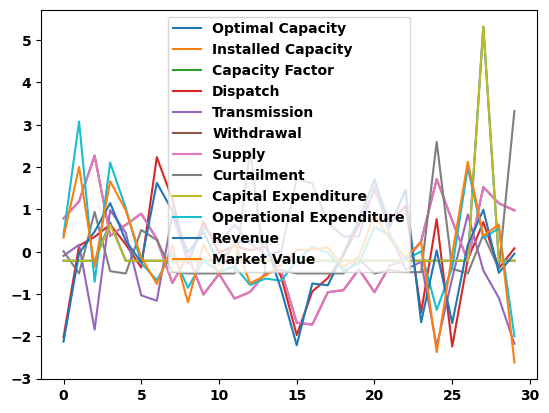

In [14]:
result_features = np.array(results).T
for i, y in enumerate(result_features):
    plt.plot(np.arange(len(y)), stats.zscore(y), label=result_keys[i])
plt.legend()
plt.show()

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


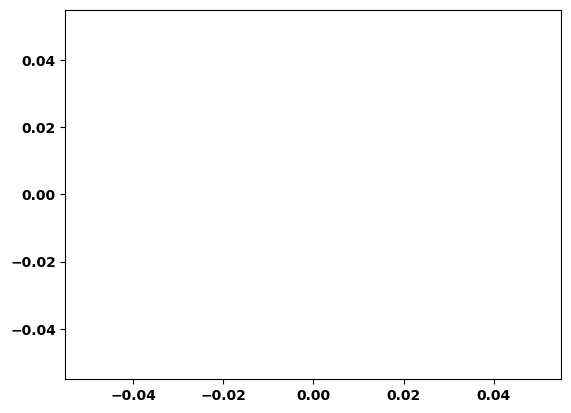

In [64]:
def plot_result(i):
    plt.plot(np.arange(len(result_features[i])), stats.zscore(result_features[i]), label=result_keys[i])
plot_result(2)

In [31]:
def MAD(x):
    return np.median(np.absolute(x - np.mean(x)))

var = [MAD(stats.zscore(result)) for result in result_features]
print(var)
sorted_var = np.argsort(var)
for i in sorted_var:
    print(f"{i}: {result_keys[i]}")

[0.214372327084487, nan, nan, 0.628185258661611, 0.6139032961506723, 0.8417548855656144, 0.8417548855653507, 0.5153426822632483, 0.2130458647938491, 0.4608466029944054, 0.5457121589147484, 0.3624605903165027]
8: Capital Expenditure
0: Optimal Capacity
11: Market Value
9: Operational Expenditure
7: Curtailment
10: Revenue
4: Transmission
3: Dispatch
6: Supply
5: Withdrawal
1: Installed Capacity
2: Capacity Factor


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


# first optimization (only generators)

In [10]:
def get_feature(df: pd.DataFrame, search: str):
    filtered_df = df.filter(like=search, axis=1)
    return np.mean(np.array(filtered_df), axis=(0,1))

In [11]:
feature_key_words = ['solar', 'onwind', 'offwind-ac', 'offwind-dc']

def get_feature_array(netw_splits):
    feature_array = []
    for netw in netw_splits:
        feature_data = netw.generators_t.p_max_pu
        features = [get_feature(feature_data, key_word) for key_word in feature_key_words]
        feature_array.append(features)
    
    feature_scaler = StandardScaler().fit(feature_array)
    feature_array_norm = feature_scaler.transform(feature_array)

    return feature_array_norm

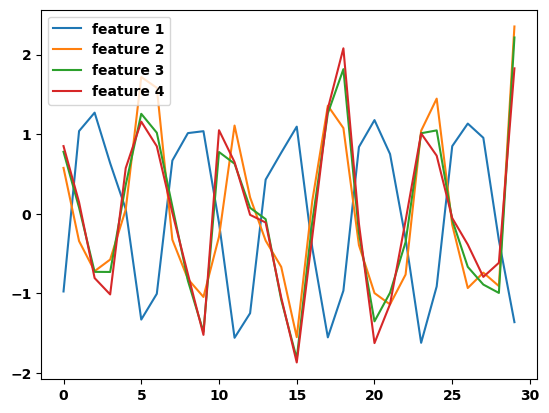

In [12]:
feature_array = get_feature_array(netw_splits)
plot_feature_array(feature_array)

In [15]:
coefficients = dict()

for result_key in result_keys:
    result_array = get_result_array(netw_splits, result_key)
    if any(np.isinf(res) or np.isnan(res) for res in result_array):
        continue
    
    regr = LassoCV()
    with warnings.catch_warnings(action="ignore"):
        regr.fit(feature_array, result_array)
    
    coefficients[result_key] = regr.coef_/np.var(regr.coef_)

c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\numpy\core\_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\scipy\stats\_stats_py.py:3100: RuntimeWarning: invalid value encountered in subtract
  z = (scores - mn) / std


In [16]:
coefficients

{'Optimal Capacity': array([-0.        , 13.97154143,  0.        ,  0.        ]),
 'Dispatch': array([-0.00000000e+00,  0.00000000e+00,  9.00719925e+16,  0.00000000e+00]),
 'Transmission': array([ -0.        , -17.14009236,  -8.61972129, -11.44817651]),
 'Withdrawal': array([-1.62172268,  0.        ,  5.70438876,  0.        ]),
 'Supply': array([-1.62172268,  0.        ,  5.70438876,  0.        ]),
 'Curtailment': array([-0.        ,  3.39086963, -0.        , -1.28446201]),
 'Capital Expenditure': array([-0.        , 13.91106505,  0.        ,  0.        ]),
 'Operational Expenditure': array([-4.86563668, -3.0617274 , -0.        , -0.19938111]),
 'Revenue': array([-33.81110109,   7.94950254,   0.        ,   0.        ]),
 'Market Value': array([-10.63304314,  -0.        ,   0.        ,   0.        ])}

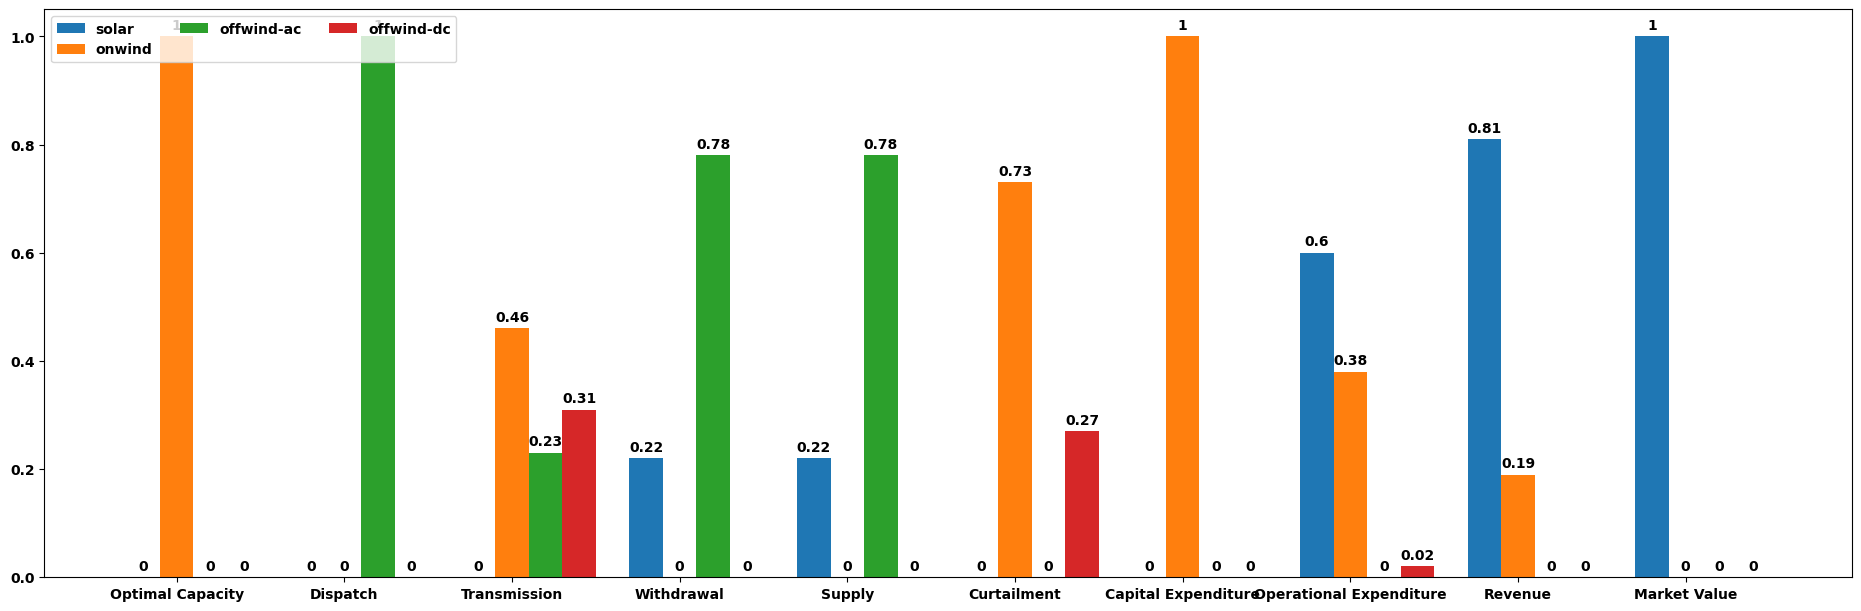

In [50]:
coef_dict = coefficients
width = 0.2
multiplier = 0

coefs_scaled = np.array([abs(x)/np.sum(abs(x)) for x in list(coef_dict.values())]).T
coefs = [[round(y, 2) for y in x] for x in coefs_scaled]

x = np.arange(len(coef_dict))
fig, ax = plt.subplots(layout='constrained')
fig.set_size_inches(18.5, 6)
ax.set_xticks(x + width, coef_dict.keys())

for i, coef in enumerate(coefs):
    offset = width * multiplier
    rects = ax.bar(x + offset, tuple(coef), width, label=feature_key_words[i])
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.legend(loc='upper left', ncols=3)


In [52]:
regr.coef_

array([ 7.40148683e-18, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

# Optimization by generators and location

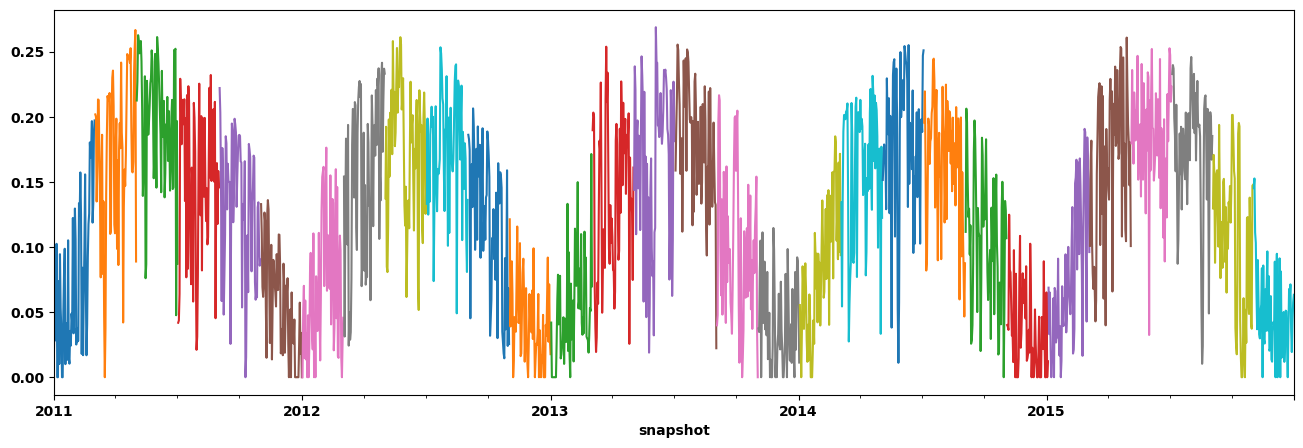

In [51]:
for netw in netw_splits:
    netw.generators_t.p_max_pu['DE0 0 solar'].plot(figsize=(16,5))

In [52]:
generators = ['solar', 'onwind', 'offwind-ac', 'offwind-dc']
location_split_x = 10
location_split_y = 51

def get_features(netw: pypsa.Network):
    feature_data = netw.generators_t.p_max_pu
    feature_array = []
    for generator in generators:
        df_generator = feature_data.filter(like=generator, axis=1)
        location_array = [[], [], [], []]
        for column in df_generator:
            bus = column.rpartition(' ')[0]
            if netw.buses['y'][bus] > location_split_y:
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[0].append(np.mean(df_generator[column]))
                else:
                    location_array[1].append(np.mean(df_generator[column]))
            else: 
                if netw.buses['x'][bus] <= location_split_x:
                    location_array[2].append(np.mean(df_generator[column]))
                else:
                    location_array[3].append(np.mean(df_generator[column]))
        for a in location_array:
            if len(a) == 0:
                feature_array.append(0)
            else: 
                feature_array.append(np.mean(a))
    return feature_array

[[0.06058115379269549, 0.06780423755324425, 0.07819838647286027, 0.08896404186371742, 0.3287317413680948, 0.2907433974195134, 0.20950770543509792, 0.1897383547580137, 0.6005888521636844, 0.5575160541264987, 0, 0, 0.6887376285711733, 0.6319564468743983, 0, 0], [0.16949998030274474, 0.1675118391693176, 0.18469833581003045, 0.1818808674031601, 0.2342447552366388, 0.24280669327605287, 0.13132478925583205, 0.1383532296429141, 0.4919628901201336, 0.5421626174421025, 0, 0, 0.568778090269012, 0.639952305191086, 0, 0], [0.18078021283881604, 0.19275117404396325, 0.18735344923325387, 0.19075274022103228, 0.21707236886474446, 0.19081495690165434, 0.1195210993992685, 0.10614755376253156, 0.456789782387138, 0.43466827732737834, 0, 0, 0.5300947383604209, 0.5275476830132558, 0, 0], [0.14644612149749237, 0.1456389883510691, 0.16475733300848117, 0.16474106449255355, 0.22884628800659745, 0.23465402546519107, 0.10934662530350309, 0.10635051497421391, 0.4536554291737282, 0.43754577086612495, 0, 0, 0.530541

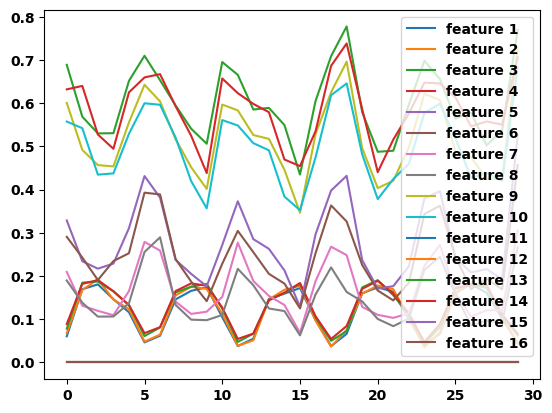

In [53]:
feature_array = []
for netw in netw_splits:
    feature_array.append(get_features(netw))

print(feature_array)
plot_feature_array(feature_array)

[-433302.1076136966, -263738.4829232878, -244421.77341000433, -235233.29303666097, -443798.96361808793, -580211.8701447931, -468269.0414668287, -277299.0863903711, -244012.45032104044, -152132.43129615748, -397914.0091921637, -493146.8056597123, -314508.1457553429, -355504.7002808521, -273751.0017281605, -49123.243114130455, -369533.6598897605, -535648.7568580747, -631280.3348107205, -317533.7609084713, -140026.05838830525, -147320.40326416827, -273880.71504534205, -567018.6033213375, -528389.8466873997, -329092.2879982837, -314641.4713324017, -253221.87736946056, -179829.36717489967, -808534.2868855203]


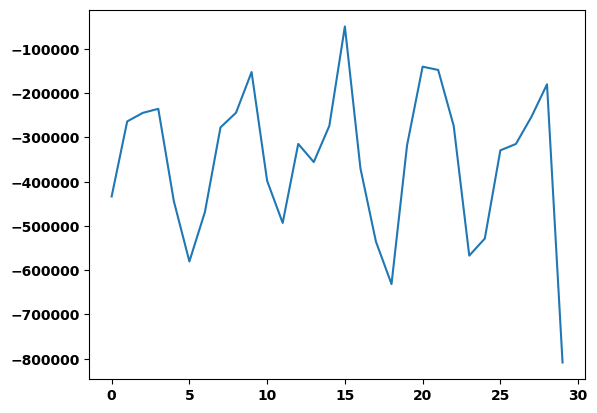

In [59]:
result_array = []
result_key_words = ['Offshore Wind (AC)', 'Offshore Wind (DC)', 'Onshore Wind', 'Solar']

for netw in netw_splits:
    capacity_mean = np.mean(netw.statistics()['Transmission'])
    result_array.append(capacity_mean)

print(result_array)
plt.plot(result_array)

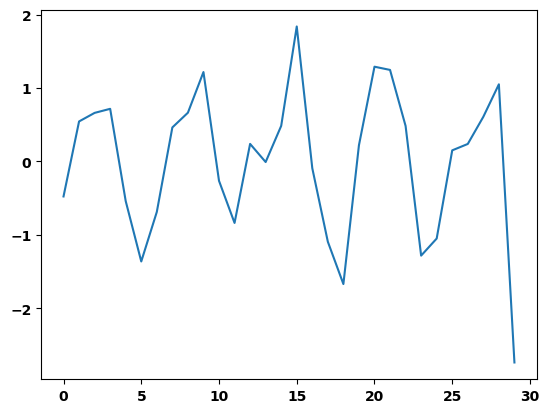

In [60]:
feature_scaler = StandardScaler().fit(feature_array)
feature_array_norm = feature_scaler.transform(feature_array)

result_array_norm = stats.zscore(result_array)

plt.plot(result_array_norm)

In [61]:
regr = LassoCV()
regr.fit(feature_array_norm, result_array_norm)
regr.coef_

array([-0.15653446, -0.        , -0.        ,  0.        , -0.79656655,
        0.        ,  0.        ,  0.00600327, -0.        ,  0.        ,
        0.        ,  0.        , -0.34095448, -0.        ,  0.        ,
        0.        ])

In [62]:
regr.coef_

array([-0.15653446, -0.        , -0.        ,  0.        , -0.79656655,
        0.        ,  0.        ,  0.00600327, -0.        ,  0.        ,
        0.        ,  0.        , -0.34095448, -0.        ,  0.        ,
        0.        ])

# Delete buses

In [30]:
n.buses

,v_nom,x,y,country,control,generator,carrier,location,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,,
DE0 0,380.0,11.965484,51.467240,DE,Slack,DE0 0 CCGT,AC,,,,1.0,0.0,inf,
DE0 1,380.0,8.100384,50.950707,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 10,380.0,8.866878,50.071140,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 11,380.0,13.808441,50.952371,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 12,380.0,10.415522,52.191403,DE,PQ,,AC,,,,1.0,0.0,inf,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DE0 77 H2,1.0,13.993909,53.311250,DE,PQ,,H2,DE0 77,,,1.0,0.0,inf,
DE0 78 H2,1.0,6.489486,50.882648,DE,PQ,,H2,DE0 78,,,1.0,0.0,inf,
DE0 79 H2,1.0,8.804169,48.380701,DE,PQ,,H2,DE0 79,,,1.0,0.0,inf,


In [38]:
buses = []
longitude = [] # x
latitude = [] # y
for i, bus in n.buses.iterrows():
    if 'H2' in bus.name:
        continue
    buses.append(bus.name)
    longitude.append(bus['x'])
    latitude.append(bus['y'])

print(buses)
print(longitude)
print(latitude)

['DE0 0', 'DE0 1', 'DE0 10', 'DE0 11', 'DE0 12', 'DE0 13', 'DE0 14', 'DE0 15', 'DE0 16', 'DE0 17', 'DE0 18', 'DE0 19', 'DE0 2', 'DE0 20', 'DE0 21', 'DE0 22', 'DE0 23', 'DE0 24', 'DE0 25', 'DE0 26', 'DE0 27', 'DE0 28', 'DE0 29', 'DE0 3', 'DE0 30', 'DE0 31', 'DE0 32', 'DE0 33', 'DE0 34', 'DE0 35', 'DE0 36', 'DE0 37', 'DE0 38', 'DE0 39', 'DE0 4', 'DE0 40', 'DE0 41', 'DE0 42', 'DE0 43', 'DE0 44', 'DE0 45', 'DE0 46', 'DE0 47', 'DE0 48', 'DE0 49', 'DE0 5', 'DE0 50', 'DE0 51', 'DE0 52', 'DE0 53', 'DE0 54', 'DE0 55', 'DE0 56', 'DE0 57', 'DE0 58', 'DE0 59', 'DE0 6', 'DE0 60', 'DE0 61', 'DE0 62', 'DE0 63', 'DE0 64', 'DE0 65', 'DE0 66', 'DE0 67', 'DE0 68', 'DE0 69', 'DE0 7', 'DE0 70', 'DE0 71', 'DE0 72', 'DE0 73', 'DE0 74', 'DE0 75', 'DE0 76', 'DE0 77', 'DE0 78', 'DE0 79', 'DE0 8', 'DE0 9']
[11.965484499999999, 8.100384092987298, 8.866877984159865, 13.808441, 10.415522232506499, 6.918288301302811, 7.869491806268549, 8.251075499999999, 10.98256873725535, 13.099823, 9.892501750000001, 8.33566678846

In [39]:
longitude_sorted = np.argsort(longitude)
latitude_sorted = np.argsort(latitude)

In [45]:
classes = ['Bus', 'Store'] # ['Bus', 'Store', 'Generator', 'Link']

data_split = []

for direction in [longitude_sorted, latitude_sorted]:
    for direction_split in split_list(direction, 5):
        buses_split = [buses[i] for i in direction_split] + [buses[i]+' H2' for i in direction_split]

        netw_copy = n.copy()
        for c in classes:
            netw_copy.mremove(c, buses_split)
        netw_copy.optimize()
        data_split.append(netw_copy)

KeyError: "['DE0 78', 'DE0 37', 'DE0 65', 'DE0 22', 'DE0 9', 'DE0 44', 'DE0 13', 'DE0 33', 'DE0 64', 'DE0 8', 'DE0 36', 'DE0 47', 'DE0 46', 'DE0 62', 'DE0 75', 'DE0 14'] not found in axis"